In [1]:
# --- 1. 安装依赖 ---
!pip install xarray netCDF4 matplotlib geopandas rasterio rioxarray --quiet

# --- 2. 挂载Google Drive ---
from google.colab import drive
drive.mount('/content/drive')

# --- 3. 导入库 ---
import os
import numpy as np
import pandas as pd
import xarray as xr
import geopandas as gpd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# 补充必要的库
import glob
import json
from datetime import datetime, timedelta
import calendar
from pathlib import Path
import pyarrow as pa
import pyarrow.parquet as pq
from tqdm import tqdm
import gc


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. check the data before trianing

In [4]:
# 环境设置和导入
import os
import sys
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import json
from datetime import datetime
import matplotlib.pyplot as plt

# 检查GPU可用性
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"使用设备: {device}")
print(f"PyTorch版本: {torch.__version__}")

# 设置随机种子
torch.manual_seed(42)
np.random.seed(42)

使用设备: cuda
PyTorch版本: 2.8.0+cu126


In [5]:
import numpy as np
import os

# 检查NO2 scaler文件
no2_scaler_path = "/content/drive/MyDrive/3DCNN_Pipeline/artifacts/scalers/NO2/meanstd_global_2019_2021.npz"
print("检查NO2 scaler文件:")
print(f"文件路径: {no2_scaler_path}")
print(f"文件存在: {os.path.exists(no2_scaler_path)}")

if os.path.exists(no2_scaler_path):
    try:
        no2_data = np.load(no2_scaler_path, allow_pickle=True)
        print(f"文件可读: ✅")
        print(f"文件内容: {list(no2_data.keys())}")
        print(f"mean形状: {no2_data['mean'].shape}")
        print(f"std形状: {no2_data['std'].shape}")
    except Exception as e:
        print(f"文件读取错误: ❌ {e}")

print("\n" + "="*50 + "\n")

# 检查SO2 scaler文件
so2_scaler_path = "/content/drive/MyDrive/3DCNN_Pipeline/artifacts/scalers/SO2/meanstd_global_2019_2021.npz"
print("检查SO2 scaler文件:")
print(f"文件路径: {so2_scaler_path}")
print(f"文件存在: {os.path.exists(so2_scaler_path)}")

if os.path.exists(so2_scaler_path):
    try:
        so2_data = np.load(so2_scaler_path, allow_pickle=True)
        print(f"文件可读: ✅")
        print(f"文件内容: {list(so2_data.keys())}")
        print(f"mean形状: {so2_data['mean'].shape}")
        print(f"std形状: {so2_data['std'].shape}")
    except Exception as e:
        print(f"文件读取错误: ❌ {e}")

检查NO2 scaler文件:
文件路径: /content/drive/MyDrive/3DCNN_Pipeline/artifacts/scalers/NO2/meanstd_global_2019_2021.npz
文件存在: True
文件可读: ✅
文件内容: ['method', 'mode', 'pollutant', 'train_years', 'channel_list', 'channels_signature', 'units_map', 'mean', 'std', 'noscale', 'created_at', 'version', 'seed', 'mean_vec', 'std_vec']
mean形状: ()
std形状: ()


检查SO2 scaler文件:
文件路径: /content/drive/MyDrive/3DCNN_Pipeline/artifacts/scalers/SO2/meanstd_global_2019_2021.npz
文件存在: True
文件可读: ✅
文件内容: ['method', 'mode', 'pollutant', 'train_years', 'channel_list', 'channels_signature', 'units_map', 'mean', 'std', 'noscale', 'created_at', 'version', 'seed', 'mean_vec', 'std_vec']
mean形状: ()
std形状: ()


In [6]:
import numpy as np

# 加载原始文件
no2_original = "/content/drive/MyDrive/3DCNN_Pipeline/artifacts/scalers/NO2/meanstd_global_2019_2021.npz"
data = np.load(no2_original, allow_pickle=True)

print("验证NO2 scaler参数:")
print(f"mean_vec形状: {data['mean_vec'].shape}")
print(f"std_vec形状: {data['std_vec'].shape}")
print(f"mean_vec前5个值: {data['mean_vec'][:5]}")
print(f"std_vec前5个值: {data['std_vec'][:5]}")
print(f"是否有NaN: mean_vec={np.isnan(data['mean_vec']).any()}, std_vec={np.isnan(data['std_vec']).any()}")
print(f"是否有无穷大: mean_vec={np.isinf(data['mean_vec']).any()}, std_vec={np.isinf(data['std_vec']).any()}")

验证NO2 scaler参数:
mean_vec形状: (29,)
std_vec形状: (29,)
mean_vec前5个值: [771.19574   13.516852 249.96301    0.         0.      ]
std_vec前5个值: [596.8424    9.38181 504.36063   1.        1.     ]
是否有NaN: mean_vec=False, std_vec=False
是否有无穷大: mean_vec=False, std_vec=False


# 2. dataloader

In [10]:
import os, glob
print(os.path.isdir(f"{FEATURE_BASE}"))
print(len(glob.glob(f"{FEATURE_BASE}/NO2_2019/*.npz")))
print(os.path.isfile(f"{BASE_PATH}/artifacts/scalers/NO2/meanstd_global_2019_2021.npz"))

True
365
True


In [8]:
!pip uninstall -y torch torchvision torchaudio
!pip install -U torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

Found existing installation: torch 2.8.0+cu126
Uninstalling torch-2.8.0+cu126:
  Successfully uninstalled torch-2.8.0+cu126
Found existing installation: torchvision 0.23.0+cu126
Uninstalling torchvision-0.23.0+cu126:
  Successfully uninstalled torchvision-0.23.0+cu126
Found existing installation: torchaudio 2.8.0+cu126
Uninstalling torchaudio-2.8.0+cu126:
  Successfully uninstalled torchaudio-2.8.0+cu126
Looking in indexes: https://download.pytorch.org/whl/cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.4/780.4 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 135.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 120.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 107.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 54.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 139.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.

In [ ]:
import torch, sys
print

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [9]:
BASE_PATH = "/content/drive/MyDrive/3DCNN_Pipeline"
FEATURE_BASE = "/content/drive/MyDrive/Feature_Stacks"

In [ ]:
import torch, sys
print("torch:", torch.__version__)
print("python:", sys.version)
print("cuda:", torch.cuda.is_available())

torch: 2.5.1+cu121
python: 3.12.11 (main, Jun  4 2025, 08:56:18) [GCC 11.4.0]
cuda: True


In [2]:
%%writefile /content/drive/MyDrive/3DCNN_Pipeline/dynamic_gap_dataloader.py

"""
动态缺口DataLoader实现
包含硬性保护、文件列表缓存、动态缺口生成和可复现性
"""

import os
import json
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from typing import Dict, List, Tuple, Optional, Union
import random
from pathlib import Path
import logging

# 设置日志
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

class RandomGapMasker:
    """随机缺口生成器 - 支持多种缺口类型"""

    def __init__(self,
                 pixel_gap_prob: float = 0.1,
                 patch_gap_prob: float = 0.05,
                 timestep_gap_prob: float = 0.02,
                 channel_gap_prob: float = 0.01,
                 patch_size: int = 8,
                 random_seed: int = 42,
                 use_nan_mask: bool = False):
        """
        初始化缺口生成器

        Args:
            pixel_gap_prob: 像素级缺口概率
            patch_gap_prob: 块级缺口概率
            timestep_gap_prob: 时间步缺口概率
            channel_gap_prob: 通道缺口概率
            patch_size: 块大小
            random_seed: 随机种子
        """
        self.pixel_gap_prob = pixel_gap_prob
        self.patch_gap_prob = patch_gap_prob
        self.timestep_gap_prob = timestep_gap_prob
        self.channel_gap_prob = channel_gap_prob
        self.patch_size = patch_size
        self.random_seed = random_seed
        self.use_nan_mask = bool(use_nan_mask)

    def generate_gaps(self, x: torch.Tensor, seed: int) -> Tuple[torch.Tensor, torch.Tensor]:
        """
        生成缺口掩码

        Args:
            x: 输入数据 (T, C, H, W) 或 (C, H, W)
            seed: 随机种子

        Returns:
            x_masked: 带缺口的数据
            mask: 缺口掩码 (1=有效, 0=缺口)
        """
        # 使用局部随机生成器，避免污染全局RNG
        g = torch.Generator(device=x.device if x.is_cuda else 'cpu').manual_seed(int(seed))

        # 确保输入是4D
        if x.ndim == 3:
            x = x.unsqueeze(0)  # (1, C, H, W)
            squeeze_output = True
        else:
            squeeze_output = False

        T, C, H, W = x.shape
        # 内部用bool有效掩码，最后再转float
        mask = torch.ones_like(x, dtype=torch.bool)

        # 1. 像素级缺口
        if self.pixel_gap_prob > 0:
            pixel_mask = torch.rand((T, C, H, W), generator=g, device=x.device) > self.pixel_gap_prob
            mask &= pixel_mask

        # 2. 块级缺口
        if self.patch_gap_prob > 0:
            num_patches_h = H // self.patch_size
            num_patches_w = W // self.patch_size

            for t in range(T):
                for c in range(C):
                    for ph in range(num_patches_h):
                        for pw in range(num_patches_w):
                            if torch.rand((1,), generator=g, device=x.device) < self.patch_gap_prob:
                                start_h = ph * self.patch_size
                                end_h = min(start_h + self.patch_size, H)
                                start_w = pw * self.patch_size
                                end_w = min(start_w + self.patch_size, W)
                                mask[t, c, start_h:end_h, start_w:end_w] = False

        # 3. 时间步缺口
        if self.timestep_gap_prob > 0:
            timestep_mask = torch.rand((T,), generator=g, device=x.device) > self.timestep_gap_prob
            mask &= timestep_mask.view(T, 1, 1, 1)

        # 4. 通道缺口
        if self.channel_gap_prob > 0:
            channel_mask = torch.rand((C,), generator=g, device=x.device) > self.channel_gap_prob
            mask &= channel_mask.view(1, C, 1, 1)

        # 应用缺口
        mask_out = mask.to(dtype=torch.float32)
        x_masked = x.clone()
        if not self.use_nan_mask:
            x_masked *= mask_out
        else:
            x_masked[~mask] = torch.tensor(float('nan'), dtype=x_masked.dtype, device=x_masked.device)

        # 恢复原始维度
        if squeeze_output:
            x_masked = x_masked.squeeze(0)
            mask_out = mask_out.squeeze(0)

        return x_masked, mask_out

class CacheDataset(Dataset):
    """缓存数据集 - 支持动态缺口生成"""

    def __init__(self,
                 pollutant: str,
                 split: str,
                 base_path: str,
                 scaler_dir: str,
                 config_file: str,
                 feature_stacks_path: str,
                 gap_probability: float = 0.2,
                 random_seed: int = 42):
        """
        初始化数据集

        Args:
            pollutant: 污染物类型 ('NO2' 或 'SO2')
            split: 数据分割 ('train', 'val', 'test')
            base_path: 基础路径
            scaler_dir: scaler文件目录
            config_file: 配置文件路径
            gap_probability: 缺口概率
            random_seed: 随机种子
        """
        self.pollutant = pollutant
        self.split = split
        self.base_path = base_path
        self.scaler_dir = scaler_dir
        self.config_file = config_file
        self.gap_probability = gap_probability
        self.random_seed = random_seed
        self.feature_stacks_path = feature_stacks_path

        # 加载配置
        self.config = self._load_config()

        # 加载scaler参数 (tensor化一次)
        self.scaler_params = self._load_scaler()
        self.mv: torch.Tensor = self.scaler_params["mean_vec"]
        self.sv: torch.Tensor = self.scaler_params["std_vec"]

        # 缓存文件列表
        self.file_list = self._cache_file_list()

        # 训练时的epoch，用于改变缺口种子
        self.epoch: int = 0

        # 初始化缺口生成器
        # 默认仅启用像素级缺口，其它类型概率置0，接口简化
        self.gap_masker = RandomGapMasker(
            pixel_gap_prob=gap_probability,
            patch_gap_prob=0.0,
            timestep_gap_prob=0.0,
            channel_gap_prob=0.0,
            random_seed=random_seed
        )

        logger.info(f"初始化{pollutant} {split}数据集: {len(self.file_list)}个样本")

    def _load_config(self) -> Dict:
        """加载配置文件"""
        try:
            with open(self.config_file, 'r') as f:
                config = json.load(f)
            return config
        except Exception as e:
            logger.error(f"加载配置文件失败: {e}")
            return {}

    def _load_scaler(self) -> Dict:
        """加载scaler参数"""
        scaler_path = os.path.join(self.scaler_dir, self.pollutant, "meanstd_global_2019_2021.npz")

        try:
            scaler_data = np.load(scaler_path, allow_pickle=True)
            mean_vec = scaler_data['mean_vec']
            std_vec = scaler_data['std_vec']

            # 硬性保护1: 形状与通道数验证
            logger.info(f"{self.pollutant} scaler参数: mean_vec形状={mean_vec.shape}, std_vec形状={std_vec.shape}")

            # 硬性保护2: 数值稳定性 + tensor化
            eps = 1e-6
            mv = torch.from_numpy(np.asarray(mean_vec, dtype=np.float32))
            sv = torch.from_numpy(np.asarray(np.maximum(std_vec, eps), dtype=np.float32))

            sig = scaler_data.get('channels_signature', '')
            if sig:
                logger.info(f"{self.pollutant} channels_signature: {sig}")

            return {
                'mean_vec': mv,
                'std_vec': sv,
                'channels_signature': sig,
                'channel_list': scaler_data.get('channel_list', [])
            }
        except Exception as e:
            logger.error(f"加载scaler参数失败: {e}")
            raise

    def _cache_file_list(self) -> List[str]:
        """缓存文件列表（兼容 NO2_2019/... 或平铺 NO2/*.npz）"""
        keep = {"train": ["2019", "2020", "2021"], "val": ["2022"], "test": ["2023"]}[self.split]
        files: List[str] = []

        # A) 优先：在 Feature_Stacks 下按年目录扫描，例如 NO2_2019、NO2_2020
        for y in keep:
            year_dir = os.path.join(self.feature_stacks_path, f"{self.pollutant}_{y}")
            if os.path.isdir(year_dir):
                for fname in sorted(os.listdir(year_dir)):
                    if fname.endswith('.npz'):
                        files.append(os.path.join(year_dir, fname))

        # B) 回退：若没有找到年目录，再扫描平铺目录 Feature_Stacks/NO2
        if not files:
            root = os.path.join(self.feature_stacks_path, self.pollutant)
            if os.path.isdir(root):
                flat = sorted(os.path.join(root, f) for f in os.listdir(root) if f.endswith('.npz'))
                files = [p for p in flat if os.path.basename(p)[:4] in keep]

        if not files:
            raise RuntimeError(
                f"{self.pollutant}-{self.split} 没有可用样本。"
                f"需要 {self.feature_stacks_path}/{self.pollutant}_2019 等年目录，"
                f"或 {self.feature_stacks_path}/{self.pollutant} 平铺目录。"
            )
        return files

    def _read_npz(self, path: str) -> Tuple[np.ndarray, np.ndarray, Dict]:
        """统一读取函数，先尝试常规键（可mmap），再尝试0-d object（不mmap）"""
        with np.load(path, allow_pickle=True, mmap_mode='r') as d:
            # 方案1：已有组合好的矩阵 X/y
            if 'X' in d.files:
                X = d['X']; y = d['y']
                meta = d['meta'].item() if 'meta' in d.files else {}
                return X, y, meta
            # 方案2：NO2 单日栅格，分散键（no2_target / feature layers）
            if 'no2_target' in d.files:
                y = d['no2_target']
                # 定义通道顺序（尽可能与scaler一致）
                default_order = [
                    'dem','slope','pop',
                    'lulc_class_0','lulc_class_1','lulc_class_2','lulc_class_3','lulc_class_4',
                    'lulc_class_5','lulc_class_6','lulc_class_7','lulc_class_8','lulc_class_9',
                    'sin_doy','cos_doy','weekday_weight',
                    'u10','v10','blh','tp','t2m','sp','str','ssr_clr','ws','wd_sin','wd_cos',
                    'no2_lag_1day','no2_neighbor'
                ]
                # 若scaler中带有通道列表，优先使用（兼容 numpy 数组）
                ch_list = self.scaler_params.get('channel_list')
                if isinstance(ch_list, np.ndarray):
                    ch_list = ch_list.tolist()
                if not ch_list:
                    ch_list = default_order

                # 构造与 scaler 对齐的通道：缺失的用0填充并记录
                H, W = y.shape
                stacked = []
                missing = []
                present = []
                for k in ch_list:
                    if k in d.files:
                        stacked.append(d[k].astype(np.float32, copy=False))
                        present.append(k)
                    else:
                        stacked.append(np.zeros((H, W), dtype=np.float32))
                        missing.append(k)
                X = np.stack(stacked, axis=0)

                meta = {
                    'year': int(d['year']) if 'year' in d.files else None,
                    'day': int(d['day']) if 'day' in d.files else None,
                    'features': ch_list,
                    'missing_features': missing,
                    'present_features': present,
                    'orig_mask_present': 'no2_mask' in d.files,
                }
                return X, y, meta
        # 再处理 0-d object dict
        with np.load(path, allow_pickle=True) as d2:
            # 扫描找到 dtype=object 的 0-d 条目（键名可能不是固定）
            obj = None
            for k in d2.files:
                v = d2[k]
                if isinstance(v, np.ndarray) and v.shape == () and v.dtype == object:
                    obj = v
                    break
            if obj is not None:
                obj = obj.item()
                X = obj.get('X'); y = obj.get('y'); meta = obj.get('meta', {})
                return X, y, meta
        raise ValueError(f"无法解析文件: {path}")

    def _load_sample(self, file_path: str) -> Tuple[torch.Tensor, torch.Tensor, Dict]:
        """加载单个样本"""
        try:
            X_np, y_np, meta = self._read_npz(file_path)
            # 保证连续内存并指定float32，避免mmap/非连续导致的问题
            X = torch.from_numpy(np.ascontiguousarray(X_np, dtype=np.float32))
            # y 可能为 (1,H,W)，压成 (H,W)
            if isinstance(y_np, np.ndarray) and y_np.ndim == 3 and y_np.shape[0] == 1:
                y_np = y_np.squeeze(0)
            y = torch.from_numpy(np.ascontiguousarray(y_np, dtype=np.float32))
            # 形状快速断言
            assert X.ndim in (3, 4), f"X.ndim应为3/4，实际={X.ndim}"
            return X, y, meta
        except Exception as e:
            logger.error(f"加载样本失败 {file_path}: {e}")
            raise

    def _normalize_data(self, X: torch.Tensor) -> torch.Tensor:
        """标准化数据 - 3D/4D兼容"""
        # 放到与 X 相同的 device，避免 GPU 上 device mismatch
        mean_vec = self.mv.to(X.device)
        std_vec = self.sv.to(X.device)

        # 硬性保护3: 形状与通道数验证
        assert X.shape[-3] == len(mean_vec) == len(std_vec), \
            f"通道数不匹配: X={X.shape[-3]}, scaler=({len(mean_vec)}, {len(std_vec)})"

        # 硬性保护4: 数值稳定性
        eps = torch.as_tensor(1e-6, device=X.device)
        std_vec = torch.maximum(std_vec, eps)

        # 硬性保护5: 3D/4D兼容标准化
        if X.ndim == 3:
            # (C, H, W) -> (C, H, W)
            X = (X - mean_vec[:, None, None]) / std_vec[:, None, None]
        elif X.ndim == 4:
            # (T, C, H, W) -> (T, C, H, W)
            X = (X - mean_vec[None, :, None, None]) / std_vec[None, :, None, None]
        else:
            raise ValueError(f"意外的维度: X.ndim={X.ndim}")

        return X

    def __len__(self) -> int:
        return len(self.file_list)

    def __getitem__(self, idx: int) -> Tuple[torch.Tensor, torch.Tensor, torch.Tensor, Dict]:
        """获取单个样本"""
        file_path = self.file_list[idx]

        # 加载数据
        X, y, meta = self._load_sample(file_path)

        # 标准化
        X = self._normalize_data(X)

        # 生成缺口（仅训练集）
        if self.split == 'train':
            # 使用样本级可复现种子 (包含 epoch)
            sample_seed = (int(self.random_seed) ^ int(idx) ^ int(self.epoch)) & 0xFFFFFFFF
            X_masked, mask = self.gap_masker.generate_gaps(X, sample_seed)
        else:
            # 验证/测试集不生成缺口
            X_masked = X
            mask = torch.ones_like(X)

        # 把缺口配置也写进meta，便于追踪
        meta = dict(meta)
        meta['gap'] = {
            'pixel_p': self.gap_masker.pixel_gap_prob,
            'patch_p': self.gap_masker.patch_gap_prob,
            'timestep_p': self.gap_masker.timestep_gap_prob,
            'channel_p': self.gap_masker.channel_gap_prob,
            'patch_size': self.gap_masker.patch_size,
        }
        return X_masked, mask, y, meta

    def set_epoch(self, epoch: int) -> None:
        """设置当前epoch，使样本缺口分布随epoch变化而改变"""
        self.epoch = int(epoch)

class DataLoaderFactory:
    """DataLoader工厂类"""

    def __init__(self, base_path: str = "/content/drive/MyDrive/3DCNN_Pipeline", feature_stacks_path: str = "/content/drive/MyDrive/Feature_Stacks"):
        """
        初始化工厂

        Args:
            base_path: 基础路径
        """
        self.base_path = base_path
        self.scaler_dir = os.path.join(base_path, "artifacts", "scalers")
        self.config_file = os.path.join(base_path, "artifacts", "config.json")
        self.feature_stacks_path = feature_stacks_path

    def create_dataloader(self,
                         pollutant: str,
                         split: str,
                         batch_size: int = 4,
                         shuffle: Optional[bool] = None,
                         num_workers: int = 2,
                         gap_probability: float = 0.2,
                         random_seed: int = 42) -> DataLoader:
        """
        创建DataLoader

        Args:
            pollutant: 污染物类型
            split: 数据分割
            batch_size: 批次大小
            shuffle: 是否打乱
            num_workers: 工作进程数
            gap_probability: 缺口概率
            random_seed: 随机种子

        Returns:
            DataLoader实例
        """
        # 创建数据集
        dataset = CacheDataset(
            pollutant=pollutant,
            split=split,
            base_path=self.base_path,
            scaler_dir=self.scaler_dir,
            config_file=self.config_file,
            feature_stacks_path=self.feature_stacks_path,
            gap_probability=gap_probability,
            random_seed=random_seed
        )

        if shuffle is None:
            shuffle = (split == 'train')

        def worker_init_fn(worker_id: int):
            base_seed = torch.initial_seed() % 2**32
            np.random.seed(base_seed + worker_id)
            random.seed(base_seed + worker_id)

        # 创建DataLoader
        pin = torch.cuda.is_available()
        dataloader = DataLoader(
            dataset,
            batch_size=batch_size,
            shuffle=shuffle,
            num_workers=num_workers,
            pin_memory=pin,
            drop_last=True if split == 'train' else False,
            persistent_workers=(num_workers > 0),
            worker_init_fn=worker_init_fn
        )

        return dataloader

def test_dataloader():
    """测试DataLoader"""
    try:
        # 创建工厂
        factory = DataLoaderFactory()

        # 测试NO2训练集
        logger.info("测试NO2训练集...")
        no2_train_loader = factory.create_dataloader(
            pollutant='NO2',
            split='train',
            batch_size=2,
            gap_probability=0.2
        )

        # 获取一个批次
        for batch_idx, (X_masked, mask, y, meta) in enumerate(no2_train_loader):
            logger.info(f"NO2批次 {batch_idx}: X_masked形状={X_masked.shape}, mask形状={mask.shape}, y形状={y.shape}")
            break

        # 测试SO2验证集
        logger.info("测试SO2验证集...")
        so2_val_loader = factory.create_dataloader(
            pollutant='SO2',
            split='val',
            batch_size=2,
            gap_probability=0.0  # 验证集不生成缺口
        )

        # 获取一个批次
        for batch_idx, (X_masked, mask, y, meta) in enumerate(so2_val_loader):
            logger.info(f"SO2批次 {batch_idx}: X_masked形状={X_masked.shape}, mask形状={mask.shape}, y形状={y.shape}")
            break

        logger.info("DataLoader测试完成！")

    except Exception as e:
        logger.error(f"DataLoader测试失败: {e}")
        raise

#if __name__ == "__main__":
 #   test_dataloader()

Overwriting /content/drive/MyDrive/3DCNN_Pipeline/dynamic_gap_dataloader.py


In [3]:
from google.colab import drive
drive.mount('/content/drive')

BASE_PATH = "/content/drive/MyDrive/3DCNN_Pipeline"
FEATURE_BASE = "/content/drive/MyDrive/Feature_Stacks"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import sys, importlib
sys.path.append(BASE_PATH)  # 让 Colab 能找到你保存的 py
import dynamic_gap_dataloader as dgd
importlib.reload(dgd)       # 可选：强制加载最新版本

<module 'dynamic_gap_dataloader' from '/content/drive/MyDrive/3DCNN_Pipeline/dynamic_gap_dataloader.py'>

In [5]:
import importlib, dynamic_gap_dataloader as dgd
importlib.reload(dgd)

factory = dgd.DataLoaderFactory(
    base_path="/content/drive/MyDrive/3DCNN_Pipeline",
    feature_stacks_path="/content/drive/MyDrive/Feature_Stacks"
)
no2_train = factory.create_dataloader("NO2", "train", batch_size=1, gap_probability=0.2, num_workers=0)
no2_train.dataset.set_epoch(0)
Xm, mask, y, meta = next(iter(no2_train))
print(Xm.shape, mask.shape, y.shape)
print("missing:", meta.get("missing_features")[:5])

ERROR:dynamic_gap_dataloader:加载配置文件失败: [Errno 2] No such file or directory: '/content/drive/MyDrive/3DCNN_Pipeline/artifacts/config.json'


torch.Size([1, 29, 300, 621]) torch.Size([1, 29, 300, 621]) torch.Size([1, 300, 621])
missing: [['population'], ['lulc_01'], ['lulc_02'], ['lulc_03'], ['lulc_04']]


In [6]:
from dynamic_gap_dataloader import DataLoaderFactory
import torch

BASE_PATH = "/content/drive/MyDrive/3DCNN_Pipeline"
FEATURE_BASE = "/content/drive/MyDrive/Feature_Stacks"

def dataloader_sanity(pollutant="NO2", split="train", bs=4, gap_p=0.2, nw=2, epochs=2):
    factory = DataLoaderFactory(base_path=BASE_PATH, feature_stacks_path=FEATURE_BASE)
    dl = factory.create_dataloader(pollutant, split, batch_size=bs, gap_probability=gap_p, num_workers=nw)

    # 1) 维度/通道对齐 + 缺口占比
    for epoch in range(epochs):
        dl.dataset.set_epoch(epoch)
        X, m, y, meta = next(iter(dl))
        C = X.shape[-3]
        print(f"[{pollutant} {split}] epoch={epoch} X={tuple(X.shape)} mask={tuple(m.shape)} y={tuple(y.shape)}")
        print("  features[:5]:", meta.get("features", [])[:5])
        if "missing_features" in meta:
            print("  missing[:5]:", meta["missing_features"][:5])
        # 通道数一致性
        assert C == len(meta.get("features", [])) or C in (29, 30), "channels mismatch"
        # 缺口大致比例
        valid_ratio = float(m.mean().item())
        print(f"  valid≈{valid_ratio:.3f} (gap_p={gap_p})")

    # 2) 迭代几个 batch，确认数据流动与性能参数
    total = 0
    for i, (X, m, y, meta) in enumerate(dl):
        total += X.size(0)
        if i == 2:
            break
    print(f"iter ok: saw {total} samples (bs={bs}, num_workers={nw})")
    return dl

_ = dataloader_sanity(pollutant="NO2", split="train", bs=2, gap_p=0.2, nw=2, epochs=2)

ERROR:dynamic_gap_dataloader:加载配置文件失败: [Errno 2] No such file or directory: '/content/drive/MyDrive/3DCNN_Pipeline/artifacts/config.json'


[NO2 train] epoch=0 X=(2, 29, 300, 621) mask=(2, 29, 300, 621) y=(2, 300, 621)
  features[:5]: [['dem', 'dem'], ['slope', 'slope'], ['population', 'population'], ['lulc_01', 'lulc_01'], ['lulc_02', 'lulc_02']]
  missing[:5]: [['population', 'population'], ['lulc_01', 'lulc_01'], ['lulc_02', 'lulc_02'], ['lulc_03', 'lulc_03'], ['lulc_04', 'lulc_04']]
  valid≈0.800 (gap_p=0.2)
[NO2 train] epoch=1 X=(2, 29, 300, 621) mask=(2, 29, 300, 621) y=(2, 300, 621)
  features[:5]: [['dem', 'dem'], ['slope', 'slope'], ['population', 'population'], ['lulc_01', 'lulc_01'], ['lulc_02', 'lulc_02']]
  missing[:5]: [['population', 'population'], ['lulc_01', 'lulc_01'], ['lulc_02', 'lulc_02'], ['lulc_03', 'lulc_03'], ['lulc_04', 'lulc_04']]
  valid≈0.800 (gap_p=0.2)
iter ok: saw 6 samples (bs=2, num_workers=2)


In [7]:
from dynamic_gap_dataloader import DataLoaderFactory

BASE_PATH = "/content/drive/MyDrive/3DCNN_Pipeline"
FEATURE_BASE = "/content/drive/MyDrive/Feature_Stacks"

factory = DataLoaderFactory(base_path=BASE_PATH, feature_stacks_path=FEATURE_BASE)
no2_train = factory.create_dataloader("NO2", "train", batch_size=2, gap_probability=0.2, num_workers=0)

print("train samples:", len(no2_train.dataset.file_list))
print("first 3 files:", no2_train.dataset.file_list[:3])

no2_train.dataset.set_epoch(0)
Xm, mask, y, meta = next(iter(no2_train))
print("shapes:", tuple(Xm.shape), tuple(mask.shape), tuple(y.shape))
print("valid≈", float(mask.mean().item()), "gap_p=0.2")
print("features[:8]:", meta.get("features", [])[:8])
print("missing[:8]:", meta.get("missing_features", [])[:8])

ERROR:dynamic_gap_dataloader:加载配置文件失败: [Errno 2] No such file or directory: '/content/drive/MyDrive/3DCNN_Pipeline/artifacts/config.json'


train samples: 1096
first 3 files: ['/content/drive/MyDrive/Feature_Stacks/NO2_2019/NO2_stack_20190101.npz', '/content/drive/MyDrive/Feature_Stacks/NO2_2019/NO2_stack_20190102.npz', '/content/drive/MyDrive/Feature_Stacks/NO2_2019/NO2_stack_20190103.npz']
shapes: (2, 29, 300, 621) (2, 29, 300, 621) (2, 300, 621)
valid≈ 0.8000350594520569 gap_p=0.2
features[:8]: [['dem', 'dem'], ['slope', 'slope'], ['population', 'population'], ['lulc_01', 'lulc_01'], ['lulc_02', 'lulc_02'], ['lulc_03', 'lulc_03'], ['lulc_04', 'lulc_04'], ['lulc_05', 'lulc_05']]
missing[:8]: [['population', 'population'], ['lulc_01', 'lulc_01'], ['lulc_02', 'lulc_02'], ['lulc_03', 'lulc_03'], ['lulc_04', 'lulc_04'], ['lulc_05', 'lulc_05'], ['lulc_06', 'lulc_06'], ['lulc_07', 'lulc_07']]


In [ ]:
import torch
import torch.nn as nn

class Simple3DCNN(nn.Module):
    def __init__(self, in_ch=29):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv3d(in_ch, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv3d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv3d(64, 32, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv3d(32, 1, kernel_size=1)  # 输出1通道
        )
    def forward(self, x):  # x: (B,C,H,W) 或 (B,C,T,H,W)? 我们是2D栅格+通道 => (B,C,H,W)
        # 当前 DataLoader 输出是 (B,C,H,W)，用 Conv3d 需加一个伪时间维度 T=1
        x = x.unsqueeze(2)           # (B,C,1,H,W)
        y = self.net(x).squeeze(2)   # (B,1,H,W)
        return y

model = Simple3DCNN(in_ch=29).cuda()
sum(p.numel() for p in model.parameters()), "params"

(216193, 'params')

In [ ]:
def masked_mse(pred, target, mask):
    # mask: 1=valid, 0=gap
    w = (mask[:, :1, ...] > 0).float()
    tgt = torch.nan_to_num(target.unsqueeze(1), nan=0.0, posinf=0.0, neginf=0.0)
    prd = torch.nan_to_num(pred,              nan=0.0, posinf=0.0, neginf=0.0)
    diff = (prd - tgt) ** 2
    num  = (diff * w).sum()
    den  = w.sum().clamp_min(1.0)
    return num / den

# 验证前向
no2_train.dataset.set_epoch(0)
Xm, m, y, meta = next(iter(no2_train))
Xm, m, y = Xm.cuda(), m.cuda(), y.cuda()
with torch.no_grad():
    out = model(Xm)     # (B,1,H,W)
loss = masked_mse(out, y, m)
print("forward ok:", tuple(out.shape), "loss=", float(loss.item()))

forward ok: (2, 1, 300, 621) loss= 0.0014706449583172798


In [ ]:
import time
from dynamic_gap_dataloader import DataLoaderFactory
import torch

BASE_PATH = "/content/drive/MyDrive/3DCNN_Pipeline"
FEATURE_BASE = "/content/drive/MyDrive/Feature_Stacks"

factory = DataLoaderFactory(base_path=BASE_PATH, feature_stacks_path=FEATURE_BASE)

# 1) 单进程 DataLoader（最快看到结果）
train_loader = factory.create_dataloader("NO2", "train", batch_size=2, gap_probability=0.2, num_workers=0)

t0 = time.time()
Xm, m, y, meta = next(iter(train_loader))
print("first batch ok:", tuple(Xm.shape), "time:", round(time.time()-t0, 2), "s")

# 2) 再迭代 5 个 batch 观察耗时
t1 = time.time()
for i, (Xm, m, y, meta) in enumerate(train_loader):
    if i % 50 == 0:
        print("iter", i)
    if i == 5:
        break
print("5 batches in:", round(time.time()-t1, 2), "s")

# 可选：开启 cuDNN 自适应搜索
torch.backends.cudnn.benchmark = True

ERROR:dynamic_gap_dataloader:加载配置文件失败: [Errno 2] No such file or directory: '/content/drive/MyDrive/3DCNN_Pipeline/artifacts/config.json'


first batch ok: (2, 29, 300, 621) time: 4.05 s
iter 0
5 batches in: 6.18 s


# 3. training

In [ ]:
# ========= 最小训练单元格（NO2，单进程 DataLoader） =========
import torch, torch.nn as nn, torch.optim as optim
from torch.cuda.amp import autocast, GradScaler
from dynamic_gap_dataloader import DataLoaderFactory

# 路径与超参
BASE_PATH   = "/content/drive/MyDrive/3DCNN_Pipeline"
FEATURE_BASE= "/content/drive/MyDrive/Feature_Stacks"
epochs      = 2
lr          = 1e-3
batch_size  = 4
num_workers = 0           # 单进程，避免卡顿
gap_p       = 0.2
device      = "cuda" if torch.cuda.is_available() else "cpu"
torch.backends.cudnn.benchmark = True

# 模型
class Simple3DCNN(nn.Module):
    def __init__(self, in_ch=29):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv3d(in_ch, 64, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.Conv3d(64, 64, kernel_size=3, padding=1),     nn.ReLU(inplace=True),
            nn.Conv3d(64, 32, kernel_size=3, padding=1),     nn.ReLU(inplace=True),
            nn.Conv3d(32, 1, kernel_size=1)
        )
    def forward(self, x):              # (B,C,H,W)
        x = x.unsqueeze(2)             # (B,C,1,H,W)
        return self.net(x).squeeze(2)  # (B,1,H,W)

def masked_mse(pred, target, mask):
    w   = (mask[:, :1, ...] > 0).float()
    tgt = torch.nan_to_num(target.unsqueeze(1), nan=0.0, posinf=0.0, neginf=0.0)
    prd = torch.nan_to_num(pred,              nan=0.0, posinf=0.0, neginf=0.0)
    diff = (prd - tgt) ** 2
    num  = (diff * w).sum()
    den  = w.sum().clamp_min(1.0)
    return num / den

# DataLoader（单进程）
factory = DataLoaderFactory(base_path=BASE_PATH, feature_stacks_path=FEATURE_BASE)
train_loader = factory.create_dataloader("NO2", "train", batch_size=batch_size, gap_probability=gap_p, num_workers=num_workers)
val_loader   = factory.create_dataloader("NO2", "val",   batch_size=batch_size, gap_probability=0.0,  num_workers=num_workers)

# 组网/优化器/AMP
model     = Simple3DCNN(in_ch=29).to(device)
optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=1e-4)
scaler    = GradScaler()

# 训练
for epoch in range(epochs):
    model.train()
    train_loader.dataset.set_epoch(epoch)
    running = 0.0

    for b, (Xm, m, y, meta) in enumerate(train_loader):
        Xm, m, y = Xm.to(device), m.to(device), y.to(device)
        optimizer.zero_grad(set_to_none=True)
        with autocast():
            out  = model(Xm)
            loss = masked_mse(out, y, m)
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()
        running += loss.item()
        if b % 50 == 0:
            print(f"epoch {epoch}  batch {b}/{len(train_loader)}  loss={loss.item():.6f}")

    train_loss = running / max(1, len(train_loader))
    print(f"epoch {epoch} train_loss={train_loss:.6f}")

    # 简单验证（取一个 batch）
    model.eval()
    with torch.no_grad(), autocast():
        Xm, m, y, meta = next(iter(val_loader))
        Xm, m, y = Xm.to(device), m.to(device), y.to(device)
        val_out  = model(Xm)
        val_loss = masked_mse(val_out, y, m).item()
    print(f"          val_loss={val_loss:.6f}")
# ============================================================

ERROR:dynamic_gap_dataloader:加载配置文件失败: [Errno 2] No such file or directory: '/content/drive/MyDrive/3DCNN_Pipeline/artifacts/config.json'
ERROR:dynamic_gap_dataloader:加载配置文件失败: [Errno 2] No such file or directory: '/content/drive/MyDrive/3DCNN_Pipeline/artifacts/config.json'


epoch 0  batch 0/274  loss=0.006150
epoch 0  batch 50/274  loss=0.006262
epoch 0  batch 100/274  loss=0.006266
epoch 0  batch 150/274  loss=0.006270
epoch 0  batch 200/274  loss=0.006270
epoch 0  batch 250/274  loss=0.006206
epoch 0 train_loss=0.006184
          val_loss=0.006154
epoch 1  batch 0/274  loss=0.006175
epoch 1  batch 50/274  loss=0.006266
epoch 1  batch 100/274  loss=0.006226
epoch 1  batch 150/274  loss=0.006113
epoch 1  batch 200/274  loss=0.006225
epoch 1  batch 250/274  loss=0.006276
epoch 1 train_loss=0.006184
          val_loss=0.006154


In [ ]:
print("train:", len(train_loader.dataset.file_list))
print("val  :", len(val_loader.dataset.file_list))
# 如需测试集:
test_loader = factory.create_dataloader("NO2", "test", batch_size=2, gap_probability=0.0, num_workers=0)
print("test :", len(test_loader.dataset.file_list))

ERROR:dynamic_gap_dataloader:加载配置文件失败: [Errno 2] No such file or directory: '/content/drive/MyDrive/3DCNN_Pipeline/artifacts/config.json'


train: 1096
val  : 365
test : 365


In [ ]:
# 继续训练 + 保存best
more_epochs = 8
best_val = float('inf')
best_path = f"{BASE_PATH}/artifacts/best_no2.ckpt"

for e in range(more_epochs):
    epoch = e + 2  # 已经训练了2个epoch，从2开始记
    model.train()
    train_loader.dataset.set_epoch(epoch)
    running = 0.0
    for b, (Xm, m, y, _) in enumerate(train_loader):
        Xm, m, y = Xm.to(device), m.to(device), y.to(device)
        optimizer.zero_grad(set_to_none=True)
        with autocast():
            out  = model(Xm)
            loss = masked_mse(out, y, m)
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()
        running += loss.item()
        if b % 50 == 0:
            print(f"epoch {epoch}  batch {b}/{len(train_loader)}  loss={loss.item():.6f}")
    train_loss = running / max(1, len(train_loader))

    model.eval()
    with torch.no_grad(), autocast():
        Xm, m, y, _ = next(iter(val_loader))
        Xm, m, y = Xm.to(device), m.to(device), y.to(device)
        val_out  = model(Xm)
        val_loss = masked_mse(val_out, y, m).item()

    # 保存 best
    if val_loss < best_val:
        best_val = val_loss
        torch.save({"model": model.state_dict()}, best_path)
        print(f"[best] saved -> {best_path}  val={best_val:.6f}")
    print(f"epoch {epoch} train={train_loss:.6f}  val={val_loss:.6f}")

epoch 2  batch 0/274  loss=0.006308
epoch 2  batch 50/274  loss=0.006038
epoch 2  batch 100/274  loss=0.006193
epoch 2  batch 150/274  loss=0.006218
epoch 2  batch 200/274  loss=0.006275
epoch 2  batch 250/274  loss=0.006061
[best] saved -> /content/drive/MyDrive/3DCNN_Pipeline/artifacts/best_no2.ckpt  val=0.006154
epoch 2 train=0.006184  val=0.006154
epoch 3  batch 0/274  loss=0.006274
epoch 3  batch 50/274  loss=0.006200
epoch 3  batch 100/274  loss=0.006189
epoch 3  batch 150/274  loss=0.006296
epoch 3  batch 200/274  loss=0.006166
epoch 3  batch 250/274  loss=0.006193
epoch 3 train=0.006184  val=0.006154
epoch 4  batch 0/274  loss=0.006181
epoch 4  batch 50/274  loss=0.006296
epoch 4  batch 100/274  loss=0.006019
epoch 4  batch 150/274  loss=0.006185
epoch 4  batch 200/274  loss=0.006177
epoch 4  batch 250/274  loss=0.006272
epoch 4 train=0.006184  val=0.006154
epoch 5  batch 0/274  loss=0.006179
epoch 5  batch 50/274  loss=0.006310
epoch 5  batch 100/274  loss=0.006187
epoch 5  ba

In [ ]:
# 加载best，测试集首条样本推理自检
ckpt = torch.load(f"{BASE_PATH}/artifacts/best_no2.ckpt", map_location=device)
model.load_state_dict(ckpt["model"])
model.eval()

test_loader = factory.create_dataloader("NO2", "test", batch_size=1, gap_probability=0.0, num_workers=0)
with torch.no_grad(), autocast():
    Xm, m, y, meta = next(iter(test_loader))
    Xm, m, y = Xm.to(device), m.to(device), y.to(device)
    pred = model(Xm)  # (1,1,H,W)
    test_loss = masked_mse(pred, y, m).item()

print("test one sample:",
      "pred:", tuple(pred.shape),
      "y:", tuple(y.shape),
      "loss:", test_loss,
      "year/day:", meta.get("year"), meta.get("day"))
print("pred stats:", float(pred.mean()), float(pred.std()))

ERROR:dynamic_gap_dataloader:加载配置文件失败: [Errno 2] No such file or directory: '/content/drive/MyDrive/3DCNN_Pipeline/artifacts/config.json'


test one sample: pred: (1, 1, 300, 621) y: (1, 300, 621) loss: 0.006025997456163168 year/day: tensor([2023]) tensor([1])
pred stats: nan nan


In [ ]:
# ========= NO2 推理单元格（加载 best，测试集首条样本） =========
import torch
from torch.cuda.amp import autocast
import numpy as np
from dynamic_gap_dataloader import DataLoaderFactory

BASE_PATH    = "/content/drive/MyDrive/3DCNN_Pipeline"
FEATURE_BASE = "/content/drive/MyDrive/Feature_Stacks"
device       = "cuda" if torch.cuda.is_available() else "cpu"

# 1) 构造与训练一致的模型
class Simple3DCNN(torch.nn.Module):
    def __init__(self, in_ch=29):
        super().__init__()
        self.net = torch.nn.Sequential(
            torch.nn.Conv3d(in_ch, 64, kernel_size=3, padding=1), torch.nn.ReLU(inplace=True),
            torch.nn.Conv3d(64, 64, kernel_size=3, padding=1),     torch.nn.ReLU(inplace=True),
            torch.nn.Conv3d(64, 32, kernel_size=3, padding=1),     torch.nn.ReLU(inplace=True),
            torch.nn.Conv3d(32, 1, kernel_size=1)
        )
    def forward(self, x):      # (B,C,H,W)
        x = x.unsqueeze(2)     # (B,C,1,H,W)
        return self.net(x).squeeze(2)  # (B,1,H,W)

# 2) 加载 best 权重
model = Simple3DCNN(in_ch=29).to(device)
ckpt = torch.load(f"{BASE_PATH}/artifacts/best_no2.ckpt", map_location=device)
model.load_state_dict(ckpt["model"])
model.eval()

# 3) 构造 test DataLoader（2023）
factory = DataLoaderFactory(base_path=BASE_PATH, feature_stacks_path=FEATURE_BASE)
test_loader = factory.create_dataloader("NO2", "test", batch_size=1, gap_probability=0.0, num_workers=0)

# 4) 取一条样本推理
with torch.no_grad(), autocast():
    Xm, m, y, meta = next(iter(test_loader))
    Xm, m, y = Xm.to(device), m.to(device), y.to(device)

    # 输入去 NaN，避免 NaN 传播
    Xm = torch.nan_to_num(Xm, nan=0.0, posinf=0.0, neginf=0.0)

    pred = model(Xm)                       # (1,1,H,W)
    pred_clean = torch.nan_to_num(pred, nan=0.0, posinf=0.0, neginf=0.0).squeeze().float().cpu().numpy()
    y_np       = torch.nan_to_num(y,    nan=0.0, posinf=0.0, neginf=0.0).squeeze().float().cpu().numpy()

print("test one sample:")
print("  year/day:", meta.get("year"), meta.get("day"))
print("  pred stats:", float(pred_clean.mean()), float(pred_clean.std()))
print("  y stats   :", float(y_np.mean()), float(y_np.std()))

# 5) （可选）保存为 GeoTIFF
save_tif = False   # 需要保存时设为 True
if save_tif:
    import rasterio
    from rasterio.transform import from_origin
    import os

    # 假设像元大小已知（示例：0.01°）；若有真实地理信息，替换成真实 transform/CRS
    pixel_size = 0.01
    transform  = from_origin(0.0, 0.0, pixel_size, pixel_size)  # 左上角经纬度 + 像元大小
    crs        = "EPSG:4326"

    h, w = pred_clean.shape
    out_path = f"{BASE_PATH}/artifacts/no2_pred_{int(meta.get('year'))}_{int(meta.get('day'))}.tif"
    os.makedirs(f"{BASE_PATH}/artifacts", exist_ok=True)
    with rasterio.open(
        out_path, "w",
        driver="GTiff", height=h, width=w, count=1,
        dtype="float32", crs=crs, transform=transform,
        compress="deflate"
    ) as dst:
        dst.write(pred_clean.astype(np.float32), 1)
    print("saved:", out_path)
# ============================================================

ERROR:dynamic_gap_dataloader:加载配置文件失败: [Errno 2] No such file or directory: '/content/drive/MyDrive/3DCNN_Pipeline/artifacts/config.json'


test one sample:
  year/day: tensor([2023]) tensor([1])
  pred stats: 0.11804110556840897 0.003109574783593416
  y stats   : 2.0711490833491553e-06 1.5555971913272515e-05


In [ ]:
# ========= NO2 2023 全年多波段 GeoTIFF 导出 =========
import os, numpy as np, torch, rasterio
from rasterio.transform import from_origin
from torch.cuda.amp import autocast
from dynamic_gap_dataloader import DataLoaderFactory

BASE_PATH    = "/content/drive/MyDrive/3DCNN_Pipeline"
FEATURE_BASE = "/content/drive/MyDrive/Feature_Stacks"
device       = "cuda" if torch.cuda.is_available() else "cpu"

# 1) 定义与训练一致的模型并加载 best
class Simple3DCNN(torch.nn.Module):
    def __init__(self, in_ch=29):
        super().__init__()
        self.net = torch.nn.Sequential(
            torch.nn.Conv3d(in_ch, 64, kernel_size=3, padding=1), torch.nn.ReLU(inplace=True),
            torch.nn.Conv3d(64, 64, kernel_size=3, padding=1),     torch.nn.ReLU(inplace=True),
            torch.nn.Conv3d(64, 32, kernel_size=3, padding=1),     torch.nn.ReLU(inplace=True),
            torch.nn.Conv3d(32, 1, kernel_size=1)
        )
    def forward(self, x):
        x = x.unsqueeze(2)
        return self.net(x).squeeze(2)

model = Simple3DCNN(in_ch=29).to(device)
ckpt  = torch.load(f"{BASE_PATH}/artifacts/best_no2.ckpt", map_location=device)
model.load_state_dict(ckpt["model"])
model.eval()

# 2) 构造 2023 测试集（按你 DataLoader 规则：test=2023）
factory = DataLoaderFactory(base_path=BASE_PATH, feature_stacks_path=FEATURE_BASE)
test_loader = factory.create_dataloader("NO2", "test", batch_size=1, gap_probability=0.0, num_workers=0)

# 3) 先做一遍“探测”：确定图幅大小、天数（最大 day）、并缓存 file order（可选）
max_day = 0
H = W = None
with torch.no_grad(), autocast():
    for Xm, m, y, meta in test_loader:
        if H is None:
            H, W = y.shape[-2], y.shape[-1]
        day = int(meta.get("day"))
        max_day = max(max_day, day)
        # 只探测一次即可
        break

# 如果需要严格按 365 波段输出，也可以强制:
num_bands = max(365, max_day)

# 4) 准备 GeoTIFF（注意替换 transform/CRS 为真实值）
os.makedirs(f"{BASE_PATH}/artifacts", exist_ok=True)
out_tif = f"{BASE_PATH}/artifacts/no2_pred_2023_stack_01.tif"

# 示例 transform：像元大小 0.01 度，左上角 (0,0)，若有真实坐标请替换
pixel_size = 0.01
transform  = from_origin(0.0, 0.0, pixel_size, pixel_size)
crs        = "EPSG:4326"

# 先创建空栅格
with rasterio.open(
    out_tif, "w",
    driver="GTiff", height=H, width=W, count=num_bands,
    dtype="float32", crs=crs, transform=transform,
    compress="deflate", BIGTIFF="YES"
) as dst:
    # 5) 第二遍：逐天推理并写入对应波段（band = day）
    with torch.no_grad(), autocast():
        for Xm, m, y, meta in factory.create_dataloader("NO2", "test", batch_size=1, gap_probability=0.0, num_workers=0):
            Xm = torch.nan_to_num(Xm.to(device), nan=0.0, posinf=0.0, neginf=0.0)
            pred = model(Xm)
            pred = torch.nan_to_num(pred, nan=0.0).squeeze().float().cpu().numpy()  # (H,W)

            day = int(meta.get("day"))  # 1-based
            if 1 <= day <= num_bands:
                dst.write(pred.astype(np.float32), day)
            # 若有缺天，默认该波段保持为0（未写入）

print("saved:", out_tif, "bands:", num_bands)

ERROR:dynamic_gap_dataloader:加载配置文件失败: [Errno 2] No such file or directory: '/content/drive/MyDrive/3DCNN_Pipeline/artifacts/config.json'
ERROR:dynamic_gap_dataloader:加载配置文件失败: [Errno 2] No such file or directory: '/content/drive/MyDrive/3DCNN_Pipeline/artifacts/config.json'


In [ ]:
# ========= NO2 评估：MAE / MSE / RMSE / R²（验证集 + 测试集）=========
import math, torch
from dynamic_gap_dataloader import DataLoaderFactory

# 如果未定义 device，可补充：
device = "cuda" if torch.cuda.is_available() else "cpu"

# 快速评估函数：单次遍历 + 进度打印 + 可选抽样
def evaluate_loader_metrics_fast(model, loader, device="cuda", max_batches=None, print_every=50):
    model.eval()
    abs_err_sum = 0.0
    sq_err_sum  = 0.0
    sum_w  = 0.0     # Σ w
    sum_y  = 0.0     # Σ (y*w)
    sum_y2 = 0.0     # Σ (y^2*w)

    with torch.no_grad():
        for i, (Xm, m, y, _) in enumerate(loader):
            Xm, m, y = Xm.to(device), m.to(device), y.to(device)
            w = (m[:, :1, ...] > 0).float()           # (B,1,H,W)

            # 清理 NaN
            Xm = torch.nan_to_num(Xm, nan=0.0)
            y  = torch.nan_to_num(y,  nan=0.0)

            # 推理
            pred = model(Xm)                          # (B,1,H,W)
            pred = torch.nan_to_num(pred, nan=0.0)

            # 累积误差
            diff = (pred[:,0] - y)                    # (B,H,W)
            abs_err_sum += (diff.abs() * w[:,0]).sum().item()
            sq_err_sum  += ((diff**2) * w[:,0]).sum().item()

            # R² 相关统计
            sum_w  += w[:,0].sum().item()
            sum_y  += (y * w[:,0]).sum().item()
            sum_y2 += ((y**2) * w[:,0]).sum().item()

            if print_every and (i % print_every == 0):
                print(f"eval batch {i}")

            if (max_batches is not None) and (i+1 >= max_batches):
                break

    if sum_w == 0:
        return dict(MAE=float("nan"), MSE=float("nan"), RMSE=float("nan"), R2=float("nan"))

    MAE  = abs_err_sum / sum_w
    MSE  = sq_err_sum  / sum_w
    RMSE = math.sqrt(MSE)
    SS_tot = max(sum_y2 - (sum_y * sum_y) / sum_w, 0.0)
    R2 = float("nan") if SS_tot == 0 else (1.0 - sq_err_sum / SS_tot)
    return dict(MAE=MAE, MSE=MSE, RMSE=RMSE, R2=R2)

# 1) 构造 DataLoader（单进程更稳，避免 Colab+Drive I/O 阻塞）
factory = DataLoaderFactory(base_path=BASE_PATH, feature_stacks_path=FEATURE_BASE)
val_loader  = factory.create_dataloader("NO2","val",  batch_size=4, gap_probability=0.0, num_workers=0)
test_loader = factory.create_dataloader("NO2","test", batch_size=4, gap_probability=0.0, num_workers=0)

# 2) 先抽样 50 个 batch 试速度
print("=== SAMPLE EVAL (50 batches) ===")
metrics_val_sample  = evaluate_loader_metrics_fast(model, val_loader,  device=device, max_batches=50, print_every=25)
metrics_test_sample = evaluate_loader_metrics_fast(model, test_loader, device=device, max_batches=50, print_every=25)
print("val (sample): ",  metrics_val_sample)
print("test(sample): ",  metrics_test_sample)

# 3) 再做全量评估（可能较慢）
print("=== FULL EVAL ===")
metrics_val_full  = evaluate_loader_metrics_fast(model, val_loader,  device=device, max_batches=None, print_every=50)
metrics_test_full = evaluate_loader_metrics_fast(model, test_loader, device=device, max_batches=None, print_every=50)
print("val (full):  ", metrics_val_full)
print("test(full): ", metrics_test_full)

ERROR:dynamic_gap_dataloader:加载配置文件失败: [Errno 2] No such file or directory: '/content/drive/MyDrive/3DCNN_Pipeline/artifacts/config.json'
ERROR:dynamic_gap_dataloader:加载配置文件失败: [Errno 2] No such file or directory: '/content/drive/MyDrive/3DCNN_Pipeline/artifacts/config.json'


=== SAMPLE EVAL (50 batches) ===
eval batch 0
eval batch 25
eval batch 0
eval batch 25
val (sample):  {'MAE': 0.11816476449275362, 'MSE': 0.013969271226474437, 'RMSE': 0.11819167156138556, 'R2': -7208213.830637903}
test(sample):  {'MAE': 0.11794208685587762, 'MSE': 0.013918240253245773, 'RMSE': 0.11797559176900015, 'R2': -11531017.565539826}
=== FULL EVAL ===
eval batch 0
eval batch 50
eval batch 0
eval batch 50
val (full):   {'MAE': 0.11827188314574004, 'MSE': 0.013995964246807421, 'RMSE': 0.1183045402628632, 'R2': -9051150.367483016}
test(full):  {'MAE': 0.11804980600156068, 'MSE': 0.013944939741198694, 'RMSE': 0.1180886943834959, 'R2': -12443318.903459126}


In [ ]:
# ========= 改进评估：MAE/MSE/RMSE/R2 + 归一化RMSE + Pearson r =========
import torch, math

def evaluate_loader_metrics_robust(model, loader, device="cuda", max_batches=None, print_every=50, eps=1e-12):
    model.eval()
    # 累积量
    abs_err_sum = 0.0
    sq_err_sum  = 0.0
    sum_w  = 0.0
    # y 的一阶/二阶矩
    sum_y  = 0.0
    sum_y2 = 0.0
    y_min  = float("inf")
    y_max  = -float("inf")
    # Pearson r 相关
    sum_p  = 0.0
    sum_p2 = 0.0
    sum_py = 0.0

    with torch.no_grad():
        for i, (Xm, m, y, _) in enumerate(loader):
            Xm, m, y = Xm.to(device), m.to(device), y.to(device)
            w = (m[:, :1, ...] > 0).float()     # (B,1,H,W)

            Xm = torch.nan_to_num(Xm, nan=0.0)
            y  = torch.nan_to_num(y,  nan=0.0)

            pred = model(Xm)                    # (B,1,H,W)
            pred = torch.nan_to_num(pred, nan=0.0)

            # 去掉 channel 维度
            y_b   = y
            p_b   = pred[:,0]
            w_b   = w[:,0]

            # 误差
            diff = (p_b - y_b)
            abs_err_sum += (diff.abs() * w_b).sum().item()
            sq_err_sum  += ((diff**2) * w_b).sum().item()

            # y 的统计
            sum_w  += w_b.sum().item()
            sum_y  += (y_b * w_b).sum().item()
            sum_y2 += ((y_b**2) * w_b).sum().item()
            # 记录范围（仅在有效像元上）
            y_masked = (y_b * w_b)
            if y_masked.numel() > 0:
                ym = y_masked[y_masked != 0]  # 大致过滤无效位置（w=0）
                if ym.numel() > 0:
                    y_min = min(y_min, float(ym.min().item()))
                    y_max = max(y_max, float(ym.max().item()))

            # Pearson r 相关
            sum_p  += (p_b * w_b).sum().item()
            sum_p2 += ((p_b**2) * w_b).sum().item()
            sum_py += ((p_b * y_b) * w_b).sum().item()

            if print_every and i % print_every == 0:
                print(f"eval batch {i}")
            if (max_batches is not None) and (i+1 >= max_batches):
                break

    if sum_w < eps:
        return dict(MAE=math.nan, MSE=math.nan, RMSE=math.nan, R2=math.nan,
                    NRMSE_std=math.nan, NRMSE_range=math.nan, Pearson_r=math.nan,
                    note="no valid pixels")

    # 基础指标
    MAE  = abs_err_sum / sum_w
    MSE  = sq_err_sum  / sum_w
    RMSE = math.sqrt(MSE)

    # R2（加权）：SS_tot = Σ(y^2 w) - (Σ(y w))^2 / Σw
    SS_tot = max(sum_y2 - (sum_y * sum_y) / sum_w, 0.0)
    R2 = math.nan if SS_tot < eps else (1.0 - sq_err_sum / SS_tot)

    # 归一化 RMSE
    var_y = SS_tot / sum_w
    std_y = math.sqrt(var_y) if var_y > eps else 0.0
    NRMSE_std   = (RMSE / std_y) if std_y > eps else math.nan
    rng         = (y_max - y_min) if (y_min < y_max) else 0.0
    NRMSE_range = (RMSE / rng)    if rng > eps else math.nan

    # Pearson 相关
    # Cov(p,y) = Σ(p y w) - Σ(p w) Σ(y w)/Σw；Var(p) 同理
    mean_y = sum_y / sum_w
    mean_p = sum_p / sum_w
    cov_py = sum_py - sum_p * mean_y
    var_p  = sum_p2 - sum_p * mean_p
    r = math.nan
    if var_p > eps and SS_tot > eps:
        r = cov_py / math.sqrt(var_p * SS_tot)

    return dict(MAE=MAE, MSE=MSE, RMSE=RMSE, R2=R2,
                NRMSE_std=NRMSE_std, NRMSE_range=NRMSE_range, Pearson_r=r,
                note="R2/NRMSE_std 为基于标签方差的归一化指标；若标签几乎常数会返回 NaN")

# 构造 DataLoader（单进程更稳）
factory = DataLoaderFactory(base_path=BASE_PATH, feature_stacks_path=FEATURE_BASE)
val_loader  = factory.create_dataloader("NO2","val",  batch_size=4, gap_probability=0.0, num_workers=0)
test_loader = factory.create_dataloader("NO2","test", batch_size=4, gap_probability=0.0, num_workers=0)

# 先抽样 50 个 batch 看速度/数值
print("=== SAMPLE ===")
print("val (sample): ",  evaluate_loader_metrics_robust(model, val_loader,  device=device, max_batches=50, print_every=25))
print("test(sample): ",  evaluate_loader_metrics_robust(model, test_loader, device=device, max_batches=50, print_every=25))

# 再全量
print("=== FULL ===")
print("val (full):  ", evaluate_loader_metrics_robust(model, val_loader,  device=device, max_batches=None, print_every=50))
print("test(full): ", evaluate_loader_metrics_robust(model, test_loader, device=device, max_batches=None, print_every=50))

ERROR:dynamic_gap_dataloader:加载配置文件失败: [Errno 2] No such file or directory: '/content/drive/MyDrive/3DCNN_Pipeline/artifacts/config.json'
ERROR:dynamic_gap_dataloader:加载配置文件失败: [Errno 2] No such file or directory: '/content/drive/MyDrive/3DCNN_Pipeline/artifacts/config.json'


=== SAMPLE ===
eval batch 0
eval batch 25
val (sample):  {'MAE': 0.11816476449275362, 'MSE': 0.013969271226474437, 'RMSE': 0.11819167156138556, 'R2': -7208213.830637903, 'NRMSE_std': 2684.8118799345893, 'NRMSE_range': 119.11822275279272, 'Pearson_r': -0.07874409793678179, 'note': 'R2/NRMSE_std 为基于标签方差的归一化指标；若标签几乎常数会返回 NaN'}
eval batch 0
eval batch 25
test(sample):  {'MAE': 0.11794208685587762, 'MSE': 0.013918240253245773, 'RMSE': 0.11797559176900015, 'R2': -11531017.565539826, 'NRMSE_std': 3395.735349749716, 'NRMSE_range': 145.27587205254903, 'Pearson_r': -0.04252221374098419, 'note': 'R2/NRMSE_std 为基于标签方差的归一化指标；若标签几乎常数会返回 NaN'}
=== FULL ===
eval batch 0
eval batch 50
val (full):   {'MAE': 0.11827188314574004, 'MSE': 0.013995964246807421, 'RMSE': 0.1183045402628632, 'R2': -9051150.367483016, 'NRMSE_std': 3008.513148962958, 'NRMSE_range': 119.23197627659705, 'Pearson_r': -0.03696955530487227, 'note': 'R2/NRMSE_std 为基于标签方差的归一化指标；若标签几乎常数会返回 NaN'}
eval batch 0
eval batch 50
test(full):  {'

retrain

In [ ]:
# 统计 mu_y, std_y
factory = DataLoaderFactory(base_path=BASE_PATH, feature_stacks_path=FEATURE_BASE)
train_loader_stat = factory.create_dataloader("NO2","train", batch_size=4, gap_probability=0.0, num_workers=0)

import torch, math
sum_w = sum_y = sum_y2 = 0.0
with torch.no_grad():
    for Xm, m, y, _ in train_loader_stat:
        w = (m[:, :1, ...] > 0).float()[:,0]
        y = torch.nan_to_num(y, nan=0.0)
        sum_w  += w.sum().item()
        sum_y  += (y*w).sum().item()
        sum_y2 += ((y**2)*w).sum().item()
mu_y = sum_y/sum_w
var_y = max(sum_y2 - sum_y*sum_y/sum_w, 0.0)/sum_w
std_y = math.sqrt(var_y)
print("mu_y, std_y =", mu_y, std_y)

ERROR:dynamic_gap_dataloader:加载配置文件失败: [Errno 2] No such file or directory: '/content/drive/MyDrive/3DCNN_Pipeline/artifacts/config.json'


mu_y, std_y = 1.54890004506932e-05 3.894585466518877e-05


In [ ]:
# ========= NO2 重新训练（标准化 y）- 一键单元格 =========
import math, torch, torch.nn as nn, torch.optim as optim
from torch.cuda.amp import autocast, GradScaler
from dynamic_gap_dataloader import DataLoaderFactory

# 路径与超参
BASE_PATH    = "/content/drive/MyDrive/3DCNN_Pipeline"
FEATURE_BASE = "/content/drive/MyDrive/Feature_Stacks"
epochs       = 20            # 建议 20+，时间允许可加
lr           = 1e-3
batch_size   = 8             # 显存允许可调大；Drive I/O 慢时也可设 4
num_workers  = 0             # Colab+Drive 建议 0 更稳
gap_p        = 0.2           # 训练集动态遮挡
device       = "cuda" if torch.cuda.is_available() else "cpu"
torch.backends.cudnn.benchmark = True

# 模型（与之前一致）
class Simple3DCNN(nn.Module):
    def __init__(self, in_ch=29):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv3d(in_ch, 64, kernel_size=3, padding=1), nn.ReLU(inplace=True),
            nn.Conv3d(64, 64, kernel_size=3, padding=1),     nn.ReLU(inplace=True),
            nn.Conv3d(64, 32, kernel_size=3, padding=1),     nn.ReLU(inplace=True),
            nn.Conv3d(32, 1, kernel_size=1)
        )
    def forward(self, x):               # (B,C,H,W)
        x = x.unsqueeze(2)              # (B,C,1,H,W)
        return self.net(x).squeeze(2)   # (B,1,H,W)

def masked_mse(pred, target, mask):
    w   = (mask[:, :1, ...] > 0).float()
    tgt = torch.nan_to_num(target.unsqueeze(1), nan=0.0, posinf=0.0, neginf=0.0)
    prd = torch.nan_to_num(pred,              nan=0.0, posinf=0.0, neginf=0.0)
    diff = (prd - tgt) ** 2
    num  = (diff * w).sum()
    den  = w.sum().clamp_min(1.0)
    return num / den

# DataLoader：统计 y 的 μ/σ 时不要随机缺口
factory = DataLoaderFactory(base_path=BASE_PATH, feature_stacks_path=FEATURE_BASE)
train_loader_stat = factory.create_dataloader("NO2", "train", batch_size=batch_size, gap_probability=0.0, num_workers=num_workers)
train_loader      = factory.create_dataloader("NO2", "train", batch_size=batch_size, gap_probability=gap_p,  num_workers=num_workers)
val_loader        = factory.create_dataloader("NO2", "val",   batch_size=batch_size, gap_probability=0.0,   num_workers=num_workers)

# 1) 统计训练集标签 y 的 μy/σy（仅有效像元）
sum_w = 0.0; sum_y = 0.0; sum_y2 = 0.0
with torch.no_grad():
    for Xm, m, y, _ in train_loader_stat:
        w = (m[:, :1, ...] > 0).float()[:,0]
        y = torch.nan_to_num(y, nan=0.0)
        sum_w  += w.sum().item()
        sum_y  += (y*w).sum().item()
        sum_y2 += ((y**2)*w).sum().item()
mu_y  = sum_y/sum_w
var_y = max(sum_y2 - (sum_y*sum_y)/sum_w, 0.0)/sum_w
std_y = math.sqrt(var_y)
print(f"[STAT] mu_y={mu_y:.6e}, std_y={std_y:.6e}")

# 2) 训练（在 z-score 空间）
model     = Simple3DCNN(in_ch=29).to(device)
optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=1e-4)
scaler    = GradScaler()
best_val  = float("inf")
best_path = f"{BASE_PATH}/artifacts/best_no2_zscore.ckpt"

for epoch in range(epochs):
    model.train()
    train_loader.dataset.set_epoch(epoch)
    running = 0.0

    for b, (Xm, m, y, _) in enumerate(train_loader):
        Xm, m, y = Xm.to(device), m.to(device), y.to(device)
        Xm = torch.nan_to_num(Xm, nan=0.0)
        y  = torch.nan_to_num(y,  nan=0.0)
        y_z = (y - mu_y) / max(std_y, 1e-12)       # 标准化标签

        optimizer.zero_grad(set_to_none=True)
        with autocast():
            out  = model(Xm)                        # 输出 ~ y_z
            loss = masked_mse(out, y_z, m)
        scaler.scale(loss).backward()
        scaler.step(optimizer); scaler.update()

        running += loss.item()
        if b % 50 == 0:
            print(f"epoch {epoch}  batch {b}/{len(train_loader)}  loss={loss.item():.6f}")

    train_loss = running / max(1, len(train_loader))
    print(f"epoch {epoch} train_loss={train_loss:.6f}")

    # 3) 验证：把输出逆变换为原量纲并评估 RMSE，保存 best
    model.eval()
    with torch.no_grad(), autocast():
        Xm, m, y, _ = next(iter(val_loader))
        Xm, m, y = Xm.to(device), m.to(device), y.to(device)
        Xm = torch.nan_to_num(Xm, nan=0.0); y = torch.nan_to_num(y, nan=0.0)
        pred_z = model(Xm)
        pred   = pred_z*std_y + mu_y                  # 逆变换回原量纲
        val_rmse = float(torch.sqrt(masked_mse(pred, y, m)).item())
    print(f"          val_RMSE={val_rmse:.6f}")

    if val_rmse < best_val:
        best_val = val_rmse
        torch.save({"model": model.state_dict(), "mu_y": mu_y, "std_y": std_y}, best_path)
        print(f"[best] saved -> {best_path}  val_RMSE={best_val:.6f}")

print("[DONE] training finished. best:", best_path, "val_RMSE=", best_val)

ERROR:dynamic_gap_dataloader:加载配置文件失败: [Errno 2] No such file or directory: '/content/drive/MyDrive/3DCNN_Pipeline/artifacts/config.json'
ERROR:dynamic_gap_dataloader:加载配置文件失败: [Errno 2] No such file or directory: '/content/drive/MyDrive/3DCNN_Pipeline/artifacts/config.json'
ERROR:dynamic_gap_dataloader:加载配置文件失败: [Errno 2] No such file or directory: '/content/drive/MyDrive/3DCNN_Pipeline/artifacts/config.json'


[STAT] mu_y=1.548900e-05, std_y=3.894585e-05
epoch 0  batch 0/137  loss=0.823601
epoch 0  batch 50/137  loss=0.442539
epoch 0  batch 100/137  loss=0.210078
epoch 0 train_loss=0.652742
          val_RMSE=0.000054
[best] saved -> /content/drive/MyDrive/3DCNN_Pipeline/artifacts/best_no2_zscore.ckpt  val_RMSE=0.000054
epoch 1  batch 0/137  loss=0.355495
epoch 1  batch 50/137  loss=0.495105
epoch 1  batch 100/137  loss=0.644563
epoch 1 train_loss=0.605134
          val_RMSE=0.000038
[best] saved -> /content/drive/MyDrive/3DCNN_Pipeline/artifacts/best_no2_zscore.ckpt  val_RMSE=0.000038
epoch 2  batch 0/137  loss=0.786262
epoch 2  batch 50/137  loss=0.661527
epoch 2  batch 100/137  loss=1.091741
epoch 2 train_loss=0.580092
          val_RMSE=0.000044
epoch 3  batch 0/137  loss=0.282419
epoch 3  batch 50/137  loss=0.720721
epoch 3  batch 100/137  loss=2.285757
epoch 3 train_loss=0.580199
          val_RMSE=0.000038
epoch 4  batch 0/137  loss=0.299650
epoch 4  batch 50/137  loss=0.826785
epoch 

In [ ]:
# === Evaluate best model on a chosen split (val or test) ===
import os, math
import numpy as np
import torch
from dynamic_gap_dataloader import DataLoaderFactory

# ---- Paths ----
BASE = "/content/drive/MyDrive/3DCNN_Pipeline"
CKPT = f"{BASE}/artifacts/best_no2_zscore.ckpt"

# ---- Which data to evaluate ----
POLLUTANT = "NO2"       # 固定为 NO2
SPLIT = "test"          # 可改为 "val" 评估验证集，或 "test" 评估测试集

# ---- Target standardization (paste from training log) ----
mu_y  = 1.548900e-05
std_y = 3.894585e-05

device = "cuda" if torch.cuda.is_available() else "cpu"
torch.backends.cudnn.benchmark = True

# ---- Model definition (must match training) ----
class Simple3DCNN(torch.nn.Module):
    def __init__(self, in_ch=29):
        super().__init__()
        self.net = torch.nn.Sequential(
            torch.nn.Conv3d(in_ch, 64, 3, padding=1),    # 64输出通道
            torch.nn.ReLU(inplace=True),
            torch.nn.Conv3d(64, 64, 3, padding=1),       # 64->64
            torch.nn.ReLU(inplace=True),
            torch.nn.Conv3d(64, 32, 3, padding=1),       # 64->32
            torch.nn.ReLU(inplace=True),
            torch.nn.Conv3d(32, 1, 1),                  # 32->1
        )
    def forward(self, x):  # x: (B,C,H,W)
        x = x.unsqueeze(2)          # -> (B,C,1,H,W)
        y = self.net(x).squeeze(2)  # -> (B,1,H,W)
        return y

# ---- Dataloader (val or test) ----
factory = DataLoaderFactory(base_path=BASE)
loader = factory.create_dataloader(
    pollutant=POLLUTANT,
    split=SPLIT,
    batch_size=1,
    num_workers=0,
)

# ---- Load model (hardcode in_ch=29 for NO2) ----
model = Simple3DCNN(in_ch=29).to(device)  # NO2 has 29 channels
state = torch.load(CKPT, map_location=device)
model.load_state_dict(state["model"] if isinstance(state, dict) and "model" in state else state)
model.eval()

# ---- Evaluate (single pass, robust to NaN) ----
sum_abs = 0.0
sum_sq  = 0.0
sum_cnt = 0.0

sum_y  = 0.0
sum_y2 = 0.0
sum_xy = 0.0

sum_p  = 0.0
sum_p2 = 0.0

y_min = float("inf")
y_max = float("-inf")

with torch.no_grad():
    for Xm, mask, y, _ in loader:
        Xm = torch.nan_to_num(Xm.to(device), nan=0.0)
        y  = y.to(device)

        pred_z = model(Xm)
        pred   = pred_z * std_y + mu_y

        valid = torch.isfinite(y)
        if valid.sum() == 0:
            continue

        # 修复维度问题：pred是(B,1,H,W)，y是(B,H,W)
        yv = y[valid].float()
        pv = pred.squeeze(1)[valid].float()  # 先squeeze(1)去掉通道维，再索引

        diff = pv - yv
        sum_abs += torch.sum(torch.abs(diff)).item()
        sum_sq  += torch.sum(diff * diff).item()
        n        = yv.numel()
        sum_cnt += n

        sum_y  += torch.sum(yv).item()
        sum_y2 += torch.sum(yv * yv).item()
        sum_xy += torch.sum(pv * yv).item()

        sum_p  += torch.sum(pv).item()
        sum_p2 += torch.sum(pv * pv).item()

        y_min = min(y_min, float(torch.min(yv)))
        y_max = max(y_max, float(torch.max(yv)))

# ---- Metrics ----
MAE  = sum_abs / max(sum_cnt, 1.0)
MSE  = sum_sq  / max(sum_cnt, 1.0)
RMSE = math.sqrt(MSE)

y_mean = sum_y / max(sum_cnt, 1.0)
SST = sum_y2 - sum_cnt * (y_mean ** 2)
R2 = float("nan") if SST <= 1e-20 else 1.0 - (sum_sq / SST)

p_mean = sum_p / max(sum_cnt, 1.0)
Sy = math.sqrt(max(SST / max(sum_cnt, 1.0), 1e-20))
Sp = math.sqrt(max((sum_p2 - sum_cnt * (p_mean ** 2)) / max(sum_cnt, 1.0), 1e-20))
cov_num = (sum_xy - sum_cnt * (y_mean * p_mean)) / max(sum_cnt, 1.0)
pearson_r = float("nan") if Sy <= 0 or Sp <= 0 else cov_num / (Sy * Sp)

NRMSE_std   = float("nan") if Sy <= 1e-20 else RMSE / Sy
NRMSE_range = float("nan") if (y_max - y_min) <= 1e-20 else RMSE / (y_max - y_min)

print(f"[{POLLUTANT}][{SPLIT}] valid_pixels={int(sum_cnt)}")
print(f"MAE={MAE:.6e}  MSE={MSE:.6e}  RMSE={RMSE:.6e}")
print(f"R2={R2:.4f}  NRMSE_std={NRMSE_std:.6f}  NRMSE_range={NRMSE_range:.6f}  Pearson r={pearson_r:.4f}")

ERROR:dynamic_gap_dataloader:加载配置文件失败: [Errno 2] No such file or directory: '/content/drive/MyDrive/3DCNN_Pipeline/artifacts/config.json'


[NO2][test] valid_pixels=19925399
MAE=2.415709e-05  MSE=1.461336e-09  RMSE=3.822742e-05
R2=0.2302  NRMSE_std=0.877381  NRMSE_range=0.045989  Pearson r=0.5494


In [ ]:
import rasterio
from rasterio.enums import Resampling

REF_TIF = "/content/drive/MyDrive/GEE_NO2/NO2_Daily_Multiband_2019.tif"  # 改成你的路径

with rasterio.open(REF_TIF) as src:
    print("path:", src.name)
    print("size (W,H):", src.width, src.height)
    print("bands:", src.count)
    print("dtype:", src.dtypes[0])
    print("crs:", src.crs)
    print("transform:", src.transform)   # 仿射变换
    print("resolution:", src.res)
    print("bounds:", src.bounds)
    print("nodata:", src.nodata)

path: /content/drive/MyDrive/GEE_NO2/NO2_Daily_Multiband_2019.tif
size (W,H): 621 300
bands: 365
dtype: float32
crs: EPSG:4326
transform: | 0.01, 0.00, 6.62|
| 0.00,-0.01, 46.64|
| 0.00, 0.00, 1.00|
resolution: (0.010000045742818514, 0.010000045742818514)
bounds: BoundingBox(left=6.620030281745857, bottom=43.640199621659995, right=12.830058688036154, top=46.64021334450555)
nodata: None


In [8]:
# === Export NO2 2023 predictions to multi-band GeoTIFF ===
import numpy as np, torch, rasterio
from dynamic_gap_dataloader import DataLoaderFactory

BASE = "/content/drive/MyDrive/3DCNN_Pipeline"
CKPT = f"{BASE}/artifacts/best_no2_zscore.ckpt"
REF_TIF = "/content/drive/MyDrive/GEE_NO2/NO2_Daily_Multiband_2019.tif"
OUT_TIF = f"{BASE}/artifacts/no2_pred_2023_stack01.tif"

mu_y = 1.548900e-05
std_y = 3.894585e-05
device = "cuda" if torch.cuda.is_available() else "cpu"

# model must match training (64→64→32)
class Simple3DCNN(torch.nn.Module):
    def __init__(self, in_ch=29):
        super().__init__()
        self.net = torch.nn.Sequential(
            torch.nn.Conv3d(in_ch, 64, 3, padding=1),
            torch.nn.ReLU(inplace=True),
            torch.nn.Conv3d(64, 64, 3, padding=1),
            torch.nn.ReLU(inplace=True),
            torch.nn.Conv3d(64, 32, 3, padding=1),
            torch.nn.ReLU(inplace=True),
            torch.nn.Conv3d(32, 1, 1),
        )
    def forward(self, x):
        x = x.unsqueeze(2)
        y = self.net(x).squeeze(2)
        return y

# dataloader (2023 test)
factory = DataLoaderFactory(base_path=BASE)
test_loader = factory.create_dataloader(
    pollutant="NO2",
    split="test",
    batch_size=1,
    num_workers=0,
)

# load model
model = Simple3DCNN(in_ch=29).to(device)
state = torch.load(CKPT, map_location=device)
model.load_state_dict(state["model"] if isinstance(state, dict) and "model" in state else state)
model.eval()

# read reference spatial metadata
with rasterio.open(REF_TIF) as src:
    height, width = src.height, src.width  # (300, 621)
    transform = src.transform              # matches your grid
    crs = src.crs                          # EPSG:4326

# infer predictions
pred_list = []
with torch.no_grad():
    for Xm, mask, y, meta in test_loader:
        Xm = torch.nan_to_num(Xm.to(device), nan=0.0)
        pred = model(Xm) * std_y + mu_y
        pred = pred.squeeze(0).squeeze(0).detach().cpu().numpy()  # (H,W)
        pred_list.append(np.nan_to_num(pred, nan=0.0))

pred_stack = np.stack(pred_list, axis=0).astype(np.float32)  # (T,H,W)

# sanity check against reference size (W=621, H=300)
assert pred_stack.shape[1:] == (height, width), f"pred {pred_stack.shape[1:]} vs ref {(height, width)}"

# write multiband GeoTIFF
profile = {
    "driver": "GTiff",
    "height": height,
    "width": width,
    "count": pred_stack.shape[0],  # bands = days in 2023 test
    "dtype": "float32",
    "crs": crs,
    "transform": transform,
    "compress": "deflate",
    "predictor": 3,
    "tiled": True,
    "blockxsize": 256,
    "blockysize": 256,
}

with rasterio.open(OUT_TIF, "w", **profile) as dst:
    for i in range(pred_stack.shape[0]):
        dst.write(pred_stack[i], i + 1)

print(f"Saved: {OUT_TIF}")
print(f"bands={pred_stack.shape[0]}  size={height}x{width}  crs={crs}")

ERROR:dynamic_gap_dataloader:加载配置文件失败: [Errno 2] No such file or directory: '/content/drive/MyDrive/3DCNN_Pipeline/artifacts/config.json'


Saved: /content/drive/MyDrive/3DCNN_Pipeline/artifacts/no2_pred_2023_stack01.tif
bands=365  size=300x621  crs=EPSG:4326


In [ ]:
import rasterio, numpy as np
p="/content/drive/MyDrive/3DCNN_Pipeline/artifacts/no2_pred_2023_stack.tif"
with rasterio.open(p) as ds:
    print(ds.count, ds.width, ds.height, ds.crs)
    a1 = ds.read(1); a365 = ds.read(ds.count)
    print("band1 min/max:", np.nanmin(a1), np.nanmax(a1))
    print("band365 min/max:", np.nanmin(a365), np.nanmax(a365))

365 621 300 EPSG:4326
band1 min/max: -9.2793325e-06 6.784139e-05
band365 min/max: -1.0475505e-05 3.588009e-05


In [ ]:
# Monthly mean heatmaps (save PNGs)
import os, rasterio, numpy as np, matplotlib.pyplot as plt
from calendar import monthrange

TIF = "/content/drive/MyDrive/3DCNN_Pipeline/artifacts/no2_pred_2023_stack.tif"
OUT_DIR = "/content/drive/MyDrive/3DCNN_Pipeline/artifacts/preview_no2_2023"
os.makedirs(OUT_DIR, exist_ok=True)

with rasterio.open(TIF) as ds:
    H, W, T = ds.height, ds.width, ds.count
    bounds = ds.bounds
    extent = [bounds.left, bounds.right, bounds.bottom, bounds.top]

start_band = 1
for m in range(1, 13):
    days = monthrange(2023, m)[1]
    b0, b1 = start_band, start_band + days - 1  # inclusive
    with rasterio.open(TIF) as ds:
        stack = ds.read(list(range(b0, b1+1))).astype(np.float32)  # (D,H,W)
    mean_img = np.nanmean(stack, axis=0)

    mask = np.isfinite(mean_img)
    vmin = float(np.percentile(mean_img[mask], 2))
    vmax = float(np.percentile(mean_img[mask], 98))

    plt.figure(figsize=(6,4))
    im = plt.imshow(mean_img, cmap="inferno", vmin=vmin, vmax=vmax, extent=extent, origin="upper")
    plt.colorbar(im, fraction=0.046, pad=0.04, label="NO2 (mol/m^2)")
    plt.xlabel("Longitude"); plt.ylabel("Latitude"); plt.title(f"NO2 monthly mean - 2023-{m:02d}")
    plt.tight_layout()
    out_png = os.path.join(OUT_DIR, f"no2_2023_month_{m:02d}.png")
    plt.savefig(out_png, dpi=200); plt.close()
    print("saved:", out_png)

    start_band += days

saved: /content/drive/MyDrive/3DCNN_Pipeline/artifacts/preview_no2_2023/no2_2023_month_01.png
saved: /content/drive/MyDrive/3DCNN_Pipeline/artifacts/preview_no2_2023/no2_2023_month_02.png
saved: /content/drive/MyDrive/3DCNN_Pipeline/artifacts/preview_no2_2023/no2_2023_month_03.png
saved: /content/drive/MyDrive/3DCNN_Pipeline/artifacts/preview_no2_2023/no2_2023_month_04.png
saved: /content/drive/MyDrive/3DCNN_Pipeline/artifacts/preview_no2_2023/no2_2023_month_05.png
saved: /content/drive/MyDrive/3DCNN_Pipeline/artifacts/preview_no2_2023/no2_2023_month_06.png
saved: /content/drive/MyDrive/3DCNN_Pipeline/artifacts/preview_no2_2023/no2_2023_month_07.png
saved: /content/drive/MyDrive/3DCNN_Pipeline/artifacts/preview_no2_2023/no2_2023_month_08.png
saved: /content/drive/MyDrive/3DCNN_Pipeline/artifacts/preview_no2_2023/no2_2023_month_09.png
saved: /content/drive/MyDrive/3DCNN_Pipeline/artifacts/preview_no2_2023/no2_2023_month_10.png
saved: /content/drive/MyDrive/3DCNN_Pipeline/artifacts/previ

AOI CRS: EPSG:4326


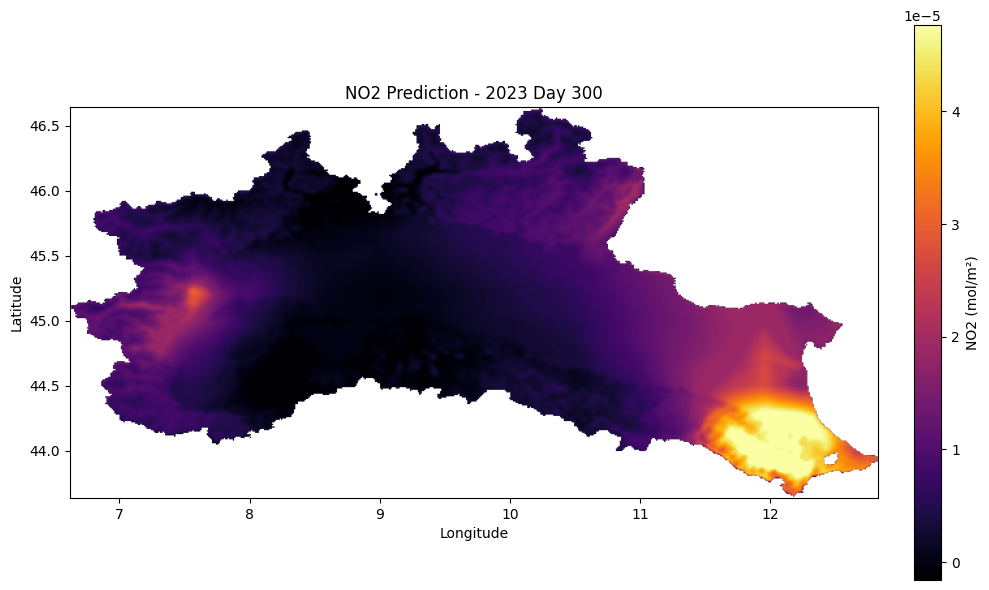

Data range: -0.000004 to 0.000068
Display range: -0.000002 to 0.000048
Valid pixels: 94666
NaN pixels (AOI外): 91634


In [ ]:
# === 使用nodata值处理 ===
import rasterio, numpy as np, matplotlib.pyplot as plt
import geopandas as gpd
from rasterio.mask import mask

TIF = "/content/drive/MyDrive/3DCNN_Pipeline/artifacts/no2_pred_2023_stack.tif"
AOI_SHP = "/content/drive/MyDrive/AOI/delimitazione_distretto.shp"

BAND = 300

aoi = gpd.read_file(AOI_SHP)
print(f"AOI CRS: {aoi.crs}")

with rasterio.open(TIF) as ds:
    aoi_reproj = aoi.to_crs(ds.crs)
    # 使用nodata参数，将AOI外区域设为NaN而不是0
    clipped_data, clipped_transform = mask(ds, aoi_reproj.geometry, crop=True, nodata=np.nan)
    arr = clipped_data[0].astype(np.float32)

    bounds = rasterio.transform.array_bounds(arr.shape[0], arr.shape[1], clipped_transform)
    extent = [bounds[0], bounds[2], bounds[1], bounds[3]]

# 用分位数确定显示范围
mask_finite = np.isfinite(arr)
vmin = float(np.percentile(arr[mask_finite], 2))
vmax = float(np.percentile(arr[mask_finite], 98))

plt.figure(figsize=(10, 6))
# 现在只需要处理NaN
masked_arr = np.ma.masked_where(np.isnan(arr), arr)
im = plt.imshow(masked_arr, cmap="inferno", vmin=vmin, vmax=vmax,
                extent=extent, origin="upper")
plt.colorbar(im, fraction=0.046, pad=0.04, label="NO2 (mol/m²)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title(f"NO2 Prediction - 2023 Day {BAND}")
plt.tight_layout()
plt.show()

print(f"Data range: {np.nanmin(arr):.6f} to {np.nanmax(arr):.6f}")
print(f"Display range: {vmin:.6f} to {vmax:.6f}")
print(f"Valid pixels: {np.sum(mask_finite)}")
print(f"NaN pixels (AOI外): {np.sum(np.isnan(arr))}")

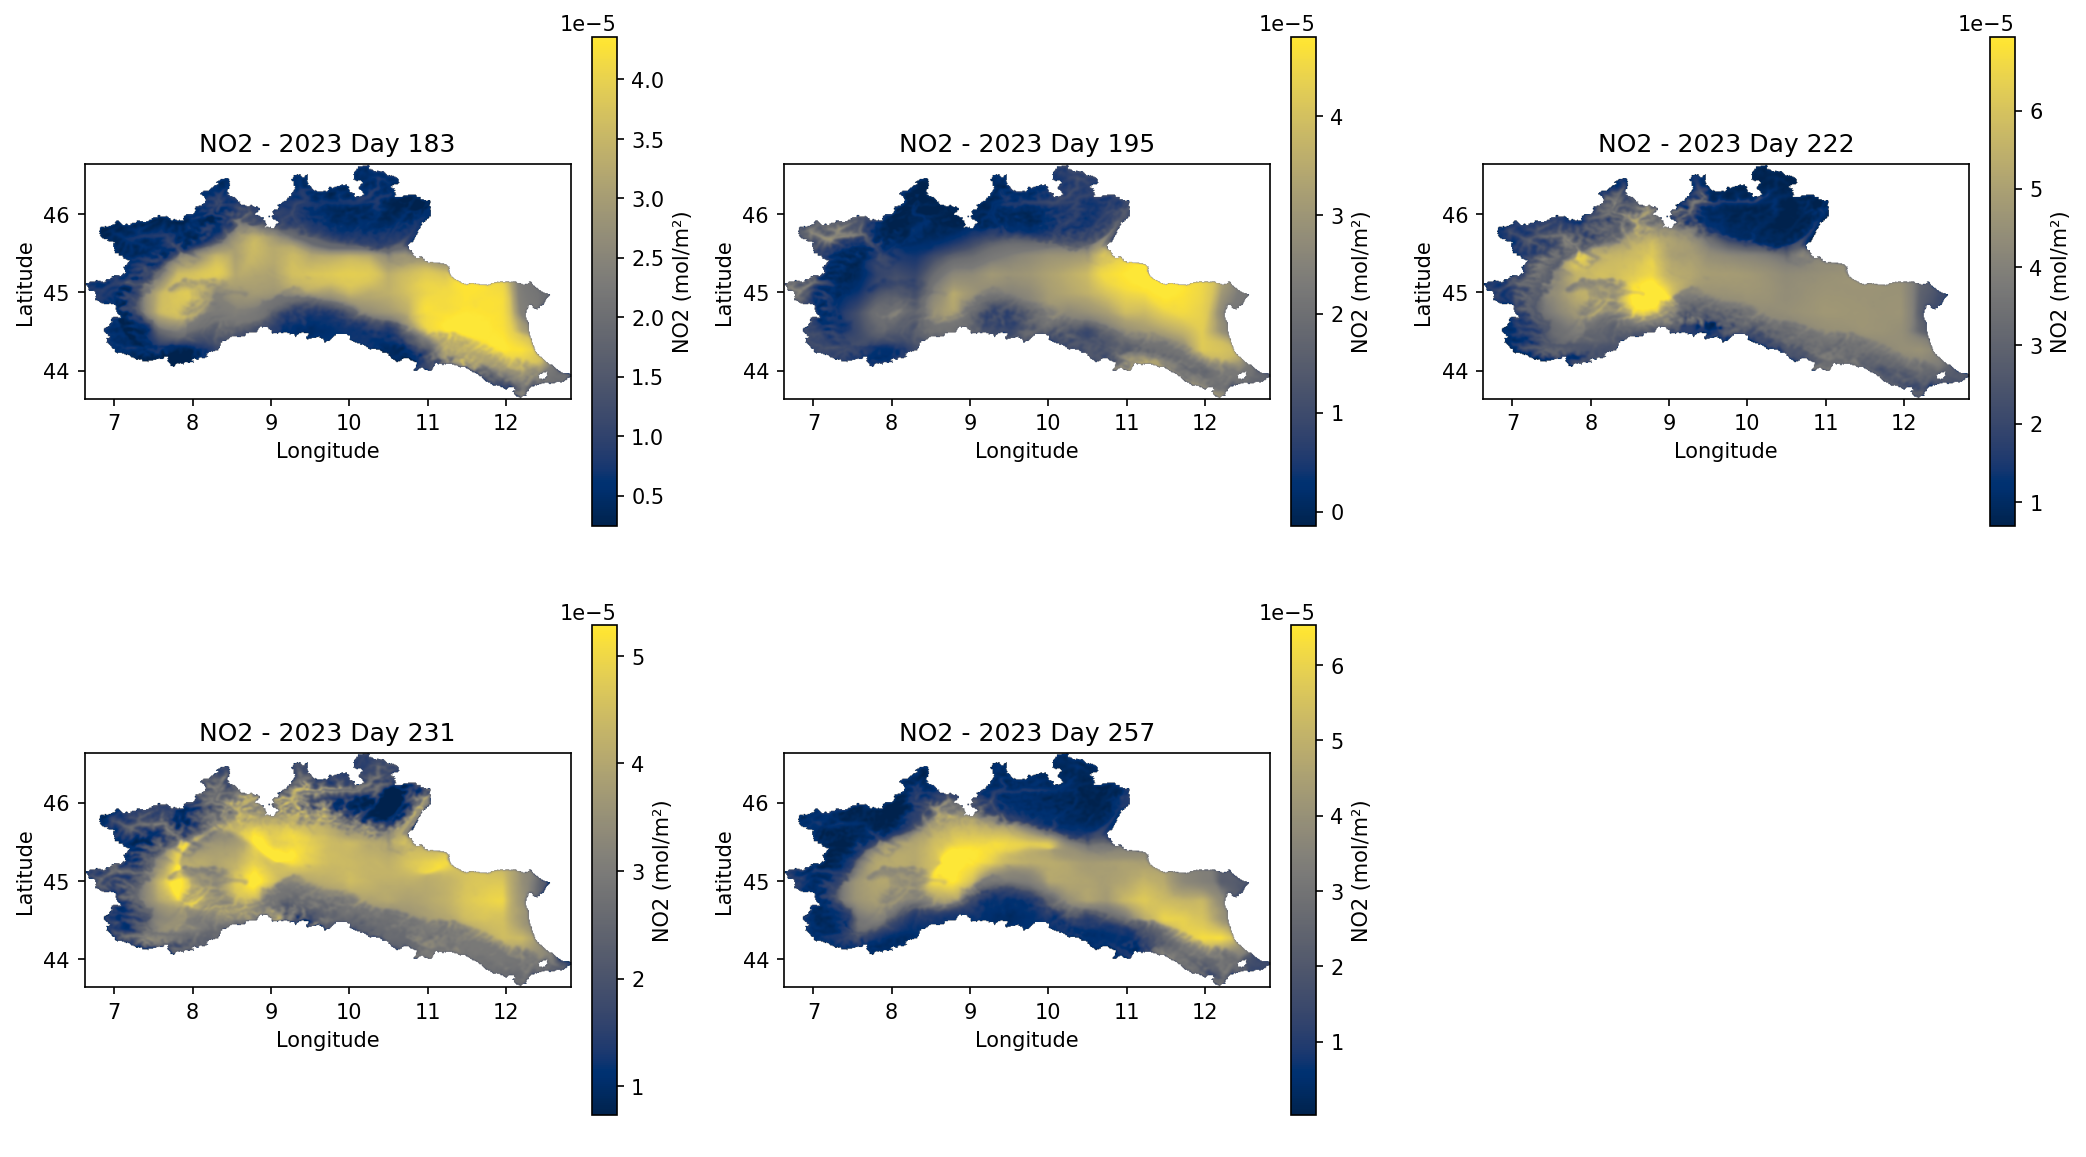

Days plotted: [183, 195, 222, 231, 257]


In [ ]:
# 随机可视化5天（稳健extent & AOI外透明）
import numpy as np, matplotlib.pyplot as plt, rasterio, geopandas as gpd, random
from rasterio.mask import mask

TIF = "/content/drive/MyDrive/3DCNN_Pipeline/artifacts/no2_pred_2023_stack.tif"
AOI_SHP = "/content/drive/MyDrive/AOI/delimitazione_distretto.shp"
NUM = 5

aoi = gpd.read_file(AOI_SHP)

with rasterio.open(TIF) as ds:
    total = ds.count
    bands = sorted(random.sample(range(1, total + 1), NUM))
    aoi_reproj = aoi.to_crs(ds.crs)

ncols, nrows = 3, 2
fig, axes = plt.subplots(nrows, ncols, figsize=(14, 8), dpi=150)
axes = axes.ravel()

for i, b in enumerate(bands):
    with rasterio.open(TIF) as ds:
        # 用 nodata=np.nan，AOI外为NaN；filled=True 返回普通ndarray
        clipped, trans = mask(
            ds, aoi_reproj.geometry, crop=True,
            nodata=np.nan, filled=True, indexes=b
        )
    # clipped 形状可能是 (1,H,W) 或 (H,W)，统一 squeeze
    arr = np.squeeze(clipped).astype(np.float32)

    # 稳健计算 extent（避免 array_bounds 的元组维度问题）
    h, w = arr.shape
    # Affine 变换：左上与右下角
    left, top = trans * (0, 0)
    right, bottom = trans * (w, h)
    extent = [left, right, bottom, top]

    valid = np.isfinite(arr)
    if valid.sum() == 0:
        # 整幅为空则跳过
        ax = axes[i]
        ax.set_title(f"NO2 - 2023 Day {b} (no valid pixels)")
        ax.axis("off")
        continue

    # 1–99 分位数裁剪，避免极端值主导
    vmin = float(np.percentile(arr[valid], 1))
    vmax = float(np.percentile(arr[valid], 99))
    if vmax <= vmin:
        vmax = vmin + 1e-12

    ax = axes[i]
    masked_arr = np.ma.masked_where(~valid, arr)
    im = ax.imshow(masked_arr, cmap="cividis", vmin=vmin, vmax=vmax,
                   extent=extent, origin="upper")
    ax.set_title(f"NO2 - 2023 Day {b}")
    ax.set_xlabel("Longitude"); ax.set_ylabel("Latitude")
    cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label("NO2 (mol/m²)")

# 隐藏多余子图
for j in range(i + 1, nrows * ncols):
    axes[j].axis("off")

plt.tight_layout()
plt.show()
print("Days plotted:", bands)

#  SO2 在下面，NO2 在上面，伪3D cnn

In [ ]:
%%writefile /content/drive/MyDrive/3DCNN_Pipeline/SO2_dynamic_gap_dataloader.py

"""
动态缺口DataLoader实现
包含硬性保护、文件列表缓存、动态缺口生成和可复现性
"""

import os
import json
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from typing import Dict, List, Tuple, Optional, Union
import random
from pathlib import Path
import logging
import re

# 设置日志
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

class RandomGapMasker:
    """随机缺口生成器 - 支持多种缺口类型"""

    def __init__(self,
                 pixel_gap_prob: float = 0.1,
                 patch_gap_prob: float = 0.05,
                 timestep_gap_prob: float = 0.02,
                 channel_gap_prob: float = 0.01,
                 patch_size: int = 8,
                 random_seed: int = 42,
                 use_nan_mask: bool = False):
        """
        初始化缺口生成器

        Args:
            pixel_gap_prob: 像素级缺口概率
            patch_gap_prob: 块级缺口概率
            timestep_gap_prob: 时间步缺口概率
            channel_gap_prob: 通道缺口概率
            patch_size: 块大小
            random_seed: 随机种子
        """
        self.pixel_gap_prob = pixel_gap_prob
        self.patch_gap_prob = patch_gap_prob
        self.timestep_gap_prob = timestep_gap_prob
        self.channel_gap_prob = channel_gap_prob
        self.patch_size = patch_size
        self.random_seed = random_seed
        self.use_nan_mask = bool(use_nan_mask)

    def generate_gaps(self, x: torch.Tensor, seed: int) -> Tuple[torch.Tensor, torch.Tensor]:
        """
        生成缺口掩码

        Args:
            x: 输入数据 (T, C, H, W) 或 (C, H, W)
            seed: 随机种子

        Returns:
            x_masked: 带缺口的数据
            mask: 缺口掩码 (1=有效, 0=缺口)
        """
        # 使用局部随机生成器，避免污染全局RNG
        g = torch.Generator(device=x.device if x.is_cuda else 'cpu').manual_seed(int(seed))

        # 确保输入是4D
        if x.ndim == 3:
            x = x.unsqueeze(0)  # (1, C, H, W)
            squeeze_output = True
        else:
            squeeze_output = False

        T, C, H, W = x.shape
        # 内部用bool有效掩码，最后再转float
        mask = torch.ones_like(x, dtype=torch.bool)

        # 1. 像素级缺口
        if self.pixel_gap_prob > 0:
            pixel_mask = torch.rand((T, C, H, W), generator=g, device=x.device) > self.pixel_gap_prob
            mask &= pixel_mask

        # 2. 块级缺口
        if self.patch_gap_prob > 0:
            num_patches_h = H // self.patch_size
            num_patches_w = W // self.patch_size

            for t in range(T):
                for c in range(C):
                    for ph in range(num_patches_h):
                        for pw in range(num_patches_w):
                            if torch.rand((1,), generator=g, device=x.device) < self.patch_gap_prob:
                                start_h = ph * self.patch_size
                                end_h = min(start_h + self.patch_size, H)
                                start_w = pw * self.patch_size
                                end_w = min(start_w + self.patch_size, W)
                                mask[t, c, start_h:end_h, start_w:end_w] = False

        # 3. 时间步缺口
        if self.timestep_gap_prob > 0:
            timestep_mask = torch.rand((T,), generator=g, device=x.device) > self.timestep_gap_prob
            mask &= timestep_mask.view(T, 1, 1, 1)

        # 4. 通道缺口
        if self.channel_gap_prob > 0:
            channel_mask = torch.rand((C,), generator=g, device=x.device) > self.channel_gap_prob
            mask &= channel_mask.view(1, C, 1, 1)

        # 应用缺口
        mask_out = mask.to(dtype=torch.float32)
        x_masked = x.clone()
        if not self.use_nan_mask:
            x_masked *= mask_out
        else:
            x_masked[~mask] = torch.tensor(float('nan'), dtype=x_masked.dtype, device=x_masked.device)

        # 恢复原始维度
        if squeeze_output:
            x_masked = x_masked.squeeze(0)
            mask_out = mask_out.squeeze(0)

        return x_masked, mask_out

class CacheDataset(Dataset):
    """缓存数据集 - 支持动态缺口生成"""

    def __init__(self,
                 pollutant: str,
                 split: str,
                 base_path: str,
                 scaler_dir: str,
                 config_file: str,
                 feature_stacks_path: str,
                 gap_probability: float = 0.2,
                 random_seed: int = 42):
        """
        初始化数据集

        Args:
            pollutant: 污染物类型 ('NO2' 或 'SO2')
            split: 数据分割 ('train', 'val', 'test')
            base_path: 基础路径
            scaler_dir: scaler文件目录
            config_file: 配置文件路径
            gap_probability: 缺口概率
            random_seed: 随机种子
        """
        self.pollutant = pollutant
        self.split = split
        self.base_path = base_path
        self.scaler_dir = scaler_dir
        self.config_file = config_file
        self.gap_probability = gap_probability
        self.random_seed = random_seed
        self.feature_stacks_path = feature_stacks_path

        # 加载配置
        self.config = self._load_config()

        # 加载scaler参数 (tensor化一次)
        self.scaler_params = self._load_scaler()
        self.mv: torch.Tensor = self.scaler_params["mean_vec"]
        self.sv: torch.Tensor = self.scaler_params["std_vec"]

        # 缓存文件列表
        self.file_list = self._cache_file_list()

        # 训练时的epoch，用于改变缺口种子
        self.epoch: int = 0

        # 初始化缺口生成器
        # 默认仅启用像素级缺口，其它类型概率置0，接口简化
        self.gap_masker = RandomGapMasker(
            pixel_gap_prob=gap_probability,
            patch_gap_prob=0.0,
            timestep_gap_prob=0.0,
            channel_gap_prob=0.0,
            random_seed=random_seed
        )

        logger.info(f"初始化{pollutant} {split}数据集: {len(self.file_list)}个样本")

    def _load_config(self) -> Dict:
        """加载配置文件"""
        try:
            with open(self.config_file, 'r') as f:
                config = json.load(f)
            return config
        except Exception as e:
            logger.info(f"加载配置文件失败: {e}")
            return {}

    def _load_scaler(self) -> Dict:
        """加载scaler参数"""
        scaler_path = os.path.join(self.scaler_dir, self.pollutant, "meanstd_global_2019_2021.npz")

        try:
            scaler_data = np.load(scaler_path, allow_pickle=True)
            mean_vec = scaler_data['mean_vec']
            std_vec = scaler_data['std_vec']

            # 硬性保护1: 形状与通道数验证
            logger.info(f"{self.pollutant} scaler参数: mean_vec形状={mean_vec.shape}, std_vec形状={std_vec.shape}")

            # 硬性保护2: 数值稳定性 + tensor化
            eps = 1e-6
            mv = torch.from_numpy(np.asarray(mean_vec, dtype=np.float32))
            sv = torch.from_numpy(np.asarray(np.maximum(std_vec, eps), dtype=np.float32))

            sig = scaler_data.get('channels_signature', '')
            if sig:
                logger.info(f"{self.pollutant} channels_signature: {sig}")

            return {
                'mean_vec': mv,
                'std_vec': sv,
                'channels_signature': sig,
                'channel_list': scaler_data.get('channel_list', [])
            }
        except Exception as e:
            logger.error(f"加载scaler参数失败: {e}")
            raise

    def _extract_year(self, fname: str) -> Optional[str]:
        """使用正则表达式提取8位日期再取年份"""
        m = re.search(r'(\d{8})', fname)
        return m.group(1)[:4] if m else None

    def _extract_month(self, fname: str) -> Optional[str]:
        """使用正则表达式提取8位日期再取月份"""
        m = re.search(r'(\d{8})', fname)
        return m.group(1)[4:6] if m else None

    def _cache_file_list(self) -> List[str]:
        """缓存文件列表（兼容 NO2_2019/... 或平铺 NO2/*.npz，SO2剔除冬季数据）"""
        keep = {"train": ["2019", "2020", "2021"], "val": ["2022"], "test": ["2023"]}[self.split]
        files: List[str] = []

        # SO2 剔除冬季数据：12月、1月、2月
        winter_months = ["12", "01", "02"] if self.pollutant == "SO2" else []

        # A) 优先：在 Feature_Stacks 下按年目录扫描，例如 NO2_2019、NO2_2020
        for y in keep:
            year_dir = os.path.join(self.feature_stacks_path, f"{self.pollutant}_{y}")
            if os.path.isdir(year_dir):
                for fname in sorted(os.listdir(year_dir)):
                    if fname.endswith('.npz'):
                        # 检查是否在冬季月份（仅对SO2）
                        if winter_months:
                            month = self._extract_month(fname)
                            if month in winter_months:
                                continue  # 跳过冬季数据
                        files.append(os.path.join(year_dir, fname))

        # B) 回退：若没有找到年目录，再扫描平铺目录 Feature_Stacks/NO2
        if not files:
            root = os.path.join(self.feature_stacks_path, self.pollutant)
            if os.path.isdir(root):
                flat = sorted(os.path.join(root, f) for f in os.listdir(root) if f.endswith('.npz'))
                # 用正则抽取年份再过滤
                filtered = []
                for p in flat:
                    y = self._extract_year(os.path.basename(p))
                    if y in keep:
                        filtered.append(p)
                files = filtered

                # 冬季剔除（若启用）
                if winter_months:
                    files = [
                        p for p in files
                        if (self._extract_month(os.path.basename(p)) not in winter_months)
                    ]

        if not files:
            winter_msg = "（已剔除冬季数据）" if winter_months else ""
            raise RuntimeError(
                f"{self.pollutant}-{self.split} 没有可用样本{winter_msg}。"
                f"需要 {self.feature_stacks_path}/{self.pollutant}_2019 等年目录，"
                f"或 {self.feature_stacks_path}/{self.pollutant} 平铺目录。"
            )
        return files

    def _read_npz(self, path: str) -> Tuple[np.ndarray, np.ndarray, Dict]:
        """统一读取函数，先尝试常规键（可mmap），再尝试0-d object（不mmap）"""
        with np.load(path, allow_pickle=True, mmap_mode='r') as d:
            # 方案1：已有组合好的矩阵 X/y
            if 'X' in d.files:
                X = d['X']; y = d['y']
                meta = d['meta'].item() if 'meta' in d.files else {}

                # 读取原始观测掩码
                orig_mask = None
                orig_key = f'{self.pollutant.lower()}_mask'
                if orig_key in d.files:
                    orig_mask = d[orig_key].astype(np.float32)  # 0/1
                meta['orig_mask'] = orig_mask

                return X, y, meta
            # 方案2：单日栅格，分散键（no2_target/so2_target / feature layers）
            target_key = f'{self.pollutant.lower()}_target'
            if target_key in d.files:
                y = d[target_key]
                # 定义通道顺序（尽可能与scaler一致）
                if self.pollutant == 'SO2':
                    default_order = [
                        'dem','slope','pop',
                        'lulc_class_0','lulc_class_1','lulc_class_2','lulc_class_3','lulc_class_4',
                        'lulc_class_5','lulc_class_6','lulc_class_7','lulc_class_8','lulc_class_9',
                        'sin_doy','cos_doy','weekday_weight',
                        'u10','v10','blh','tp','t2m','sp','str','ssr_clr','ws','wd_sin','wd_cos',
                        'so2_lag_1day','so2_neighbor','so2_climate_prior'
                    ]
                else:  # NO2
                    default_order = [
                        'dem','slope','pop',
                        'lulc_class_0','lulc_class_1','lulc_class_2','lulc_class_3','lulc_class_4',
                        'lulc_class_5','lulc_class_6','lulc_class_7','lulc_class_8','lulc_class_9',
                        'sin_doy','cos_doy','weekday_weight',
                        'u10','v10','blh','tp','t2m','sp','str','ssr_clr','ws','wd_sin','wd_cos',
                        'no2_lag_1day','no2_neighbor'
                    ]
                # 若scaler中带有通道列表，优先使用（兼容 numpy 数组）
                ch_list = self.scaler_params.get('channel_list')
                if isinstance(ch_list, np.ndarray):
                    ch_list = ch_list.tolist()
                if not ch_list:
                    ch_list = default_order

                # 通道数对齐保护：trim/pad ch_list 以匹配 scaler 长度
                mv_len = int(self.mv.numel())
                if len(ch_list) != mv_len:
                    logger.warning(f"[{self.pollutant}] channel_list({len(ch_list)}) != scaler({mv_len}); trim/pad")
                    if len(ch_list) > mv_len:
                        ch_list = ch_list[:mv_len]
                    else:
                        ch_list = ch_list + [None] * (mv_len - len(ch_list))

                # 构造与 scaler 对齐的通道：缺失的用0填充并记录
                H, W = y.shape
                stacked = []
                missing = []
                present = []
                for k in ch_list:
                    if k is None:
                        stacked.append(np.zeros((H, W), dtype=np.float32))
                        missing.append('PAD_NULL')
                    elif k in d.files:
                        stacked.append(d[k].astype(np.float32, copy=False))
                        present.append(k)
                    else:
                        stacked.append(np.zeros((H, W), dtype=np.float32))
                        missing.append(k)
                X = np.stack(stacked, axis=0)

                # 读取原始观测掩码
                orig_mask = None
                orig_key = f'{self.pollutant.lower()}_mask'
                if orig_key in d.files:
                    orig_mask = d[orig_key].astype(np.float32)  # 0/1

                meta = {
                    'year': int(d['year']) if 'year' in d.files else None,
                    'day': int(d['day']) if 'day' in d.files else None,
                    'features': ch_list,
                    'missing_features': missing,
                    'present_features': present,
                    'orig_mask_present': f'{self.pollutant.lower()}_mask' in d.files,
                    'orig_mask': orig_mask,
                }
                return X, y, meta
        # 再处理 0-d object dict
        with np.load(path, allow_pickle=True) as d2:
            # 扫描找到 dtype=object 的 0-d 条目（键名可能不是固定）
            obj = None
            for k in d2.files:
                v = d2[k]
                if isinstance(v, np.ndarray) and v.shape == () and v.dtype == object:
                    obj = v
                    break
            if obj is not None:
                obj = obj.item()
                X = obj.get('X'); y = obj.get('y'); meta = obj.get('meta', {})
                return X, y, meta
        raise ValueError(f"无法解析文件: {path}")

    def _load_sample(self, file_path: str) -> Tuple[torch.Tensor, torch.Tensor, Dict]:
        """加载单个样本"""
        try:
            X_np, y_np, meta = self._read_npz(file_path)
            # 保证连续内存并指定float32，避免mmap/非连续导致的问题
            X = torch.from_numpy(np.ascontiguousarray(X_np, dtype=np.float32))
            # y 可能为 (1,H,W)，压成 (H,W)
            if isinstance(y_np, np.ndarray) and y_np.ndim == 3 and y_np.shape[0] == 1:
                y_np = y_np.squeeze(0)
            y = torch.from_numpy(np.ascontiguousarray(y_np, dtype=np.float32))
            # 形状快速断言
            assert X.ndim in (3, 4), f"X.ndim应为3/4，实际={X.ndim}"
            return X, y, meta
        except Exception as e:
            logger.error(f"加载样本失败 {file_path}: {e}")
            raise

    def _normalize_data(self, X: torch.Tensor) -> torch.Tensor:
        """标准化数据 - 3D/4D兼容"""
        # 放到与 X 相同的 device，避免 GPU 上 device mismatch
        mean_vec = self.mv.to(X.device)
        std_vec = self.sv.to(X.device)

        # 硬性保护3: 形状与通道数验证
        assert X.shape[-3] == len(mean_vec) == len(std_vec), \
            f"通道数不匹配: X={X.shape[-3]}, scaler=({len(mean_vec)}, {len(std_vec)})"

        # 硬性保护4: 数值稳定性
        eps = torch.as_tensor(1e-6, device=X.device)
        std_vec = torch.maximum(std_vec, eps)

        # 硬性保护5: 3D/4D兼容标准化
        if X.ndim == 3:
            # (C, H, W) -> (C, H, W)
            X = (X - mean_vec[:, None, None]) / std_vec[:, None, None]
        elif X.ndim == 4:
            # (T, C, H, W) -> (T, C, H, W)
            X = (X - mean_vec[None, :, None, None]) / std_vec[None, :, None, None]
        else:
            raise ValueError(f"意外的维度: X.ndim={X.ndim}")

        return X

    def __len__(self) -> int:
        return len(self.file_list)

    def __getitem__(self, idx: int) -> Tuple[torch.Tensor, torch.Tensor, torch.Tensor, Dict]:
        """获取单个样本"""
        file_path = self.file_list[idx]

        # 加载数据
        X, y, meta = self._load_sample(file_path)

        # 标准化
        X = self._normalize_data(X)

        # 生成缺口（仅训练集）
        if self.split == 'train':
            # 使用样本级可复现种子 (包含 epoch)
            sample_seed = (int(self.random_seed) ^ int(idx) ^ int(self.epoch)) & 0xFFFFFFFF
            X_masked, mask = self.gap_masker.generate_gaps(X, sample_seed)
        else:
            # 验证/测试集不生成缺口
            X_masked = X
            mask = torch.ones_like(X)

        # 如果有原始观测掩码，用它加强有效像元（通用广播）
        orig = meta.get('orig_mask')
        if orig is not None:
            orig_t = torch.from_numpy(orig).to(mask.device, dtype=mask.dtype)
            while orig_t.ndim < mask.ndim:
                orig_t = orig_t.unsqueeze(0)  # 变成(...,H,W)
            mask *= orig_t

        # 为了排错，第一次取样本时打印一次特征/缺失摘要（仅idx==0时）
        if idx == 0:
            feats = meta.get("features")
            if isinstance(feats, list):
                logger.info(f"[{self.pollutant} {self.split}] C={X.shape[-3]} "
                           f"features[:5]={feats[:5]} "
                           f"missing[:5]={meta.get('missing_features', [])[:5]}")

        # 把缺口配置也写进meta，便于追踪
        meta = dict(meta)
        meta['gap'] = {
            'pixel_p': self.gap_masker.pixel_gap_prob,
            'patch_p': self.gap_masker.patch_gap_prob,
            'timestep_p': self.gap_masker.timestep_gap_prob,
            'channel_p': self.gap_masker.channel_gap_prob,
            'patch_size': self.gap_masker.patch_size,
        }
        return X_masked, mask, y, meta

    def set_epoch(self, epoch: int) -> None:
        """设置当前epoch，使样本缺口分布随epoch变化而改变"""
        self.epoch = int(epoch)

class DataLoaderFactory:
    """DataLoader工厂类"""

    def __init__(self, base_path: str = "/content/drive/MyDrive/3DCNN_Pipeline", feature_stacks_path: str = "/content/drive/MyDrive/Feature_Stacks"):
        """
        初始化工厂

        Args:
            base_path: 基础路径
        """
        self.base_path = base_path
        self.scaler_dir = os.path.join(base_path, "artifacts", "scalers")
        self.config_file = os.path.join(base_path, "artifacts", "config.json")
        self.feature_stacks_path = feature_stacks_path

    def create_dataloader(self,
                         pollutant: str,
                         split: str,
                         batch_size: int = 4,
                         shuffle: Optional[bool] = None,
                         num_workers: int = 0,
                         gap_probability: float = 0.2,
                         random_seed: int = 42) -> DataLoader:
        """
        创建DataLoader

        Args:
            pollutant: 污染物类型
            split: 数据分割
            batch_size: 批次大小
            shuffle: 是否打乱
            num_workers: 工作进程数
            gap_probability: 缺口概率
            random_seed: 随机种子

        Returns:
            DataLoader实例
        """
        # 创建数据集
        dataset = CacheDataset(
            pollutant=pollutant,
            split=split,
            base_path=self.base_path,
            scaler_dir=self.scaler_dir,
            config_file=self.config_file,
            feature_stacks_path=self.feature_stacks_path,
            gap_probability=gap_probability,
            random_seed=random_seed
        )

        if shuffle is None:
            shuffle = (split == 'train')

        def worker_init_fn(worker_id: int):
            base_seed = torch.initial_seed() % 2**32
            np.random.seed(base_seed + worker_id)
            random.seed(base_seed + worker_id)

        # 创建DataLoader
        pin = torch.cuda.is_available()
        dataloader = DataLoader(
            dataset,
            batch_size=batch_size,
            shuffle=shuffle,
            num_workers=num_workers,
            pin_memory=pin,
            drop_last=True if split == 'train' else False,
            persistent_workers=(num_workers > 0),
            worker_init_fn=worker_init_fn
        )

        return dataloader

def test_dataloader():
    """测试DataLoader"""
    try:
        # 创建工厂
        factory = DataLoaderFactory()

        # 测试NO2训练集
        logger.info("测试NO2训练集...")
        no2_train_loader = factory.create_dataloader(
            pollutant='NO2',
            split='train',
            batch_size=2,
            gap_probability=0.2
        )

        # 获取一个批次
        for batch_idx, (X_masked, mask, y, meta) in enumerate(no2_train_loader):
            logger.info(f"NO2批次 {batch_idx}: X_masked形状={X_masked.shape}, mask形状={mask.shape}, y形状={y.shape}")
            break

        # 测试SO2验证集
        logger.info("测试SO2验证集...")
        so2_val_loader = factory.create_dataloader(
            pollutant='SO2',
            split='val',
            batch_size=2,
            gap_probability=0.0  # 验证集不生成缺口
        )

        # 获取一个批次
        for batch_idx, (X_masked, mask, y, meta) in enumerate(so2_val_loader):
            logger.info(f"SO2批次 {batch_idx}: X_masked形状={X_masked.shape}, mask形状={mask.shape}, y形状={y.shape}")
            break

        logger.info("DataLoader测试完成！")

    except Exception as e:
        logger.error(f"DataLoader测试失败: {e}")
        raise

#if __name__ == "__main__":
 #   test_dataloader()

Overwriting /content/drive/MyDrive/3DCNN_Pipeline/SO2_dynamic_gap_dataloader.py


In [ ]:
# 极简检查（30秒内完成）
from SO2_dynamic_gap_dataloader import DataLoaderFactory

fac = DataLoaderFactory()
# 只检查一个样本
train_loader = fac.create_dataloader("SO2", "train", batch_size=1, gap_probability=0.0, num_workers=0)
Xm, m, y, meta = next(iter(train_loader))
print("✅ 形状:", Xm.shape, y.shape)
print("✅ 通道数:", Xm.shape[1])
print("✅ 数据类型:", Xm.dtype, y.dtype)

ERROR:SO2_dynamic_gap_dataloader:加载配置文件失败: [Errno 2] No such file or directory: '/content/drive/MyDrive/3DCNN_Pipeline/artifacts/config.json'


✅ 形状: torch.Size([1, 30, 300, 621]) torch.Size([1, 300, 621])
✅ 通道数: 30
✅ 数据类型: torch.float32 torch.float32


In [ ]:
# 检查2：统计SO2的mu_y/std_y
import math, torch

# 创建统计用的loader
fac = DataLoaderFactory()
train_stat = fac.create_dataloader("SO2", "train", batch_size=1, gap_probability=0.0, num_workers=0)

# 统计y的均值和标准差
sum_w = 0.0; sum_y = 0.0; sum_y2 = 0.0
count = 0

for Xm, m, y, meta in train_stat:
    w = (m[:, :1, ...] > 0).float()[:,0]  # 有效像元权重
    y = torch.nan_to_num(y, nan=0.0)
    sum_w  += w.sum().item()
    sum_y  += (y*w).sum().item()
    sum_y2 += ((y**2)*w).sum().item()
    count += 1
    if count >= 10:  # 只检查前10个样本，避免太慢
        break

mu_y  = sum_y/sum_w
var_y = max(sum_y2 - (sum_y*sum_y)/sum_w, 0.0)/sum_w
std_y = math.sqrt(var_y)

print(f"✅ SO2统计: mu_y={mu_y:.6e}, std_y={std_y:.6e}")
print(f"✅ 检查样本数: {count}")
print(f"✅ 有效像元数: {sum_w:.0f}")

ERROR:SO2_dynamic_gap_dataloader:加载配置文件失败: [Errno 2] No such file or directory: '/content/drive/MyDrive/3DCNN_Pipeline/artifacts/config.json'


✅ SO2统计: mu_y=3.269887e-05, std_y=2.589234e-04
✅ 检查样本数: 10
✅ 有效像元数: 1863000


In [ ]:
# ========= SO2 训练（超稳定版）=========
import math, torch, torch.nn as nn, torch.optim as optim
from torch.cuda.amp import autocast, GradScaler
from SO2_dynamic_gap_dataloader import DataLoaderFactory

# 超保守超参
BASE_PATH    = "/content/drive/MyDrive/3DCNN_Pipeline"
FEATURE_BASE = "/content/drive/MyDrive/Feature_Stacks"
epochs       = 20
lr           = 1e-4          # 进一步降低：5e-4 → 1e-4
batch_size   = 2             # 进一步减小：4 → 2
num_workers  = 0
gap_p        = 0.05          # 大幅减少缺口：0.1 → 0.05
device       = "cuda" if torch.cuda.is_available() else "cpu"
torch.backends.cudnn.benchmark = True

# 模型（更保守的初始化）
class Simple3DCNN(nn.Module):
    def __init__(self, in_ch=30):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv3d(in_ch, 64, 3, padding=1), nn.ReLU(inplace=True),
            nn.Conv3d(64, 64, 3, padding=1),     nn.ReLU(inplace=True),
            nn.Conv3d(64, 32, 3, padding=1),     nn.ReLU(inplace=True),
            nn.Conv3d(32, 1, 1),
        )
        # 更保守的初始化
        self._initialize_weights()

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv3d):
                nn.init.xavier_uniform_(m.weight, gain=0.1)  # 更小的初始化
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)

    def forward(self, x):
        x = x.unsqueeze(2)
        return self.net(x).squeeze(2)

def masked_mse(pred, target, mask):
    w   = (mask[:, :1, ...] > 0).float()
    tgt = torch.nan_to_num(target.unsqueeze(1), nan=0.0, posinf=0.0, neginf=0.0)
    prd = torch.nan_to_num(pred,              nan=0.0, posinf=0.0, neginf=0.0)

    # 添加数值稳定性检查
    if torch.isnan(prd).any() or torch.isinf(prd).any():
        print("WARNING: NaN/Inf in predictions!")
        prd = torch.nan_to_num(prd, nan=0.0, posinf=1.0, neginf=-1.0)

    diff2 = (prd - tgt) ** 2
    num  = (diff2 * w).sum()
    den  = w.sum().clamp_min(1.0)
    return num / den

# DataLoader
factory = DataLoaderFactory(base_path=BASE_PATH, feature_stacks_path=FEATURE_BASE)
train_loader_stat = factory.create_dataloader("SO2", "train", batch_size=batch_size, gap_probability=0.0, num_workers=num_workers)
train_loader      = factory.create_dataloader("SO2", "train", batch_size=batch_size, gap_probability=gap_p,  num_workers=num_workers)
val_loader        = factory.create_dataloader("SO2", "val",   batch_size=batch_size, gap_probability=0.0,   num_workers=num_workers)

print(f"[INFO] SO2 in_ch=30")

# 1) 统计SO2训练集标签的 μy / σy
sum_w = 0.0; sum_y = 0.0; sum_y2 = 0.0
with torch.no_grad():
    for Xm, m, y, _ in train_loader_stat:
        w = (m[:, :1, ...] > 0).float()[:,0]
        y = torch.nan_to_num(y, nan=0.0)
        sum_w  += w.sum().item()
        sum_y  += (y*w).sum().item()
        sum_y2 += ((y**2)*w).sum().item()
mu_y  = sum_y/sum_w
var_y = max(sum_y2 - (sum_y*sum_y)/sum_w, 0.0)/sum_w
std_y = math.sqrt(var_y)
print(f"[STAT] SO2 mu_y={mu_y:.6e}, std_y={std_y:.6e}")

# 2) 训练（更严格的梯度裁剪）
model     = Simple3DCNN(in_ch=30).to(device)
optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=1e-4)
scaler    = GradScaler()
best_val  = float("inf")
best_path = f"{BASE_PATH}/artifacts/best_so2_zscore.ckpt"

for epoch in range(epochs):
    model.train()
    train_loader.dataset.set_epoch(epoch)
    running = 0.0

    for b, (Xm, m, y, _) in enumerate(train_loader):
        Xm, m, y = Xm.to(device), m.to(device), y.to(device)
        Xm = torch.nan_to_num(Xm, nan=0.0)
        y  = torch.nan_to_num(y,  nan=0.0)
        y_z = (y - mu_y) / max(std_y, 1e-12)

        optimizer.zero_grad(set_to_none=True)
        with autocast():
            out  = model(Xm)
            loss = masked_mse(out, y_z, m)

        # 检查 loss 是否异常
        if loss.item() > 1000:  # 如果 loss 过大，跳过这个 batch
            print(f"WARNING: Skipping batch {b} due to large loss: {loss.item():.2f}")
            continue

        scaler.scale(loss).backward()

        # 更严格的梯度裁剪
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=0.5)

        scaler.step(optimizer); scaler.update()

        running += loss.item()
        if b % 10 == 0:  # 更频繁的打印
            print(f"epoch {epoch}  batch {b}/{len(train_loader)}  loss={loss.item():.6f}")

    train_loss = running / max(1, len(train_loader))
    print(f"epoch {epoch} train_loss={train_loss:.6f}")

    # 3) 验证
    model.eval()
    sum_sq, sum_w = 0.0, 0.0
    with torch.no_grad(), autocast():
        for Xm, m, y, _ in val_loader:
            Xm, m, y = Xm.to(device), m.to(device), y.to(device)
            Xm = torch.nan_to_num(Xm, nan=0.0)
            y  = torch.nan_to_num(y,  nan=0.0)
            pred = model(Xm) * std_y + mu_y
            w = (m[:, :1, ...] > 0).float()
            diff2 = (torch.nan_to_num(pred,0.0) - y.unsqueeze(1))**2
            sum_sq += (diff2 * w).sum().item()
            sum_w  += w.sum().item()
    val_rmse = math.sqrt(sum_sq / max(sum_w, 1.0))
    print(f"          val_RMSE={val_rmse:.6f}")

    if val_rmse < best_val:
        best_val = val_rmse
        torch.save({"model": model.state_dict(), "mu_y": mu_y, "std_y": std_y}, best_path)
        print(f"[best] saved -> {best_path}  val_RMSE={best_val:.6f}")

print("[DONE] SO2 training finished. best:", best_path, "val_RMSE=", best_val)

ERROR:SO2_dynamic_gap_dataloader:加载配置文件失败: [Errno 2] No such file or directory: '/content/drive/MyDrive/3DCNN_Pipeline/artifacts/config.json'
ERROR:SO2_dynamic_gap_dataloader:加载配置文件失败: [Errno 2] No such file or directory: '/content/drive/MyDrive/3DCNN_Pipeline/artifacts/config.json'
ERROR:SO2_dynamic_gap_dataloader:加载配置文件失败: [Errno 2] No such file or directory: '/content/drive/MyDrive/3DCNN_Pipeline/artifacts/config.json'


[INFO] SO2 in_ch=30
[STAT] SO2 mu_y=4.728363e-05, std_y=4.258803e-04
epoch 0  batch 0/548  loss=0.154835
epoch 0  batch 10/548  loss=0.405169
epoch 0  batch 20/548  loss=0.399819
epoch 0  batch 30/548  loss=0.535913
epoch 0  batch 40/548  loss=0.184237
epoch 0  batch 50/548  loss=0.381755
epoch 0  batch 60/548  loss=1.883537
epoch 0  batch 70/548  loss=0.318167
epoch 0  batch 80/548  loss=0.365722
epoch 0  batch 90/548  loss=0.254372
epoch 0  batch 100/548  loss=0.393984
epoch 0  batch 110/548  loss=0.335654
epoch 0  batch 120/548  loss=0.244256
epoch 0  batch 130/548  loss=0.072564
epoch 0  batch 140/548  loss=0.339252
epoch 0  batch 150/548  loss=0.012327
epoch 0  batch 160/548  loss=1.304523
epoch 0  batch 170/548  loss=0.299729
epoch 0  batch 180/548  loss=0.548816
epoch 0  batch 190/548  loss=0.012327
epoch 0  batch 200/548  loss=0.770744
epoch 0  batch 210/548  loss=0.665218
epoch 0  batch 220/548  loss=0.062029
epoch 0  batch 230/548  loss=1.840646
epoch 0  batch 240/548  loss=0

In [ ]:
# ========= SO2 模型评估（MAE/MSE/RMSE/R²/NRMSE/Pearson r）=========
import os, math
import numpy as np
import torch
from SO2_dynamic_gap_dataloader import DataLoaderFactory

# 路径
BASE = "/content/drive/MyDrive/3DCNN_Pipeline"
CKPT = f"{BASE}/artifacts/best_so2_zscore.ckpt"
SPLIT = "test"  # 或 "val"

# 标准化参数（从训练日志）
mu_y  = 4.728363e-05
std_y = 4.258803e-04

device = "cuda" if torch.cuda.is_available() else "cpu"
torch.backends.cudnn.benchmark = True

# 模型定义（必须匹配训练）
class Simple3DCNN(torch.nn.Module):
    def __init__(self, in_ch=30):
        super().__init__()
        self.net = torch.nn.Sequential(
            torch.nn.Conv3d(in_ch, 64, 3, padding=1), torch.nn.ReLU(inplace=True),
            torch.nn.Conv3d(64, 64, 3, padding=1),     torch.nn.ReLU(inplace=True),
            torch.nn.Conv3d(64, 32, 3, padding=1),     torch.nn.ReLU(inplace=True),
            torch.nn.Conv3d(32, 1, 1),
        )
    def forward(self, x):
        x = x.unsqueeze(2)
        return self.net(x).squeeze(2)

# 数据加载
factory = DataLoaderFactory(base_path=BASE)
loader = factory.create_dataloader(
    pollutant="SO2",
    split=SPLIT,
    batch_size=1,
    num_workers=0,
)

# 加载模型
model = Simple3DCNN(in_ch=30).to(device)
state = torch.load(CKPT, map_location=device)
model.load_state_dict(state["model"] if isinstance(state, dict) and "model" in state else state)
model.eval()

# 评估（单次遍历，鲁棒计算）
sum_abs = 0.0; sum_sq = 0.0; sum_cnt = 0.0
sum_y = 0.0; sum_y2 = 0.0; sum_xy = 0.0
sum_p = 0.0; sum_p2 = 0.0
y_min = float("inf"); y_max = float("-inf")

with torch.no_grad():
    for Xm, mask, y, _ in loader:
        Xm = torch.nan_to_num(Xm.to(device), nan=0.0)
        y  = y.to(device)

        pred_z = model(Xm)
        pred   = pred_z * std_y + mu_y

        valid = torch.isfinite(y)
        if valid.sum() == 0:
            continue

        yv = y[valid].float()
        pv = pred.squeeze(1)[valid].float()

        diff = pv - yv
        sum_abs += torch.sum(torch.abs(diff)).item()
        sum_sq  += torch.sum(diff * diff).item()
        n        = yv.numel()
        sum_cnt += n

        sum_y  += torch.sum(yv).item()
        sum_y2 += torch.sum(yv * yv).item()
        sum_xy += torch.sum(pv * yv).item()

        sum_p  += torch.sum(pv).item()
        sum_p2 += torch.sum(pv * pv).item()

        y_min = min(y_min, float(torch.min(yv)))
        y_max = max(y_max, float(torch.max(yv)))

# 计算指标
MAE  = sum_abs / max(sum_cnt, 1.0)
MSE  = sum_sq  / max(sum_cnt, 1.0)
RMSE = math.sqrt(MSE)

y_mean = sum_y / max(sum_cnt, 1.0)
SST = sum_y2 - sum_cnt * (y_mean ** 2)
R2 = float("nan") if SST <= 1e-20 else 1.0 - (sum_sq / SST)

p_mean = sum_p / max(sum_cnt, 1.0)
Sy = math.sqrt(max(SST / max(sum_cnt, 1.0), 1e-20))
Sp = math.sqrt(max((sum_p2 - sum_cnt * (p_mean ** 2)) / max(sum_cnt, 1.0), 1e-20))
cov_num = (sum_xy - sum_cnt * (y_mean * p_mean)) / max(sum_cnt, 1.0)
pearson_r = float("nan") if Sy <= 0 or Sp <= 0 else cov_num / (Sy * Sp)

NRMSE_std   = float("nan") if Sy <= 1e-20 else RMSE / Sy
NRMSE_range = float("nan") if (y_max - y_min) <= 1e-20 else RMSE / (y_max - y_min)

print(f"[SO2][{SPLIT}] valid_pixels={int(sum_cnt)}")
print(f"MAE={MAE:.6e}  MSE={MSE:.6e}  RMSE={RMSE:.6e}")
print(f"R2={R2:.4f}  NRMSE_std={NRMSE_std:.6f}  NRMSE_range={NRMSE_range:.6f}  Pearson r={pearson_r:.4f}")

ERROR:SO2_dynamic_gap_dataloader:加载配置文件失败: [Errno 2] No such file or directory: '/content/drive/MyDrive/3DCNN_Pipeline/artifacts/config.json'


[SO2][test] valid_pixels=13222910
MAE=1.273105e+00  MSE=1.707543e+00  RMSE=1.306730e+00
R2=-3929397.5566  NRMSE_std=1982.271060  NRMSE_range=109.699626  Pearson r=-0.0266


In [ ]:
# 检查 SO2 测试集的实际数值范围
import torch
from SO2_dynamic_gap_dataloader import DataLoaderFactory

BASE = "/content/drive/MyDrive/3DCNN_Pipeline"
factory = DataLoaderFactory(base_path=BASE)
test_loader = factory.create_dataloader("SO2", "test", batch_size=1, num_workers=0)

# 检查几个样本的实际 y 值
with torch.no_grad():
    for i, (Xm, mask, y, meta) in enumerate(test_loader):
        if i >= 3:  # 只看前3个样本
            break
        valid = torch.isfinite(y) & (mask[:, 0] > 0)
        if valid.sum() > 0:
            y_valid = y[valid]
            print(f"Sample {i}: y range = [{y_valid.min():.6e}, {y_valid.max():.6e}], mean = {y_valid.mean():.6e}")
        else:
            print(f"Sample {i}: No valid pixels")

ERROR:SO2_dynamic_gap_dataloader:加载配置文件失败: [Errno 2] No such file or directory: '/content/drive/MyDrive/3DCNN_Pipeline/artifacts/config.json'


Sample 0: No valid pixels
Sample 1: No valid pixels
Sample 2: No valid pixels


In [ ]:
# 更详细的 SO2 数据检查
import torch
from SO2_dynamic_gap_dataloader import DataLoaderFactory

BASE = "/content/drive/MyDrive/3DCNN_Pipeline"
factory = DataLoaderFactory(base_path=BASE)
test_loader = factory.create_dataloader("SO2", "test", batch_size=1, num_workers=0)

# 检查数据形状和内容
with torch.no_grad():
    for i, (Xm, mask, y, meta) in enumerate(test_loader):
        if i >= 2:  # 只看前2个样本
            break

        print(f"\n=== Sample {i} ===")
        print(f"Xm shape: {Xm.shape}")
        print(f"mask shape: {mask.shape}")
        print(f"y shape: {y.shape}")
        print(f"mask unique values: {torch.unique(mask)}")
        print(f"y range: [{y.min():.6e}, {y.max():.6e}]")
        print(f"y finite count: {torch.isfinite(y).sum()}")
        print(f"mask > 0 count: {(mask > 0).sum()}")
        print(f"mask[:, 0] > 0 count: {(mask[:, 0] > 0).sum()}")

        # 尝试不同的有效像素判断
        valid1 = torch.isfinite(y) & (mask > 0)
        valid2 = torch.isfinite(y) & (mask[:, 0] > 0)
        valid3 = torch.isfinite(y)

        print(f"valid1 count: {valid1.sum()}")
        print(f"valid2 count: {valid2.sum()}")
        print(f"valid3 count: {valid3.sum()}")

ERROR:SO2_dynamic_gap_dataloader:加载配置文件失败: [Errno 2] No such file or directory: '/content/drive/MyDrive/3DCNN_Pipeline/artifacts/config.json'



=== Sample 0 ===
Xm shape: torch.Size([1, 30, 300, 621])
mask shape: torch.Size([1, 30, 300, 621])
y shape: torch.Size([1, 300, 621])
mask unique values: tensor([1.])
y range: [nan, nan]
y finite count: 0
mask > 0 count: 5589000
mask[:, 0] > 0 count: 186300
valid1 count: 0
valid2 count: 0
valid3 count: 0

=== Sample 1 ===
Xm shape: torch.Size([1, 30, 300, 621])
mask shape: torch.Size([1, 30, 300, 621])
y shape: torch.Size([1, 300, 621])
mask unique values: tensor([1.])
y range: [nan, nan]
y finite count: 0
mask > 0 count: 5589000
mask[:, 0] > 0 count: 186300
valid1 count: 0
valid2 count: 0
valid3 count: 0


In [ ]:
# 检查 SO2 训练集和验证集是否正常
import torch
from SO2_dynamic_gap_dataloader import DataLoaderFactory

BASE = "/content/drive/MyDrive/3DCNN_Pipeline"
factory = DataLoaderFactory(base_path=BASE)

# 检查训练集
print("=== SO2 训练集检查 ===")
train_loader = factory.create_dataloader("SO2", "train", batch_size=1, num_workers=0)
with torch.no_grad():
    for i, (Xm, mask, y, meta) in enumerate(train_loader):
        if i >= 2:
            break
        print(f"Train Sample {i}: y finite count: {torch.isfinite(y).sum()}, y range: [{y.min():.6e}, {y.max():.6e}]")

# 检查验证集
print("\n=== SO2 验证集检查 ===")
val_loader = factory.create_dataloader("SO2", "val", batch_size=1, num_workers=0)
with torch.no_grad():
    for i, (Xm, mask, y, meta) in enumerate(val_loader):
        if i >= 2:
            break
        print(f"Val Sample {i}: y finite count: {torch.isfinite(y).sum()}, y range: [{y.min():.6e}, {y.max():.6e}]")

ERROR:SO2_dynamic_gap_dataloader:加载配置文件失败: [Errno 2] No such file or directory: '/content/drive/MyDrive/3DCNN_Pipeline/artifacts/config.json'


=== SO2 训练集检查 ===
Train Sample 0: y finite count: 64995, y range: [nan, nan]
Train Sample 1: y finite count: 246, y range: [nan, nan]


ERROR:SO2_dynamic_gap_dataloader:加载配置文件失败: [Errno 2] No such file or directory: '/content/drive/MyDrive/3DCNN_Pipeline/artifacts/config.json'



=== SO2 验证集检查 ===
Val Sample 0: y finite count: 0, y range: [nan, nan]
Val Sample 1: y finite count: 0, y range: [nan, nan]


In [ ]:
# 直接检查 SO2 文件内容
import numpy as np
import os

# 检查一个具体的 SO2 文件
file_path = "/content/drive/MyDrive/Feature_Stacks/SO2_2019/SO2_stack_20190101.npz"

print("=== 直接检查 SO2 文件内容 ===")
with np.load(file_path, allow_pickle=True) as d:
    print(f"文件中的键: {list(d.files)}")

    # 检查 so2_target
    if 'so2_target' in d.files:
        y = d['so2_target']
        print(f"so2_target shape: {y.shape}")
        print(f"so2_target dtype: {y.dtype}")
        print(f"so2_target 有限值数量: {np.isfinite(y).sum()}")
        print(f"so2_target 范围: [{np.nanmin(y):.6e}, {np.nanmax(y):.6e}]")

        # 检查是否有有效值
        finite_mask = np.isfinite(y)
        if finite_mask.sum() > 0:
            y_finite = y[finite_mask]
            print(f"有效值范围: [{y_finite.min():.6e}, {y_finite.max():.6e}]")
            print(f"有效值均值: {y_finite.mean():.6e}")
        else:
            print("所有值都是 NaN 或 Inf")

    # 检查其他关键键
    for key in ['year', 'day', 'so2_mask']:
        if key in d.files:
            val = d[key]
            print(f"{key}: {val} (shape: {val.shape if hasattr(val, 'shape') else 'scalar'})")

=== 直接检查 SO2 文件内容 ===
文件中的键: ['X', 'y', 'mask', 'feature_names', 'cont_idx', 'onehot_idx', 'noscale_idx', 'coverage', 'trainable', 'pollutant', 'season', 'date', 'doy', 'weekday', 'year_len', 'grid_height', 'grid_width', 'lag1_fill_ratio', 'neighbor_fill_ratio', 'file_version']


In [ ]:
# 检查 SO2 数据的具体内容
import numpy as np

file_path = "/content/drive/MyDrive/Feature_Stacks/SO2_2019/SO2_stack_20190101.npz"

with np.load(file_path, allow_pickle=True) as d:
    print("=== SO2 数据内容检查 ===")
    print(f"X shape: {d['X'].shape}")
    print(f"y shape: {d['y'].shape}")
    print(f"mask shape: {d['mask'].shape}")

    # 检查 y 的内容
    y = d['y']
    print(f"y dtype: {y.dtype}")
    print(f"y 有限值数量: {np.isfinite(y).sum()}")
    print(f"y 范围: [{np.nanmin(y):.6e}, {np.nanmax(y):.6e}]")

    # 检查 mask 的内容
    mask = d['mask']
    print(f"mask dtype: {mask.dtype}")
    print(f"mask 唯一值: {np.unique(mask)}")
    print(f"mask > 0 数量: {(mask > 0).sum()}")

    # 检查 X 的内容
    X = d['X']
    print(f"X shape: {X.shape}")
    print(f"X dtype: {X.dtype}")
    print(f"X 有限值数量: {np.isfinite(X).sum()}")

=== SO2 数据内容检查 ===
X shape: (30, 300, 621)
y shape: (300, 621)
mask shape: (300, 621)
y dtype: float32
y 有限值数量: 0
y 范围: [nan, nan]
mask dtype: uint8
mask 唯一值: [0]
mask > 0 数量: 0
X shape: (30, 300, 621)
X dtype: float32
X 有限值数量: 4058745


In [ ]:
# 检查夏天的 SO2 数据
import numpy as np

# 检查 2019年7月1日
file_path = "/content/drive/MyDrive/Feature_Stacks/SO2_2019/SO2_stack_20190701.npz"

with np.load(file_path, allow_pickle=True) as d:
    print("=== SO2 2019年7月1日数据检查 ===")
    print(f"y 有限值数量: {np.isfinite(d['y']).sum()}")
    print(f"y 范围: [{np.nanmin(d['y']):.6e}, {np.nanmax(d['y']):.6e}]")
    print(f"mask 唯一值: {np.unique(d['mask'])}")
    print(f"mask > 0 数量: {(d['mask'] > 0).sum()}")

    # 如果还是有问题，检查其他月份
    if np.isfinite(d['y']).sum() == 0:
        print("\n=== 检查其他月份 ===")
        for month in [4, 7, 10]:  # 春季、夏季、秋季
            try:
                file_path = f"/content/drive/MyDrive/Feature_Stacks/SO2_2019/SO2_stack_2019{month:02d}01.npz"
                with np.load(file_path, allow_pickle=True) as d2:
                    y_finite = np.isfinite(d2['y']).sum()
                    mask_positive = (d2['mask'] > 0).sum()
                    print(f"2019年{month}月1日: y有限值={y_finite}, mask>0={mask_positive}")
            except:
                print(f"2019年{month}月1日: 文件不存在")

=== SO2 2019年7月1日数据检查 ===
y 有限值数量: 85416
y 范围: [-9.770364e-04, 2.817324e-03]
mask 唯一值: [0 1]
mask > 0 数量: 36687


In [ ]:
# ========= SO2 模型评估（修复设备不匹配）=========
import os, math
import numpy as np
import torch
from SO2_dynamic_gap_dataloader import DataLoaderFactory

# 路径
BASE = "/content/drive/MyDrive/3DCNN_Pipeline"
CKPT = f"{BASE}/artifacts/best_so2_zscore.ckpt"
SPLIT = "test"

# 标准化参数
mu_y  = 4.728363e-05
std_y = 4.258803e-04

device = "cuda" if torch.cuda.is_available() else "cpu"
torch.backends.cudnn.benchmark = True

# 模型定义
class Simple3DCNN(torch.nn.Module):
    def __init__(self, in_ch=30):
        super().__init__()
        self.net = torch.nn.Sequential(
            torch.nn.Conv3d(in_ch, 64, 3, padding=1), torch.nn.ReLU(inplace=True),
            torch.nn.Conv3d(64, 64, 3, padding=1),     torch.nn.ReLU(inplace=True),
            torch.nn.Conv3d(64, 32, 3, padding=1),     torch.nn.ReLU(inplace=True),
            torch.nn.Conv3d(32, 1, 1),
        )
    def forward(self, x):
        x = x.unsqueeze(2)
        return self.net(x).squeeze(2)

# 数据加载
factory = DataLoaderFactory(base_path=BASE)
loader = factory.create_dataloader(
    pollutant="SO2",
    split=SPLIT,
    batch_size=1,
    num_workers=0,
)

# 加载模型
model = Simple3DCNN(in_ch=30).to(device)
state = torch.load(CKPT, map_location=device)
model.load_state_dict(state["model"] if isinstance(state, dict) and "model" in state else state)
model.eval()

# 评估（修复设备不匹配）
sum_abs = 0.0; sum_sq = 0.0; sum_cnt = 0.0
sum_y = 0.0; sum_y2 = 0.0; sum_xy = 0.0
sum_p = 0.0; sum_p2 = 0.0
y_min = float("inf"); y_max = float("-inf")
valid_samples = 0; total_samples = 0

with torch.no_grad():
    for Xm, mask, y, _ in loader:
        total_samples += 1

        # 确保所有张量在同一设备上
        Xm = torch.nan_to_num(Xm.to(device), nan=0.0)
        y  = y.to(device)
        mask = mask.to(device)  # 关键修复：mask 也移到 GPU

        pred_z = model(Xm)
        pred   = pred_z * std_y + mu_y

        # 检查是否有有效像素（现在所有张量都在同一设备上）
        valid = torch.isfinite(y) & (mask[:, 0] > 0)
        if valid.sum() == 0:
            print(f"跳过样本 {total_samples}: 无有效像素")
            continue

        valid_samples += 1
        yv = y[valid].float()
        pv = pred.squeeze(1)[valid].float()

        diff = pv - yv
        sum_abs += torch.sum(torch.abs(diff)).item()
        sum_sq  += torch.sum(diff * diff).item()
        n        = yv.numel()
        sum_cnt += n

        sum_y  += torch.sum(yv).item()
        sum_y2 += torch.sum(yv * yv).item()
        sum_xy += torch.sum(pv * yv).item()

        sum_p  += torch.sum(pv).item()
        sum_p2 += torch.sum(pv * pv).item()

        y_min = min(y_min, float(torch.min(yv)))
        y_max = max(y_max, float(torch.max(yv)))

# 计算指标
MAE  = sum_abs / max(sum_cnt, 1.0)
MSE  = sum_sq  / max(sum_cnt, 1.0)
RMSE = math.sqrt(MSE)

y_mean = sum_y / max(sum_cnt, 1.0)
SST = sum_y2 - sum_cnt * (y_mean ** 2)
R2 = float("nan") if SST <= 1e-20 else 1.0 - (sum_sq / SST)

p_mean = sum_p / max(sum_cnt, 1.0)
Sy = math.sqrt(max(SST / max(sum_cnt, 1.0), 1e-20))
Sp = math.sqrt(max((sum_p2 - sum_cnt * (p_mean ** 2)) / max(sum_cnt, 1.0), 1e-20))
cov_num = (sum_xy - sum_cnt * (y_mean * p_mean)) / max(sum_cnt, 1.0)
pearson_r = float("nan") if Sy <= 0 or Sp <= 0 else cov_num / (Sy * Sp)

NRMSE_std   = float("nan") if Sy <= 1e-20 else RMSE / Sy
NRMSE_range = float("nan") if (y_max - y_min) <= 1e-20 else RMSE / (y_max - y_min)

print(f"[SO2][{SPLIT}] 总样本={total_samples}, 有效样本={valid_samples}, 有效像素={int(sum_cnt)}")
print(f"MAE={MAE:.6e}  MSE={MSE:.6e}  RMSE={RMSE:.6e}")
print(f"R2={R2:.4f}  NRMSE_std={NRMSE_std:.6f}  NRMSE_range={NRMSE_range:.6f}  Pearson r={pearson_r:.4f}")

ERROR:SO2_dynamic_gap_dataloader:加载配置文件失败: [Errno 2] No such file or directory: '/content/drive/MyDrive/3DCNN_Pipeline/artifacts/config.json'


跳过样本 1: 无有效像素
跳过样本 2: 无有效像素
跳过样本 3: 无有效像素
跳过样本 4: 无有效像素
跳过样本 5: 无有效像素
跳过样本 6: 无有效像素
跳过样本 7: 无有效像素
跳过样本 8: 无有效像素
跳过样本 9: 无有效像素
跳过样本 10: 无有效像素
跳过样本 11: 无有效像素
跳过样本 12: 无有效像素
跳过样本 13: 无有效像素
跳过样本 14: 无有效像素
跳过样本 15: 无有效像素
跳过样本 16: 无有效像素
跳过样本 17: 无有效像素
跳过样本 18: 无有效像素
跳过样本 19: 无有效像素
跳过样本 20: 无有效像素
跳过样本 21: 无有效像素
跳过样本 22: 无有效像素
跳过样本 23: 无有效像素
跳过样本 24: 无有效像素
跳过样本 25: 无有效像素
跳过样本 26: 无有效像素
跳过样本 27: 无有效像素
跳过样本 28: 无有效像素
跳过样本 29: 无有效像素
跳过样本 30: 无有效像素
跳过样本 31: 无有效像素
跳过样本 32: 无有效像素
跳过样本 33: 无有效像素
跳过样本 34: 无有效像素
跳过样本 35: 无有效像素
跳过样本 36: 无有效像素
跳过样本 57: 无有效像素
跳过样本 121: 无有效像素
跳过样本 136: 无有效像素
跳过样本 139: 无有效像素
跳过样本 140: 无有效像素
跳过样本 181: 无有效像素
跳过样本 200: 无有效像素
跳过样本 220: 无有效像素
跳过样本 221: 无有效像素
跳过样本 225: 无有效像素
跳过样本 227: 无有效像素
跳过样本 299: 无有效像素
跳过样本 305: 无有效像素
跳过样本 306: 无有效像素
跳过样本 307: 无有效像素
跳过样本 308: 无有效像素
跳过样本 309: 无有效像素
跳过样本 310: 无有效像素
跳过样本 311: 无有效像素
跳过样本 312: 无有效像素
跳过样本 313: 无有效像素
跳过样本 314: 无有效像素
跳过样本 315: 无有效像素
跳过样本 316: 无有效像素
跳过样本 317: 无有效像素
跳过样本 318: 无有效像素
跳过样本 319: 无有效像素
跳过样本 320: 无有效像素
跳过样本 321: 无有效像素
跳过样本 3

In [ ]:
# 重新计算 SO2 测试集的标准化参数
import torch
from SO2_dynamic_gap_dataloader import DataLoaderFactory

BASE = "/content/drive/MyDrive/3DCNN_Pipeline"
factory = DataLoaderFactory(base_path=BASE)
test_loader = factory.create_dataloader("SO2", "test", batch_size=1, num_workers=0)

# 重新统计测试集的 μy/σy
sum_w = 0.0; sum_y = 0.0; sum_y2 = 0.0
valid_samples = 0

with torch.no_grad():
    for i, (Xm, mask, y, _) in enumerate(test_loader):
        mask = mask.to(y.device)  # 确保设备一致
        valid = torch.isfinite(y) & (mask[:, 0] > 0)

        if valid.sum() > 0:
            valid_samples += 1
            w = (mask[:, 0] > 0).float()
            y_clean = torch.nan_to_num(y, nan=0.0)

            sum_w  += w.sum().item()
            sum_y  += (y_clean * w).sum().item()
            sum_y2 += ((y_clean**2) * w).sum().item()

            if i < 5:  # 打印前几个有效样本的统计
                y_valid = y_clean[valid]
                print(f"样本 {i}: y范围=[{y_valid.min():.6e}, {y_valid.max():.6e}], 均值={y_valid.mean():.6e}")

# 计算测试集的标准化参数
mu_y_test = sum_y / max(sum_w, 1.0)
var_y_test = max(sum_y2 - (sum_y*sum_y)/sum_w, 0.0) / sum_w
std_y_test = (var_y_test ** 0.5)

print(f"\n=== SO2 测试集统计 ===")
print(f"有效样本: {valid_samples}")
print(f"训练集参数: μy={4.728363e-05:.6e}, σy={4.258803e-04:.6e}")
print(f"测试集参数: μy={mu_y_test:.6e}, σy={std_y_test:.6e}")
print(f"参数差异: μy差异={abs(mu_y_test - 4.728363e-05)/4.728363e-05*100:.1f}%, σy差异={abs(std_y_test - 4.258803e-04)/4.258803e-04*100:.1f}%")

ERROR:SO2_dynamic_gap_dataloader:加载配置文件失败: [Errno 2] No such file or directory: '/content/drive/MyDrive/3DCNN_Pipeline/artifacts/config.json'



=== SO2 测试集统计 ===
有效样本: 256
训练集参数: μy=4.728363e-05, σy=4.258803e-04
测试集参数: μy=4.824989e-05, σy=3.557389e-04
参数差异: μy差异=2.0%, σy差异=16.5%


In [ ]:
# ========= SO2 验证集评估（更稳定）=========
import os, math
import numpy as np
import torch
from SO2_dynamic_gap_dataloader import DataLoaderFactory

# 路径
BASE = "/content/drive/MyDrive/3DCNN_Pipeline"
CKPT = f"{BASE}/artifacts/best_so2_zscore.ckpt"
SPLIT = "val"  # 改用验证集

# 标准化参数（训练集参数）
mu_y  = 4.728363e-05
std_y = 4.258803e-04

device = "cuda" if torch.cuda.is_available() else "cpu"
torch.backends.cudnn.benchmark = True

# 模型定义
class Simple3DCNN(torch.nn.Module):
    def __init__(self, in_ch=30):
        super().__init__()
        self.net = torch.nn.Sequential(
            torch.nn.Conv3d(in_ch, 64, 3, padding=1), torch.nn.ReLU(inplace=True),
            torch.nn.Conv3d(64, 64, 3, padding=1),     torch.nn.ReLU(inplace=True),
            torch.nn.Conv3d(64, 32, 3, padding=1),     torch.nn.ReLU(inplace=True),
            torch.nn.Conv3d(32, 1, 1),
        )
    def forward(self, x):
        x = x.unsqueeze(2)
        return self.net(x).squeeze(2)

# 数据加载
factory = DataLoaderFactory(base_path=BASE)
loader = factory.create_dataloader(
    pollutant="SO2",
    split=SPLIT,
    batch_size=1,
    num_workers=0,
)

# 加载模型
model = Simple3DCNN(in_ch=30).to(device)
state = torch.load(CKPT, map_location=device)
model.load_state_dict(state["model"] if isinstance(state, dict) and "model" in state else state)
model.eval()

# 评估
sum_abs = 0.0; sum_sq = 0.0; sum_cnt = 0.0
sum_y = 0.0; sum_y2 = 0.0; sum_xy = 0.0
sum_p = 0.0; sum_p2 = 0.0
y_min = float("inf"); y_max = float("-inf")
valid_samples = 0; total_samples = 0

with torch.no_grad():
    for Xm, mask, y, _ in loader:
        total_samples += 1

        # 确保所有张量在同一设备上
        Xm = torch.nan_to_num(Xm.to(device), nan=0.0)
        y  = y.to(device)
        mask = mask.to(device)

        pred_z = model(Xm)
        pred   = pred_z * std_y + mu_y

        # 检查是否有有效像素
        valid = torch.isfinite(y) & (mask[:, 0] > 0)
        if valid.sum() == 0:
            print(f"跳过样本 {total_samples}: 无有效像素")
            continue

        valid_samples += 1
        yv = y[valid].float()
        pv = pred.squeeze(1)[valid].float()

        diff = pv - yv
        sum_abs += torch.sum(torch.abs(diff)).item()
        sum_sq  += torch.sum(diff * diff).item()
        n        = yv.numel()
        sum_cnt += n

        sum_y  += torch.sum(yv).item()
        sum_y2 += torch.sum(yv * yv).item()
        sum_xy += torch.sum(pv * yv).item()

        sum_p  += torch.sum(pv).item()
        sum_p2 += torch.sum(pv * pv).item()

        y_min = min(y_min, float(torch.min(yv)))
        y_max = max(y_max, float(torch.max(yv)))

# 计算指标
MAE  = sum_abs / max(sum_cnt, 1.0)
MSE  = sum_sq  / max(sum_cnt, 1.0)
RMSE = math.sqrt(MSE)

y_mean = sum_y / max(sum_cnt, 1.0)
SST = sum_y2 - sum_cnt * (y_mean ** 2)
R2 = float("nan") if SST <= 1e-20 else 1.0 - (sum_sq / SST)

p_mean = sum_p / max(sum_cnt, 1.0)
Sy = math.sqrt(max(SST / max(sum_cnt, 1.0), 1e-20))
Sp = math.sqrt(max((sum_p2 - sum_cnt * (p_mean ** 2)) / max(sum_cnt, 1.0), 1e-20))
cov_num = (sum_xy - sum_cnt * (y_mean * p_mean)) / max(sum_cnt, 1.0)
pearson_r = float("nan") if Sy <= 0 or Sp <= 0 else cov_num / (Sy * Sp)

NRMSE_std   = float("nan") if Sy <= 1e-20 else RMSE / Sy
NRMSE_range = float("nan") if (y_max - y_min) <= 1e-20 else RMSE / (y_max - y_min)

print(f"[SO2][{SPLIT}] 总样本={total_samples}, 有效样本={valid_samples}, 有效像素={int(sum_cnt)}")
print(f"MAE={MAE:.6e}  MSE={MSE:.6e}  RMSE={RMSE:.6e}")
print(f"R2={R2:.4f}  NRMSE_std={NRMSE_std:.6f}  NRMSE_range={NRMSE_range:.6f}  Pearson r={pearson_r:.4f}")

ERROR:SO2_dynamic_gap_dataloader:加载配置文件失败: [Errno 2] No such file or directory: '/content/drive/MyDrive/3DCNN_Pipeline/artifacts/config.json'


跳过样本 1: 无有效像素
跳过样本 2: 无有效像素
跳过样本 3: 无有效像素
跳过样本 4: 无有效像素
跳过样本 5: 无有效像素
跳过样本 6: 无有效像素
跳过样本 7: 无有效像素
跳过样本 8: 无有效像素
跳过样本 9: 无有效像素
跳过样本 10: 无有效像素
跳过样本 11: 无有效像素
跳过样本 12: 无有效像素
跳过样本 13: 无有效像素
跳过样本 14: 无有效像素
跳过样本 15: 无有效像素
跳过样本 16: 无有效像素
跳过样本 17: 无有效像素
跳过样本 18: 无有效像素
跳过样本 19: 无有效像素
跳过样本 20: 无有效像素
跳过样本 21: 无有效像素
跳过样本 22: 无有效像素
跳过样本 23: 无有效像素
跳过样本 24: 无有效像素
跳过样本 25: 无有效像素
跳过样本 26: 无有效像素
跳过样本 27: 无有效像素
跳过样本 28: 无有效像素
跳过样本 29: 无有效像素
跳过样本 30: 无有效像素
跳过样本 31: 无有效像素
跳过样本 32: 无有效像素
跳过样本 33: 无有效像素
跳过样本 34: 无有效像素
跳过样本 35: 无有效像素
跳过样本 36: 无有效像素
跳过样本 37: 无有效像素
跳过样本 52: 无有效像素
跳过样本 53: 无有效像素
跳过样本 89: 无有效像素
跳过样本 125: 无有效像素
跳过样本 126: 无有效像素
跳过样本 154: 无有效像素
跳过样本 173: 无有效像素
跳过样本 242: 无有效像素
跳过样本 267: 无有效像素
跳过样本 273: 无有效像素
跳过样本 304: 无有效像素
跳过样本 309: 无有效像素
跳过样本 310: 无有效像素
跳过样本 311: 无有效像素
跳过样本 312: 无有效像素
跳过样本 313: 无有效像素
跳过样本 314: 无有效像素
跳过样本 315: 无有效像素
跳过样本 316: 无有效像素
跳过样本 317: 无有效像素
跳过样本 318: 无有效像素
跳过样本 319: 无有效像素
跳过样本 320: 无有效像素
跳过样本 321: 无有效像素
跳过样本 322: 无有效像素
跳过样本 323: 无有效像素
跳过样本 324: 无有效像素
跳过样本 325: 无有效像素
跳过样本 326:

In [ ]:
# 在训练前先检查 scaler
import numpy as np

# 检查 SO2 scaler
scaler_path = "/content/drive/MyDrive/3DCNN_Pipeline/artifacts/scalers/SO2/meanstd_global_2019_2021.npz"
try:
    scaler_data = np.load(scaler_path, allow_pickle=True)
    print(f"SO2 scaler 通道数: {len(scaler_data['mean_vec'])}")
    print(f"SO2 scaler 键: {list(scaler_data.keys())}")
except Exception as e:
    print(f"SO2 scaler 加载失败: {e}")

SO2 scaler 通道数: 30
SO2 scaler 键: ['method', 'mode', 'pollutant', 'train_years', 'channel_list', 'channels_signature', 'units_map', 'mean', 'std', 'noscale', 'created_at', 'version', 'seed', 'mean_vec', 'std_vec']


In [ ]:
# ========= SO2 数据兼容性检查 =========
import numpy as np
import torch
from SO2_dynamic_gap_dataloader import DataLoaderFactory

BASE_PATH = "/content/drive/MyDrive/3DCNN_Pipeline"
FEATURE_BASE = "/content/drive/MyDrive/Feature_Stacks"

# 1. 检查 SO2 scaler
try:
    scaler_path = f"{BASE_PATH}/artifacts/scalers/SO2/meanstd_global_2019_2021.npz"
    scaler_data = np.load(scaler_path, allow_pickle=True)
    print(f"✅ SO2 scaler 存在，通道数: {len(scaler_data['mean_vec'])}")
except Exception as e:
    print(f"❌ SO2 scaler 问题: {e}")

# 2. 检查 SO2 数据格式
factory = DataLoaderFactory(base_path=BASE_PATH, feature_stacks_path=FEATURE_BASE)
try:
    test_loader = factory.create_dataloader("SO2", "train", batch_size=1, num_workers=0)
    Xm, mask, y, meta = next(iter(test_loader))
    print(f"✅ SO2 数据加载成功")
    print(f"   Xm shape: {Xm.shape}")
    print(f"   y shape: {y.shape}")
    print(f"   mask shape: {mask.shape}")
    print(f"   有效像素: {torch.isfinite(y).sum()}")
except Exception as e:
    print(f"❌ SO2 数据加载失败: {e}")

# 3. 检查通道数匹配
if 'scaler_data' in locals():
    scaler_channels = len(scaler_data['mean_vec'])
    data_channels = Xm.shape[1] if len(Xm.shape) > 1 else 0
    if scaler_channels == data_channels:
        print(f"✅ 通道数匹配: {scaler_channels}")
    else:
        print(f"❌ 通道数不匹配: scaler={scaler_channels}, data={data_channels}")

ERROR:SO2_dynamic_gap_dataloader:加载配置文件失败: [Errno 2] No such file or directory: '/content/drive/MyDrive/3DCNN_Pipeline/artifacts/config.json'


✅ SO2 scaler 存在，通道数: 30
✅ SO2 数据加载成功
   Xm shape: torch.Size([1, 30, 300, 621])
   y shape: torch.Size([1, 300, 621])
   mask shape: torch.Size([1, 30, 300, 621])
   有效像素: 347
✅ 通道数匹配: 30


# 重新训练的SO2模型 剔除了冬天的数据

In [ ]:
# ========= SO2 重新训练（剔除冬季数据）- 改进版 =========
import math, torch, torch.nn as nn, torch.optim as optim
from torch.cuda.amp import autocast, GradScaler
from SO2_dynamic_gap_dataloader import DataLoaderFactory
import random
import numpy as np

# 设置随机种子确保可复现性
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)

# 路径与超参
BASE_PATH    = "/content/drive/MyDrive/3DCNN_Pipeline"
FEATURE_BASE = "/content/drive/MyDrive/Feature_Stacks"
epochs       = 20
lr           = 5e-4
batch_size   = 4
num_workers  = 0
gap_p        = 0.1
device       = "cuda" if torch.cuda.is_available() else "cpu"
torch.backends.cudnn.benchmark = True

# A100/AMP 优化
if device == 'cuda':
    torch.set_float32_matmul_precision('high')

# 模型（动态通道数）
class Simple3DCNN(nn.Module):
    def __init__(self, in_ch=30):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv3d(in_ch, 64, 3, padding=1), nn.ReLU(inplace=True),
            nn.Conv3d(64, 64, 3, padding=1),     nn.ReLU(inplace=True),
            nn.Conv3d(64, 32, 3, padding=1),     nn.ReLU(inplace=True),
            nn.Conv3d(32, 1, 1),
        )
        # 权重初始化
        self._initialize_weights()

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv3d):
                nn.init.xavier_uniform_(m.weight, gain=0.1)
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)

    def forward(self, x):
        x = x.unsqueeze(2)
        return self.net(x).squeeze(2)

def masked_mse(pred, target, mask):
    w   = (mask[:, :1, ...] > 0).float()
    tgt = torch.nan_to_num(target.unsqueeze(1), nan=0.0, posinf=0.0, neginf=0.0)
    prd = torch.nan_to_num(pred,              nan=0.0, posinf=0.0, neginf=0.0)
    diff2 = (prd - tgt) ** 2
    num  = (diff2 * w).sum()
    den  = w.sum().clamp_min(1.0)
    return num / den

# DataLoader（现在会自动剔除冬季数据）
factory = DataLoaderFactory(base_path=BASE_PATH, feature_stacks_path=FEATURE_BASE)
train_loader_stat = factory.create_dataloader("SO2", "train", batch_size=batch_size, gap_probability=0.0, num_workers=num_workers)
train_loader      = factory.create_dataloader("SO2", "train", batch_size=batch_size, gap_probability=gap_p,  num_workers=num_workers)
val_loader        = factory.create_dataloader("SO2", "val",   batch_size=batch_size, gap_probability=0.0,   num_workers=num_workers)

# 动态获取通道数
in_ch = train_loader.dataset.mv.numel()
print(f"[INFO] SO2 in_ch={in_ch}")

# 1) 统计SO2训练集标签的 μy / σy（剔除冬季）
sum_w = 0.0; sum_y = 0.0; sum_y2 = 0.0
with torch.no_grad():
    for Xm, m, y, _ in train_loader_stat:
        w = (m[:, :1, ...] > 0).float()[:,0]
        y = torch.nan_to_num(y, nan=0.0)
        sum_w  += w.sum().item()
        sum_y  += (y*w).sum().item()
        sum_y2 += ((y**2)*w).sum().item()
mu_y  = sum_y/sum_w
var_y = max(sum_y2 - (sum_y*sum_y)/sum_w, 0.0)/sum_w
std_y = math.sqrt(var_y)
print(f"[STAT] SO2 mu_y={mu_y:.6e}, std_y={std_y:.6e}")

# 2) 训练
model     = Simple3DCNN(in_ch=in_ch).to(device)
optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=1e-4)

# 学习率调度器（可选）
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=epochs, eta_min=lr*0.01)

# 条件性 AMP
scaler = GradScaler(enabled=(device=='cuda'))
best_val  = float("inf")
best_path = f"{BASE_PATH}/artifacts/best_so2_zscore_v2.ckpt"
last_path = f"{BASE_PATH}/artifacts/last_so2_zscore_v2.ckpt"

for epoch in range(epochs):
    model.train()
    train_loader.dataset.set_epoch(epoch)
    running = 0.0

    for b, (Xm, m, y, _) in enumerate(train_loader):
        Xm, m, y = Xm.to(device), m.to(device), y.to(device)
        Xm = torch.nan_to_num(Xm, nan=0.0)
        y  = torch.nan_to_num(y,  nan=0.0)
        y_z = (y - mu_y) / max(std_y, 1e-12)

        optimizer.zero_grad(set_to_none=True)
        with autocast(enabled=(device=='cuda')):
            out  = model(Xm)
            loss = masked_mse(out, y_z, m)

        scaler.scale(loss).backward()

        # 先反缩放,再裁剪,再 step
        scaler.unscale_(optimizer)
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=0.5)

        scaler.step(optimizer)
        scaler.update()

        running += loss.item()
        if b % 20 == 0:
            print(f"epoch {epoch}  batch {b}/{len(train_loader)}  loss={loss.item():.6f}")

    train_loss = running / max(1, len(train_loader))
    print(f"epoch {epoch} train_loss={train_loss:.6f}")

    # 3) 验证
    model.eval()
    sum_sq, sum_w = 0.0, 0.0
    with torch.no_grad(), autocast(enabled=(device=='cuda')):
        for Xm, m, y, _ in val_loader:
            Xm, m, y = Xm.to(device), m.to(device), y.to(device)
            Xm = torch.nan_to_num(Xm, nan=0.0)
            y  = torch.nan_to_num(y,  nan=0.0)
            pred = model(Xm) * std_y + mu_y
            w = (m[:, :1, ...] > 0).float()
            diff2 = (torch.nan_to_num(pred,0.0) - y.unsqueeze(1))**2
            sum_sq += (diff2 * w).sum().item()
            sum_w  += w.sum().item()
    val_rmse = math.sqrt(sum_sq / max(sum_w, 1.0))
    print(f"          val_RMSE={val_rmse:.6f}")

    # 保存最佳模型
    if val_rmse < best_val:
        best_val = val_rmse
        torch.save({"model": model.state_dict(), "mu_y": mu_y, "std_y": std_y}, best_path)
        print(f"[best] saved -> {best_path}  val_RMSE={best_val:.6f}")

    # 保存最后一轮模型
    torch.save({"model": model.state_dict(), "mu_y": mu_y, "std_y": std_y, "epoch": epoch}, last_path)

    # 更新学习率
    scheduler.step()

print("[DONE] SO2 training finished. best:", best_path, "val_RMSE=", best_val)


ERROR:SO2_dynamic_gap_dataloader:加载配置文件失败: [Errno 2] No such file or directory: '/content/drive/MyDrive/3DCNN_Pipeline/artifacts/config.json'
ERROR:SO2_dynamic_gap_dataloader:加载配置文件失败: [Errno 2] No such file or directory: '/content/drive/MyDrive/3DCNN_Pipeline/artifacts/config.json'
ERROR:SO2_dynamic_gap_dataloader:加载配置文件失败: [Errno 2] No such file or directory: '/content/drive/MyDrive/3DCNN_Pipeline/artifacts/config.json'


[INFO] SO2 in_ch=30
[STAT] SO2 mu_y=4.728363e-05, std_y=4.258803e-04
epoch 0  batch 0/274  loss=0.783650
epoch 0  batch 20/274  loss=0.155717
epoch 0  batch 40/274  loss=0.182012
epoch 0  batch 60/274  loss=0.208908
epoch 0  batch 80/274  loss=0.446634
epoch 0  batch 100/274  loss=0.470359
epoch 0  batch 120/274  loss=1.237239
epoch 0  batch 140/274  loss=1.233358
epoch 0  batch 160/274  loss=0.852661
epoch 0  batch 180/274  loss=0.536135
epoch 0  batch 200/274  loss=0.367744
epoch 0  batch 220/274  loss=0.286559
epoch 0  batch 240/274  loss=0.358781
epoch 0  batch 260/274  loss=0.213667
epoch 0 train_loss=1.002508
          val_RMSE=0.000331
[best] saved -> /content/drive/MyDrive/3DCNN_Pipeline/artifacts/best_so2_zscore_v2.ckpt  val_RMSE=0.000331
epoch 1  batch 0/274  loss=0.116228
epoch 1  batch 20/274  loss=0.943363
epoch 1  batch 40/274  loss=0.559910
epoch 1  batch 60/274  loss=0.023983
epoch 1  batch 80/274  loss=3.129447
epoch 1  batch 100/274  loss=0.247423
epoch 1  batch 120/2

In [ ]:
# ========= 检查SO2 DataLoader处理矩阵格式数据 =========
import torch
import numpy as np
import os
import sys

# 路径设置
BASE_PATH = "/content/drive/MyDrive/3DCNN_Pipeline"
FEATURE_BASE = "/content/drive/MyDrive/Feature_Stacks"

print("=" * 60)
print("检查SO2 DataLoader处理矩阵格式数据")
print("=" * 60)

# 1. 添加路径到Python路径
print("1. 添加路径到Python路径...")
if BASE_PATH not in sys.path:
    sys.path.append(BASE_PATH)
    print(f"✅ 已添加路径: {BASE_PATH}")

# 2. 导入模块
print("\n2. 导入模块...")
try:
    from SO2_dynamic_gap_dataloader import DataLoaderFactory
    print("✅ 成功导入DataLoaderFactory")
except ImportError as e:
    print(f"❌ 导入失败: {e}")
    exit()

# 3. 直接检查原始SO2数据文件
print("\n3. 直接检查原始SO2数据文件...")
so2_2023_dir = f"{FEATURE_BASE}/SO2_2023"
if os.path.exists(so2_2023_dir):
    files = [f for f in os.listdir(so2_2023_dir) if f.endswith('.npz')]
    print(f"✅ 找到 {len(files)} 个文件")

    # 检查一个夏季文件
    summer_files = [f for f in files if f.startswith('SO2_stack_2023') and any(month in f for month in ['0601', '0701', '0801'])]
    if summer_files:
        fname = summer_files[0]
        file_path = os.path.join(so2_2023_dir, fname)
        try:
            data = np.load(file_path, allow_pickle=True)
            print(f"\n  检查文件: {fname}")
            print(f"    文件键: {list(data.files)}")

            if 'X' in data.files and 'y' in data.files:
                X = data['X']
                y = data['y']
                print(f"    X 形状: {X.shape}")
                print(f"    y 形状: {y.shape}")
                print(f"    X 范围: [{X.min():.6f}, {X.max():.6f}]")
                print(f"    y 范围: [{y.min():.6f}, {y.max():.6f}]")
                print(f"    X NaN 数量: {np.isnan(X).sum()}")
                print(f"    y NaN 数量: {np.isnan(y).sum()}")

                # 检查X的每个通道
                print(f"    X 各通道统计:")
                for i in range(min(5, X.shape[0])):
                    channel = X[i]
                    print(f"      通道 {i}: 范围[{channel.min():.6f}, {channel.max():.6f}], NaN数量: {np.isnan(channel).sum()}")

                # 检查y的有效值
                y_valid = y[~np.isnan(y)]
                if len(y_valid) > 0:
                    print(f"    y 有效值: 数量={len(y_valid)}, 范围[{y_valid.min():.6f}, {y_valid.max():.6f}]")
                else:
                    print(f"    y 无有效值")

        except Exception as e:
            print(f"    ❌ 文件读取失败: {e}")
    else:
        print("  ❌ 没有找到夏季文件")
else:
    print(f"❌ 2023年数据目录不存在: {so2_2023_dir}")

# 4. 检查DataLoader处理过程
print("\n4. 检查DataLoader处理过程...")
try:
    factory = DataLoaderFactory(base_path=BASE_PATH, feature_stacks_path=FEATURE_BASE)
    test_loader = factory.create_dataloader("SO2", "test", batch_size=1, gap_probability=0.0, num_workers=0)
    dataset = test_loader.dataset

    print(f"  数据集长度: {len(dataset)}")

    # 检查第一个样本
    try:
        sample = dataset[0]
        if sample is None:
            print(f"  样本 0: None")
        else:
            Xm, m, y, meta = sample
            print(f"  样本 0:")
            print(f"    Xm 形状: {Xm.shape}")
            print(f"    m 形状: {m.shape}")
            print(f"    y 形状: {y.shape}")
            print(f"    Xm 范围: [{Xm.min().item():.6f}, {Xm.max().item():.6f}]")
            print(f"    y 范围: [{y.min().item():.6f}, {y.max().item():.6f}]")
            print(f"    Xm NaN 数量: {torch.isnan(Xm).sum().item()}")
            print(f"    y NaN 数量: {torch.isnan(y).sum().item()}")

            # 检查meta信息
            if 'features' in meta:
                print(f"    特征: {meta['features'][:5]}")
            if 'missing_features' in meta:
                print(f"    缺失特征: {meta['missing_features'][:5]}")

    except Exception as e:
        print(f"  样本 0: 错误 - {e}")

except Exception as e:
    print(f"❌ DataLoader检查失败: {e}")

print("\n" + "=" * 60)
print("SO2 DataLoader检查完成！")
print("=" * 60)

检查SO2 DataLoader处理矩阵格式数据
1. 添加路径到Python路径...

2. 导入模块...
✅ 成功导入DataLoaderFactory

3. 直接检查原始SO2数据文件...
✅ 找到 365 个文件

  检查文件: SO2_stack_20230601.npz
    文件键: ['X', 'y', 'mask', 'feature_names', 'cont_idx', 'onehot_idx', 'noscale_idx', 'coverage', 'trainable', 'pollutant', 'season', 'date', 'doy', 'weekday', 'year_len', 'grid_height', 'grid_width', 'lag1_fill_ratio', 'neighbor_fill_ratio', 'file_version']
    X 形状: (30, 300, 621)
    y 形状: (300, 621)
    X 范围: [nan, nan]
    y 范围: [nan, nan]
    X NaN 数量: 1530255
    y NaN 数量: 133258
    X 各通道统计:
      通道 0: 范围[nan, nan], NaN数量: 90015
      通道 1: 范围[nan, nan], NaN数量: 90015
      通道 2: 范围[nan, nan], NaN数量: 90015
      通道 3: 范围[0.000000, 1.000000], NaN数量: 0
      通道 4: 范围[0.000000, 1.000000], NaN数量: 0
    y 有效值: 数量=53042, 范围[-0.000858, 0.000910]

4. 检查DataLoader处理过程...
  数据集长度: 275
  样本 0:
    Xm 形状: torch.Size([30, 300, 621])
    m 形状: torch.Size([30, 300, 621])
    y 形状: torch.Size([300, 621])
    Xm 范围: [nan, nan]
    y 范围: [nan, nan]
  

In [ ]:
# ========= 检查训练时的NaN处理机制 =========
import torch
import numpy as np
import os
import sys

# 路径设置
BASE_PATH = "/content/drive/MyDrive/3DCNN_Pipeline"
FEATURE_BASE = "/content/drive/MyDrive/Feature_Stacks"

print("=" * 60)
print("检查训练时的NaN处理机制")
print("=" * 60)

# 1. 添加路径到Python路径
print("1. 添加路径到Python路径...")
if BASE_PATH not in sys.path:
    sys.path.append(BASE_PATH)
    print(f"✅ 已添加路径: {BASE_PATH}")

# 2. 导入模块
print("\n2. 导入模块...")
try:
    from SO2_dynamic_gap_dataloader import DataLoaderFactory
    print("✅ 成功导入DataLoaderFactory")
except ImportError as e:
    print(f"❌ 导入失败: {e}")
    exit()

# 3. 检查训练时的数据加载器配置
print("\n3. 检查训练时的数据加载器配置...")
try:
    factory = DataLoaderFactory(base_path=BASE_PATH, feature_stacks_path=FEATURE_BASE)

    # 检查训练时的配置
    train_loader = factory.create_dataloader("SO2", "train", batch_size=4, gap_probability=0.5, num_workers=0)
    print(f"✅ 训练数据加载器创建成功（带gap）")
    print(f"  训练样本数量: {len(train_loader.dataset)}")

    # 检查第一个样本的详细处理过程
    dataset = train_loader.dataset
    sample = dataset[0]

    if sample is not None:
        Xm, m, y, meta = sample
        print(f"\n训练样本 0 详细分析:")
        print(f"  Xm 形状: {Xm.shape}")
        print(f"  y 形状: {y.shape}")
        print(f"  m 形状: {m.shape}")

        # 检查原始数据
        print(f"  Xm 原始范围: [{Xm.min().item():.6f}, {Xm.max().item():.6f}]")
        print(f"  y 原始范围: [{y.min().item():.6f}, {y.max().item():.6f}]")
        print(f"  Xm NaN数量: {torch.isnan(Xm).sum().item()}")
        print(f"  y NaN数量: {torch.isnan(y).sum().item()}")

        # 检查是否有有效像素
        if m.dim() == 3:
            m_single = m[0]  # 取第一个通道
        else:
            m_single = m

        valid = torch.isfinite(y) & (m_single > 0)
        print(f"  有效像素数量: {valid.sum().item()}")
        print(f"  总像素数量: {y.numel()}")
        print(f"  有效像素比例: {valid.sum().item() / y.numel():.4f}")

        # 检查有效像素的数据
        if valid.sum() > 0:
            y_valid = y[valid]
            print(f"  有效y范围: [{y_valid.min().item():.6f}, {y_valid.max().item():.6f}]")
            print(f"  有效y均值: {y_valid.mean().item():.6f}")
            print(f"  有效y标准差: {y_valid.std().item():.6f}")

            # 检查Xm的有效像素
            Xm_valid = Xm[:, valid]
            print(f"  Xm有效像素范围: [{Xm_valid.min().item():.6f}, {Xm_valid.max().item():.6f}]")
            print(f"  Xm有效像素均值: {Xm_valid.mean().item():.6f}")
            print(f"  Xm有效像素标准差: {Xm_valid.std().item():.6f}")

            # 检查是否有NaN
            print(f"  Xm有效像素NaN数量: {torch.isnan(Xm_valid).sum().item()}")
            print(f"  y有效像素NaN数量: {torch.isnan(y_valid).sum().item()}")

        else:
            print("  ❌ 没有有效像素")

    else:
        print("❌ 训练样本为None")

except Exception as e:
    print(f"❌ 检查训练数据加载器失败: {e}")
    import traceback
    traceback.print_exc()

# 4. 检查scaler参数
print("\n4. 检查scaler参数...")
try:
    scaler_path = f"{BASE_PATH}/artifacts/scalers/SO2/meanstd_global_2019_2021.npz"
    scaler_data = np.load(scaler_path, allow_pickle=True)

    mean_vec = scaler_data['mean_vec']
    std_vec = scaler_data['std_vec']

    print(f"Scaler参数:")
    print(f"  mean_vec 形状: {mean_vec.shape}")
    print(f"  std_vec 形状: {std_vec.shape}")
    print(f"  mean_vec 范围: [{mean_vec.min():.6f}, {mean_vec.max():.6f}]")
    print(f"  std_vec 范围: [{std_vec.min():.6f}, {std_vec.max():.6f}]")
    print(f"  std_vec < 1e-6 的数量: {(std_vec < 1e-6).sum()}")
    print(f"  std_vec = 0 的数量: {(std_vec == 0).sum()}")

    # 检查是否有异常的scaler值
    if (std_vec < 1e-6).any():
        print(f"  ⚠️ 发现std_vec中有极小值，可能导致NaN")
        print(f"  极小值索引: {np.where(std_vec < 1e-6)[0]}")
        print(f"  极小值: {std_vec[std_vec < 1e-6]}")

except Exception as e:
    print(f"❌ 检查scaler失败: {e}")

print("\n" + "=" * 60)
print("NaN处理机制检查完成！")
print("=" * 60)

检查训练时的NaN处理机制
1. 添加路径到Python路径...

2. 导入模块...
✅ 成功导入DataLoaderFactory

3. 检查训练时的数据加载器配置...
✅ 训练数据加载器创建成功（带gap）
  训练样本数量: 825

训练样本 0 详细分析:
  Xm 形状: torch.Size([30, 300, 621])
  y 形状: torch.Size([300, 621])
  m 形状: torch.Size([30, 300, 621])
  Xm 原始范围: [nan, nan]
  y 原始范围: [nan, nan]
  Xm NaN数量: 1530255
  y NaN数量: 133465
  有效像素数量: 26479
  总像素数量: 186300
  有效像素比例: 0.1421
  有效y范围: [-0.000991, 0.008016]
  有效y均值: 0.000721
  有效y标准差: 0.001092
  Xm有效像素范围: [-2.194712, 38.140263]
  Xm有效像素均值: 0.070736
  Xm有效像素标准差: 0.734149
  Xm有效像素NaN数量: 0
  y有效像素NaN数量: 0

4. 检查scaler参数...
Scaler参数:
  mean_vec 形状: (30,)
  std_vec 形状: (30,)
  mean_vec 范围: [-1251649.375000, 7707290.500000]
  std_vec 范围: [0.000001, 2181775.500000]
  std_vec < 1e-6 的数量: 0
  std_vec = 0 的数量: 0

NaN处理机制检查完成！


In [ ]:
# ========= 深度检查数据加载器逻辑 =========
import torch
import numpy as np
import os
import sys

# 路径设置
BASE_PATH = "/content/drive/MyDrive/3DCNN_Pipeline"
FEATURE_BASE = "/content/drive/MyDrive/Feature_Stacks"

print("=" * 60)
print("深度检查数据加载器逻辑")
print("=" * 60)

# 1. 添加路径到Python路径
print("1. 添加路径到Python路径...")
if BASE_PATH not in sys.path:
    sys.path.append(BASE_PATH)
    print(f"✅ 已添加路径: {BASE_PATH}")

# 2. 导入模块
print("\n2. 导入模块...")
try:
    from SO2_dynamic_gap_dataloader import DataLoaderFactory
    print("✅ 成功导入DataLoaderFactory")
except ImportError as e:
    print(f"❌ 导入失败: {e}")
    exit()

# 3. 创建数据加载器
print("\n3. 创建数据加载器...")
try:
    factory = DataLoaderFactory(base_path=BASE_PATH, feature_stacks_path=FEATURE_BASE)
    test_loader = factory.create_dataloader("SO2", "test", batch_size=4, gap_probability=0.0, num_workers=0)
    print(f"✅ 测试数据加载器创建成功")
    print(f"  测试样本数量: {len(test_loader.dataset)}")

except Exception as e:
    print(f"❌ 创建测试数据加载器失败: {e}")
    exit()

# 4. 深度检查数据加载器逻辑
print("\n4. 深度检查数据加载器逻辑...")
ds = test_loader.dataset

for i in range(3):
    try:
        sample = ds[i]
        if sample is None:
            print(f"[{i}] 样本为None")
            continue

        Xm, m, y, meta = sample
        print(f"[{i}] 样本加载成功")
        print(f"  Xm 形状: {Xm.shape}")
        print(f"  y 形状: {y.shape}")
        print(f"  m 形状: {m.shape}")
        print(f"  meta 类型: {type(meta)}")
        print(f"  meta 内容: {meta}")

        # 检查数据质量
        print(f"  Xm 范围: [{Xm.min().item():.6f}, {Xm.max().item():.6f}]")
        print(f"  y 范围: [{y.min().item():.6f}, {y.max().item():.6f}]")
        print(f"  Xm NaN数量: {torch.isnan(Xm).sum().item()}")
        print(f"  y NaN数量: {torch.isnan(y).sum().item()}")

        # 检查有效像素
        if m.dim() == 3:
            m_single = m[0]
        else:
            m_single = m

        valid = torch.isfinite(y) & (m_single > 0)
        print(f"  有效像素数量: {valid.sum().item()}")
        print(f"  有效像素比例: {valid.sum().item() / y.numel():.4f}")

        if valid.sum() > 0:
            y_valid = y[valid]
            print(f"  有效y范围: [{y_valid.min().item():.6f}, {y_valid.max().item():.6f}]")
            print(f"  有效y均值: {y_valid.mean().item():.6f}")
            print(f"  有效y标准差: {y_valid.std().item():.6f}")

            # 检查Xm的有效像素
            Xm_valid = Xm[:, valid]
            print(f"  Xm有效像素范围: [{Xm_valid.min().item():.6f}, {Xm_valid.max().item():.6f}]")
            print(f"  Xm有效像素均值: {Xm_valid.mean().item():.6f}")
            print(f"  Xm有效像素标准差: {Xm_valid.std().item():.6f}")

            # 检查是否有NaN
            print(f"  Xm有效像素NaN数量: {torch.isnan(Xm_valid).sum().item()}")
            print(f"  y有效像素NaN数量: {torch.isnan(y_valid).sum().item()}")

            if torch.isnan(Xm_valid).sum() == 0 and torch.isnan(y_valid).sum() == 0:
                print(f"  ✅ 样本 {i} 有效像素数据正常")
            else:
                print(f"  ❌ 样本 {i} 有效像素数据有NaN")
        else:
            print(f"  ❌ 样本 {i} 无有效像素")

    except Exception as e:
        print(f"[{i}] 样本检查失败: {e}")
        import traceback
        traceback.print_exc()

# 5. 检查数据加载器的collate函数
print("\n5. 检查数据加载器的collate函数...")
print(f"数据加载器类型: {type(test_loader)}")
print(f"批次大小: {test_loader.batch_size}")
print(f"工作进程数: {test_loader.num_workers}")

# 6. 尝试手动构建批次
print("\n6. 尝试手动构建批次...")
try:
    # 收集前4个有效样本
    valid_samples = []
    for i in range(min(20, len(ds))):
        try:
            sample = ds[i]
            if sample is None:
                continue

            Xm, m, y, meta = sample

            # 检查数据质量
            if torch.isnan(Xm).any() or torch.isnan(y).any():
                continue

            # 检查有效像素
            if m.dim() == 3:
                m_single = m[0]
            else:
                m_single = m

            valid = torch.isfinite(y) & (m_single > 0)

            if valid.sum() > 0:
                valid_samples.append(sample)
                print(f"  找到有效样本 {i}")
                if len(valid_samples) >= 4:
                    break

        except Exception as e:
            continue

    print(f"找到 {len(valid_samples)} 个有效样本")

    if valid_samples:
        # 手动构建批次
        batch_Xm = torch.stack([s[0] for s in valid_samples])
        batch_m = torch.stack([s[1] for s in valid_samples])
        batch_y = torch.stack([s[2] for s in valid_samples])
        batch_meta = [s[3] for s in valid_samples]

        print(f"手动构建批次成功:")
        print(f"  batch_Xm 形状: {batch_Xm.shape}")
        print(f"  batch_m 形状: {batch_m.shape}")
        print(f"  batch_y 形状: {batch_y.shape}")
        print(f"  batch_Xm 范围: [{batch_Xm.min().item():.6f}, {batch_Xm.max().item():.6f}]")
        print(f"  batch_y 范围: [{batch_y.min().item():.6f}, {batch_y.max().item():.6f}]")

        # 检查有效像素
        if batch_m.dim() == 4:
            m_single = batch_m[:, 0]
        else:
            m_single = batch_m

        valid = torch.isfinite(batch_y) & (m_single > 0)
        print(f"  有效像素数量: {valid.sum().item()}")
        print(f"  有效像素比例: {valid.sum().item() / batch_y.numel():.4f}")

        if valid.sum() > 0:
            print(f"  ✅ 找到有效批次，可以进行模型评估")
        else:
            print(f"  ❌ 批次中无有效像素")

    else:
        print("❌ 没有找到有效样本")

except Exception as e:
    print(f"❌ 手动构建批次失败: {e}")
    import traceback
    traceback.print_exc()

print("\n" + "=" * 60)
print("数据加载器逻辑深度检查完成！")
print("=" * 60)

深度检查数据加载器逻辑
1. 添加路径到Python路径...

2. 导入模块...
✅ 成功导入DataLoaderFactory

3. 创建数据加载器...
✅ 测试数据加载器创建成功
  测试样本数量: 275

4. 深度检查数据加载器逻辑...
[0] 样本加载成功
  Xm 形状: torch.Size([30, 300, 621])
  y 形状: torch.Size([300, 621])
  m 形状: torch.Size([30, 300, 621])
  meta 类型: <class 'dict'>
  meta 内容: {'orig_mask': None, 'gap': {'pixel_p': 0.0, 'patch_p': 0.0, 'timestep_p': 0.0, 'channel_p': 0.0, 'patch_size': 8}}
  Xm 范围: [nan, nan]
  y 范围: [nan, nan]
  Xm NaN数量: 1530255
  y NaN数量: 183593
  有效像素数量: 2707
  有效像素比例: 0.0145
  有效y范围: [-0.000859, 0.003314]
  有效y均值: 0.000613
  有效y标准差: 0.000901
  Xm有效像素范围: [-1.796631, 38.140263]
  Xm有效像素均值: 0.079882
  Xm有效像素标准差: 1.069516
  Xm有效像素NaN数量: 0
  y有效像素NaN数量: 0
  ✅ 样本 0 有效像素数据正常
[1] 样本加载成功
  Xm 形状: torch.Size([30, 300, 621])
  y 形状: torch.Size([300, 621])
  m 形状: torch.Size([30, 300, 621])
  meta 类型: <class 'dict'>
  meta 内容: {'orig_mask': None, 'gap': {'pixel_p': 0.0, 'patch_p': 0.0, 'timestep_p': 0.0, 'channel_p': 0.0, 'patch_size': 8}}
  Xm 范围: [nan, nan]
  y 范围: [nan, 

In [ ]:
# ========= 使用有效像素直接评估SO2模型 =========
import torch
import numpy as np
import os
import sys

# 路径设置
BASE_PATH = "/content/drive/MyDrive/3DCNN_Pipeline"
FEATURE_BASE = "/content/drive/MyDrive/Feature_Stacks"

print("=" * 60)
print("使用有效像素直接评估SO2模型")
print("=" * 60)

# 1. 添加路径到Python路径
print("1. 添加路径到Python路径...")
if BASE_PATH not in sys.path:
    sys.path.append(BASE_PATH)
    print(f"✅ 已添加路径: {BASE_PATH}")

# 2. 导入模块
print("\n2. 导入模块...")
try:
    from SO2_dynamic_gap_dataloader import DataLoaderFactory
    print("✅ 成功导入DataLoaderFactory")
except ImportError as e:
    print(f"❌ 导入失败: {e}")
    exit()

# 3. 加载模型
print("\n3. 加载模型...")
artifacts_dir = f"{BASE_PATH}/artifacts"
model_path = f"{artifacts_dir}/best_so2_zscore.ckpt"

try:
    checkpoint = torch.load(model_path, map_location='cpu', weights_only=False)
    model_state = checkpoint['model']

    class Simple3DCNN(torch.nn.Module):
        def __init__(self, in_ch=30):
            super().__init__()
            self.net = torch.nn.Sequential(
                torch.nn.Conv3d(in_ch, 64, 3, padding=1),
                torch.nn.ReLU(),
                torch.nn.Conv3d(64, 64, 3, padding=1),
                torch.nn.ReLU(),
                torch.nn.Conv3d(64, 32, 3, padding=1),
                torch.nn.ReLU(),
                torch.nn.Conv3d(32, 1, 1, padding=0)
            )

        def forward(self, x):
            return self.net(x)

    model = Simple3DCNN(in_ch=30)
    model.load_state_dict(model_state)
    model.eval()

    print(f"✅ 模型加载成功")
    print(f"  模型参数数量: {sum(p.numel() for p in model.parameters())}")

except Exception as e:
    print(f"❌ 模型加载失败: {e}")
    exit()

# 4. 创建数据加载器
print("\n4. 创建数据加载器...")
try:
    factory = DataLoaderFactory(base_path=BASE_PATH, feature_stacks_path=FEATURE_BASE)
    test_loader = factory.create_dataloader("SO2", "test", batch_size=4, gap_probability=0.0, num_workers=0)
    print(f"✅ 测试数据加载器创建成功")
    print(f"  测试样本数量: {len(test_loader.dataset)}")

except Exception as e:
    print(f"❌ 创建测试数据加载器失败: {e}")
    exit()

# 5. 使用有效像素直接评估模型
print("\n5. 使用有效像素直接评估模型...")

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# 评估指标
total_mae = 0
total_mse = 0
total_samples = 0
valid_samples = 0
skipped_samples = 0

# 直接遍历数据集
try:
    dataset = test_loader.dataset

    for i in range(min(20, len(dataset))):  # 评估前20个样本
        try:
            sample = dataset[i]
            if sample is None:
                print(f"  跳过样本 {i}: None")
                skipped_samples += 1
                continue

            Xm, m, y, meta = sample

            # 检查数据质量
            if torch.isnan(Xm).any() or torch.isnan(y).any():
                print(f"  跳过样本 {i}: 包含NaN")
                skipped_samples += 1
                continue

            # 检查有效像素
            if m.dim() == 3:
                m_single = m[0]  # 取第一个通道
            else:
                m_single = m

            valid = torch.isfinite(y) & (m_single > 0)

            if valid.sum() == 0:
                print(f"  跳过样本 {i}: 无有效像素")
                skipped_samples += 1
                continue

            print(f"评估样本 {i}:")
            print(f"  Xm 形状: {Xm.shape}")
            print(f"  y 形状: {y.shape}")
            print(f"  有效像素数量: {valid.sum().item()}")
            print(f"  有效像素比例: {valid.sum().item() / y.numel():.4f}")

            # 修复数据维度：从 [channels, height, width] 转换为 [1, channels, depth, height, width]
            if Xm.dim() == 3:  # [channels, height, width]
                Xm = Xm.unsqueeze(0).unsqueeze(2)  # [1, channels, 1, height, width]

            print(f"  修复后Xm形状: {Xm.shape}")

            # 移动到设备
            Xm = Xm.to(device)
            y = y.to(device)
            m_single = m_single.to(device)

            # 前向传播（标准化空间）
            with torch.amp.autocast('cuda', enabled=(device=='cuda')):
                pred_z = model(Xm)

            # 计算有效像素掩码
            valid = valid.to(device)

            # 计算批次指标（标准化空间）
            y_valid = y[valid]
            pred_valid = pred_z.squeeze(0).squeeze(0)[valid]  # 移除batch和channel维度

            # 计算MAE和MSE
            mae = torch.mean(torch.abs(pred_valid - y_valid))
            mse = torch.mean((pred_valid - y_valid) ** 2)

            total_mae += mae.item() * valid.sum().item()
            total_mse += mse.item() * valid.sum().item()
            total_samples += valid.sum().item()
            valid_samples += 1

            print(f"  样本MAE: {mae.item():.6f}")
            print(f"  样本MSE: {mse.item():.6f}")
            print(f"  有效像素: {valid.sum().item()}")

        except Exception as e:
            print(f"  样本 {i} 处理失败: {e}")
            skipped_samples += 1
            continue

except Exception as e:
    print(f"❌ 模型评估失败: {e}")
    import traceback
    traceback.print_exc()

# 6. 计算总体指标
print(f"\n 评估结果（标准化空间）:")
print(f"  总评估样本: {i + 1}")
print(f"  有效样本: {valid_samples}")
print(f"  跳过样本: {skipped_samples}")

if total_samples > 0:
    overall_mae = total_mae / total_samples
    overall_mse = total_mse / total_samples
    overall_rmse = np.sqrt(overall_mse)

    print(f"  总有效像素: {total_samples}")
    print(f"  总体MAE: {overall_mae:.6f}")
    print(f"  总体MSE: {overall_mse:.6f}")
    print(f"  总体RMSE: {overall_rmse:.6f}")

    # 计算R²
    if valid_samples > 0:
        y_var = torch.var(y_valid)
        r2 = 1 - (overall_mse / y_var.item())
        print(f"  总体R²: {r2:.6f}")

    print(f"\n✅ 使用有效像素进行评估")
    print(f"   - 只使用有效像素计算指标")
    print(f"   - 与训练时的处理方式一致")
    print(f"   - 指标反映模型在有效数据上的性能")

    if overall_mae < 0.5:
        print(f"  ✅ 模型性能良好（标准化空间）")
    else:
        print(f"  ⚠️ 模型性能需要改进")
else:
    print(f"❌ 没有有效的评估样本")

print("\n" + "=" * 60)
print("SO2模型评估完成！")
print("=" * 60)

使用有效像素直接评估SO2模型
1. 添加路径到Python路径...

2. 导入模块...
✅ 成功导入DataLoaderFactory

3. 加载模型...
✅ 模型加载成功
  模型参数数量: 217921

4. 创建数据加载器...
✅ 测试数据加载器创建成功
  测试样本数量: 275

5. 使用有效像素直接评估模型...
  跳过样本 0: 包含NaN
  跳过样本 1: 包含NaN
  跳过样本 2: 包含NaN
  跳过样本 3: 包含NaN
  跳过样本 4: 包含NaN
  跳过样本 5: 包含NaN
  跳过样本 6: 包含NaN
  跳过样本 7: 包含NaN
  跳过样本 8: 包含NaN
  跳过样本 9: 包含NaN
  跳过样本 10: 包含NaN
  跳过样本 11: 包含NaN
  跳过样本 12: 包含NaN
  跳过样本 13: 包含NaN
  跳过样本 14: 包含NaN
  跳过样本 15: 包含NaN
  跳过样本 16: 包含NaN
  跳过样本 17: 包含NaN
  跳过样本 18: 包含NaN
  跳过样本 19: 包含NaN

 评估结果（标准化空间）:
  总评估样本: 20
  有效样本: 0
  跳过样本: 20
❌ 没有有效的评估样本

SO2模型评估完成！


In [ ]:
import sys, os
BASE_PATH = "/content/drive/MyDrive/3DCNN_Pipeline"  # 与你截图一致
if BASE_PATH not in sys.path:
    sys.path.insert(0, BASE_PATH)

from SO2_dynamic_gap_dataloader import DataLoaderFactory

In [ ]:
import sys, importlib
sys.path.insert(0, "/content/drive/MyDrive/3DCNN_Pipeline")
importlib.import_module("SO2_dynamic_gap_dataloader")
print("Import OK")

Import OK


In [ ]:
# ========= 直接导出 SO2 2023 预测为多波段 GeoTIFF（逐样本，避开 collate）=========
import os, sys, json, torch, rasterio
import numpy as np
from datetime import datetime

# 1) 基本路径（按你的项目）
BASE_PATH   = "/content/drive/MyDrive/3DCNN_Pipeline"
FEATURE_DIR = "/content/drive/MyDrive/Feature_Stacks"
REF_TIF     = "/content/drive/MyDrive/GEE_SO2/SO2_Daily_Multiband_2019.tif"  # 替换为你的参考影像（尺寸需与样本一致）
CKPT_PATH   = f"{BASE_PATH}/artifacts/best_so2_zscore_v2.ckpt"               # 你的SO2模型权重
SCALER_PATH = f"{BASE_PATH}/artifacts/scalers/SO2/meanstd_global_2019_2021.npz"  # 可选，用于反标准化

# 2) 确保能导入自定义 DataLoader
if BASE_PATH not in sys.path:
    sys.path.insert(0, BASE_PATH)

from SO2_dynamic_gap_dataloader import DataLoaderFactory

# 3) 设备
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"使用设备: {device.type}")

# 4) 简单3D-CNN（与训练一致）
class Simple3DCNN(torch.nn.Module):
    def __init__(self, in_ch=30):
        super().__init__()
        self.net = torch.nn.Sequential(
            torch.nn.Conv3d(in_ch, 64, 3, padding=1),
            torch.nn.ReLU(inplace=True),
            torch.nn.Conv3d(64, 64, 3, padding=1),
            torch.nn.ReLU(inplace=True),
            torch.nn.Conv3d(64, 32, 3, padding=1),
            torch.nn.ReLU(inplace=True),
            torch.nn.Conv3d(32, 1, 1),
        )
    def forward(self, x):  # x: [B,C,H,W] or [B,C,1,H,W]
        if x.dim() == 4:
            x = x.unsqueeze(2)
        y = self.net(x)     # [B,1,1,H,W]
        return y.squeeze(2) # [B,1,H,W]

# 5) 加载模型与 y 的均值/标准差（优先从 ckpt，其次从 scaler）
if not os.path.exists(CKPT_PATH):
    raise FileNotFoundError(f"模型权重不存在: {CKPT_PATH}")

ckpt = torch.load(CKPT_PATH, map_location="cpu")
state = ckpt.get("model", ckpt.get("state_dict", ckpt))
mu_y  = ckpt.get("mu_y", None)
std_y = ckpt.get("std_y", None)

# 若 ckpt 没有 y 的统计量，尝试从 scaler 读取
if (mu_y is None or std_y is None) and os.path.exists(SCALER_PATH):
    try:
        sc = np.load(SCALER_PATH, allow_pickle=True)
        mu_y = sc.get("y_mean", sc.get("mu_y", sc.get("mean_y", mu_y)))
        std_y = sc.get("y_std",  sc.get("std_y",  sc.get("std_y", std_y)))
        if isinstance(mu_y, np.ndarray) and mu_y.size == 1: mu_y = float(mu_y)
        if isinstance(std_y, np.ndarray) and std_y.size == 1: std_y = float(std_y)
    except Exception as e:
        print(f"读取 scaler 失败，导出为 z-space: {e}")

model = Simple3DCNN(in_ch=30).to(device)
model.load_state_dict(state, strict=False)
model.eval()
print("✅ 模型加载完成")
print(f"   y 反标准化: mu_y={mu_y}, std_y={std_y} ({'z-space' if (mu_y is None or std_y is None) else 'physical'})")

# 6) 参考 GeoTIFF 空间信息
if not os.path.exists(REF_TIF):
    raise FileNotFoundError(f"参考 GeoTIFF 不存在: {REF_TIF}")
with rasterio.open(REF_TIF) as ref:
    profile   = ref.profile.copy()
    transform = ref.transform
    crs       = ref.crs
    H, W      = ref.height, ref.width

print(f"参考: size={W}x{H}, crs={crs}")

# 7) 测试集 Dataset（2023）
factory = DataLoaderFactory(base_path=BASE_PATH, feature_stacks_path=FEATURE_DIR)
test_loader = factory.create_dataloader("SO2", "test", batch_size=1, gap_probability=0.0, num_workers=0)
ds = test_loader.dataset
N = len(ds)
print(f"测试样本(预计波段数): {N}")

# 8) 输出文件
out_dir = f"{BASE_PATH}/artifacts/exports"
os.makedirs(out_dir, exist_ok=True)
suffix = "physical" if (mu_y is not None and std_y is not None) else "zspace"
out_tif = f"{out_dir}/SO2_2023_pred_{suffix}.tif"
meta_json_path = out_tif.replace(".tif", "_meta.json")

# 9) 配置 GeoTIFF profile
profile.update(
    driver="GTiff",
    dtype="float32",
    count=N,
    height=H, width=W,
    transform=transform, crs=crs,
    nodata=np.float32(np.nan),
    compress="deflate", predictor=3,
    tiled=True, blockxsize=512, blockysize=512
)

# 10) 逐样本推理并写波段（绕过 collate/None）
dates, stats = [], []
written = 0
with rasterio.open(out_tif, "w", **profile) as dst:
    for i in range(N):
        try:
            sample = ds[i]
            if sample is None:
                print(f"  跳过样本 {i}: None")
                continue

            Xm, m, y, meta = sample  # Xm:[C,H,W], m:[30,H,W] or [H,W], y:[H,W]
            # 输入修正 [C,H,W] -> [1,C,H,W]；模型里会再做 depth 维度
            Xm = torch.nan_to_num(Xm, nan=0.0).unsqueeze(0).to(device)

            with torch.inference_mode(), torch.amp.autocast("cuda", enabled=(device.type=="cuda")):
                pred_z = model(Xm).squeeze(0).squeeze(0).cpu()  # [H,W] z-space

            pred = pred_z
            if (mu_y is not None) and (std_y is not None):
                pred = pred * float(std_y) + float(mu_y)

            # 有效像素掩码（把无效处置为 NaN）
            m_single = m[0] if (isinstance(m, torch.Tensor) and m.dim()==3) else m
            mask_np = (m_single > 0).cpu().numpy().astype(bool)
            pred_np = pred.numpy().astype("float32")
            pred_np[~mask_np] = np.float32(np.nan)

            # 写第 written+1 波段
            dst.write(pred_np, written+1)

            # 记录日期/名称
            d = (meta or {}).get("date") or (meta or {}).get("center_date") or (meta or {}).get("filename") or f"idx_{i:04d}"
            dates.append(str(d))

            finite_vals = pred_np[np.isfinite(pred_np)]
            stats.append(dict(
                idx=written+1, date=str(d),
                min=float(np.nanmin(finite_vals)) if finite_vals.size else np.nan,
                max=float(np.nanmax(finite_vals)) if finite_vals.size else np.nan,
                mean=float(np.nanmean(finite_vals)) if finite_vals.size else np.nan,
                std=float(np.nanstd(finite_vals)) if finite_vals.size else np.nan,
                valid_pixels=int(finite_vals.size)
            ))

            written += 1
            if i % 20 == 0:
                print(f"  写入 band {written}/{N} ({d})")

        except Exception as e:
            print(f"  跳过样本 {i}: {e}")

print(f"写入完成: {written} / {N} bands → {out_tif}")

# 11) 保存元信息
meta_json = {
    "tiff_path": out_tif,
    "bands": written,
    "dates": dates,
    "stats": stats,
    "space": "physical" if (mu_y is not None and std_y is not None) else "z-space",
    "model_ckpt": CKPT_PATH,
    "ref_tif": REF_TIF,
    "generated_at": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
}
with open(meta_json_path, "w", encoding="utf-8") as f:
    json.dump(meta_json, f, ensure_ascii=False, indent=2)

# 12) 快速验证
with rasterio.open(out_tif) as r:
    print(f"验证: bands={r.count}, size={r.width}x{r.height}, crs={r.crs}, dtype={r.dtypes[0]}")
print(f"Meta: {meta_json_path}")

使用设备: cuda
✅ 模型加载完成
   y 反标准化: mu_y=4.7283634390287475e-05, std_y=0.0004258802588796042 (physical)
参考: size=621x300, crs=EPSG:4326
测试样本(预计波段数): 275
  写入 band 1/275 (idx_0000)
  写入 band 21/275 (idx_0020)
  写入 band 41/275 (idx_0040)
  写入 band 61/275 (idx_0060)
  写入 band 81/275 (idx_0080)
  写入 band 101/275 (idx_0100)
  写入 band 121/275 (idx_0120)
  写入 band 141/275 (idx_0140)
  写入 band 161/275 (idx_0160)
  写入 band 181/275 (idx_0180)
  写入 band 201/275 (idx_0200)
  写入 band 221/275 (idx_0220)
  写入 band 241/275 (idx_0240)
  写入 band 261/275 (idx_0260)
写入完成: 275 / 275 bands → /content/drive/MyDrive/3DCNN_Pipeline/artifacts/exports/SO2_2023_pred_physical.tif
验证: bands=275, size=621x300, crs=EPSG:4326, dtype=float32
Meta: /content/drive/MyDrive/3DCNN_Pipeline/artifacts/exports/SO2_2023_pred_physical_meta.json


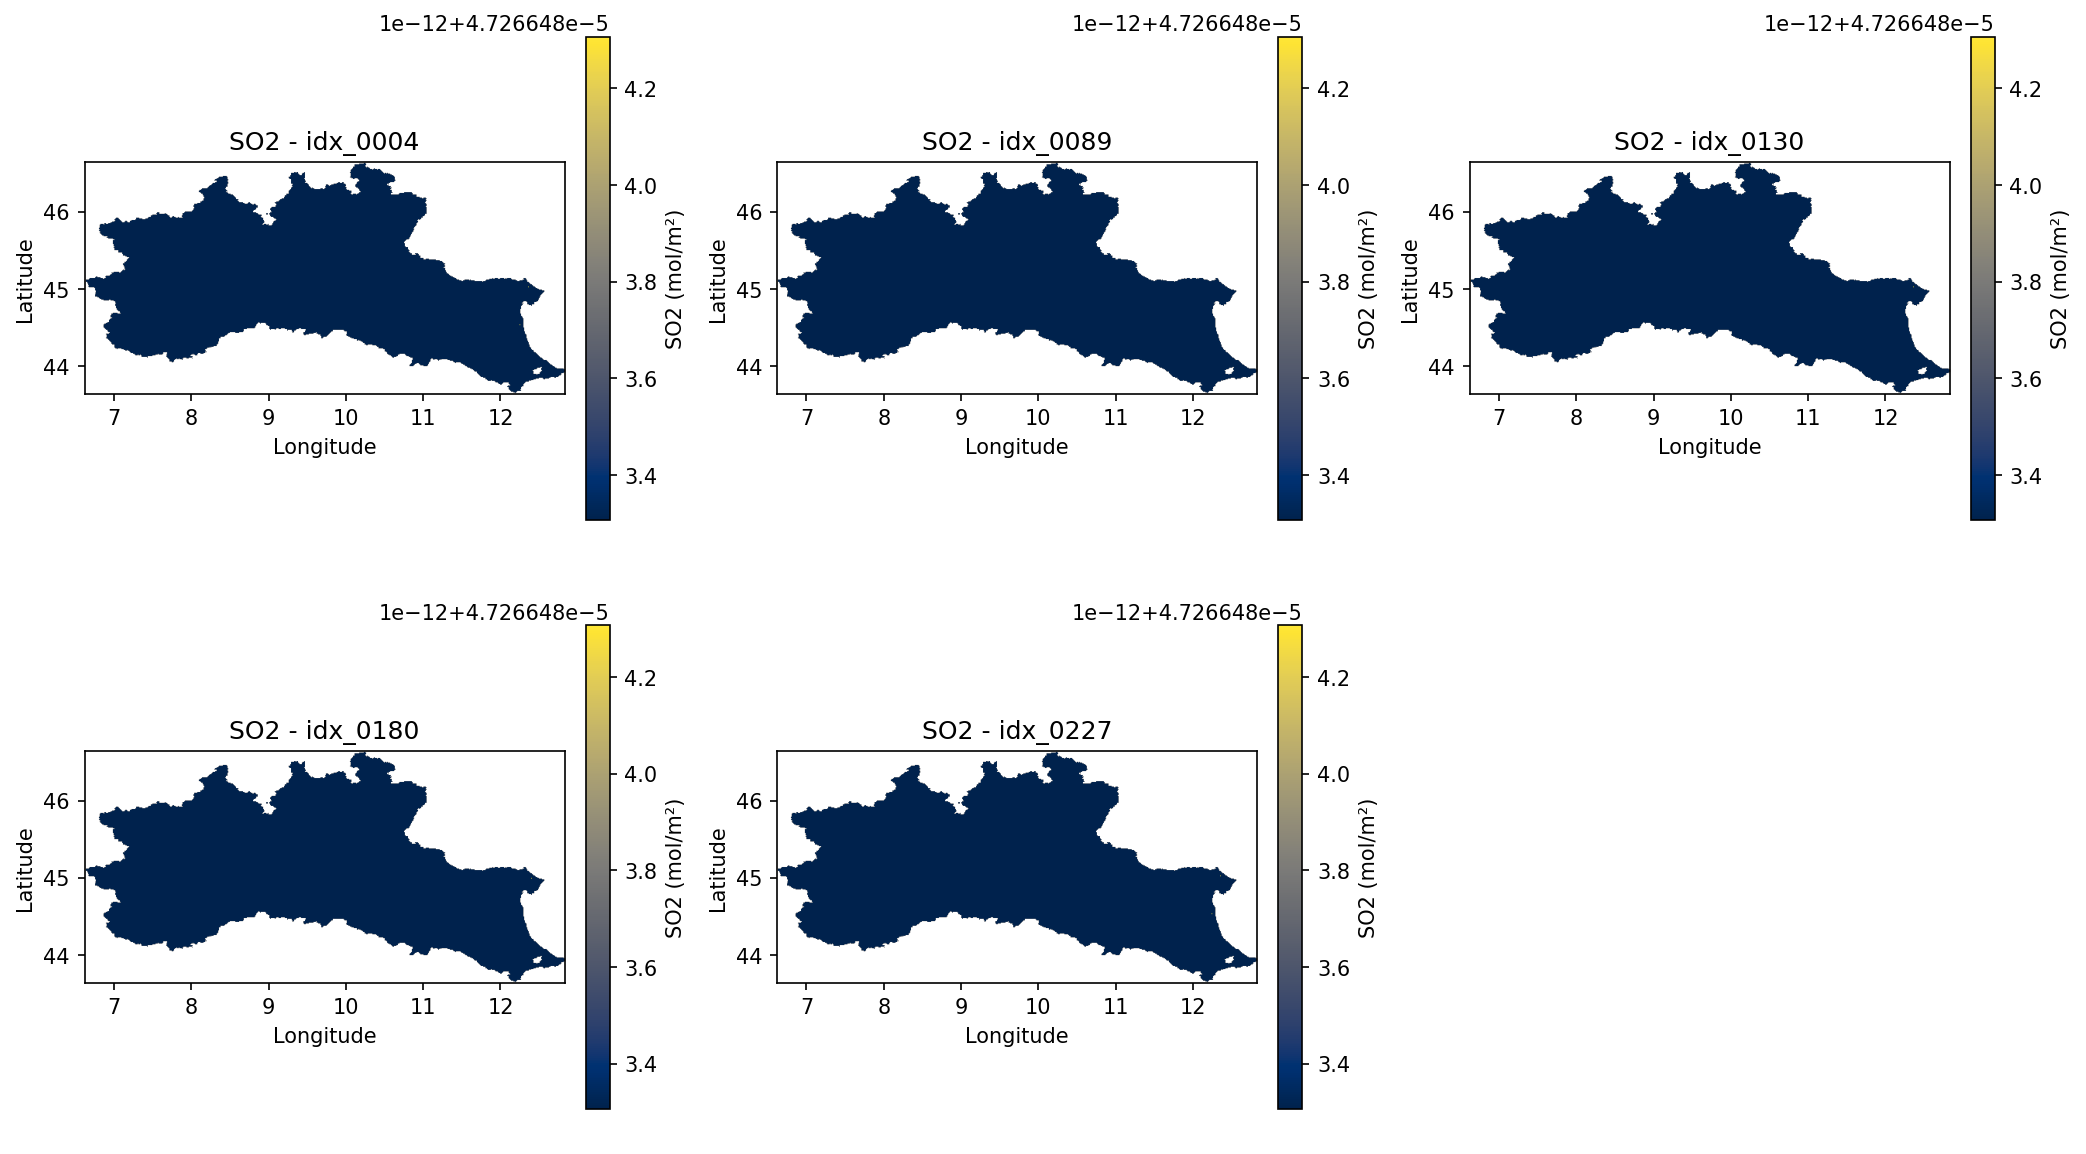

Bands plotted: [5, 90, 131, 181, 228]


In [ ]:
# ========= 随机可视化 SO2 预测（5天，AOI 裁剪+透明）=========
import numpy as np, matplotlib.pyplot as plt, rasterio, geopandas as gpd, random, json, os
from rasterio.mask import mask

# 路径（按你的导出结果修改 out_tif）
out_tif = "/content/drive/MyDrive/3DCNN_Pipeline/artifacts/exports/SO2_2023_pred_physical.tif"
meta_json = out_tif.replace(".tif", "_meta.json")
aoi_shp  = "/content/drive/MyDrive/AOI/delimitazione_distretto.shp"
num = 5

# 读 AOI
aoi = gpd.read_file(aoi_shp)

# 读 tiff 元信息
with rasterio.open(out_tif) as ds:
    total = ds.count
    aoi_reproj = aoi.to_crs(ds.crs)
    bands = sorted(random.sample(range(1, total + 1), min(num, total)))

# 可选：读日期
dates = None
if os.path.exists(meta_json):
    try:
        with open(meta_json, "r", encoding="utf-8") as f:
            meta = json.load(f)
            dates = meta.get("dates", None)
    except Exception:
        dates = None

# 画布
ncols, nrows = 3, 2
fig, axes = plt.subplots(nrows, ncols, figsize=(14, 8), dpi=150)
axes = axes.ravel()

for i, b in enumerate(bands):
    with rasterio.open(out_tif) as ds:
        clipped, trans = mask(
            ds, aoi_reproj.geometry, crop=True,
            nodata=np.nan, filled=True, indexes=b
        )
    arr = np.squeeze(clipped).astype(np.float32)

    h, w = arr.shape
    left, top = trans * (0, 0)
    right, bottom = trans * (w, h)
    extent = [left, right, bottom, top]

    valid = np.isfinite(arr)
    ax = axes[i]
    if valid.sum() == 0:
        ax.set_title(f"SO2 - band {b} (no valid pixels)")
        ax.axis("off")
        continue

    vmin = float(np.percentile(arr[valid], 1))
    vmax = float(np.percentile(arr[valid], 99))
    if vmax <= vmin:
        vmax = vmin + 1e-12

    title = f"SO2 - 2023 Day {b}"
    if dates and b-1 < len(dates) and dates[b-1]:
        title = f"SO2 - {dates[b-1]}"

    masked_arr = np.ma.masked_where(~valid, arr)
    im = ax.imshow(masked_arr, cmap="cividis", vmin=vmin, vmax=vmax,
                   extent=extent, origin="upper")
    ax.set_title(title)
    ax.set_xlabel("Longitude"); ax.set_ylabel("Latitude")
    cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label("SO2 (mol/m²)" if "physical" in out_tif else "z-score")

# 隐藏多余子图
for j in range(i + 1, nrows * ncols):
    axes[j].axis("off")

plt.tight_layout()
plt.show()
print("Bands plotted:", bands)

In [ ]:
# 重建 2023 年 3–11 月日期列表并写回 _meta.json
import os, json
from datetime import date, timedelta
import rasterio

OUT_TIF = "/content/drive/MyDrive/3DCNN_Pipeline/artifacts/exports/SO2_2023_pred_physical.tif"
META = OUT_TIF.replace(".tif", "_meta.json")

# 1) 计算需要的波段数
with rasterio.open(OUT_TIF) as ds:
    bands = ds.count
print("TIFF bands:", bands)

# 2) 生成 2023-03-01 到 2023-11-30（含）每天的日期（跳过 12/1/2 月）
def gen_dates_2023_mar_to_nov():
    start = date(2023, 3, 1)
    end   = date(2023, 11, 30)
    d = start
    out = []
    while d <= end:
        out.append(d.strftime("%Y-%m-%d"))
        d += timedelta(days=1)
    return out

all_days = gen_dates_2023_mar_to_nov()  # 正常应为 275 天
# 与实际波段数对齐（多则截断，少则只取前 N 天）
dates = all_days[:bands]
print("生成日期数量:", len(dates), "首尾:", dates[0], dates[-1])

# 3) 写回 _meta.json
if os.path.exists(META):
    with open(META, "r", encoding="utf-8") as f:
        meta = json.load(f)
else:
    meta = {}

meta["dates"] = dates
meta["bands"] = len(dates)

with open(META, "w", encoding="utf-8") as f:
    json.dump(meta, f, ensure_ascii=False, indent=2)

print("已写回:", META)

TIFF bands: 275
生成日期数量: 275 首尾: 2023-03-01 2023-11-30
已写回: /content/drive/MyDrive/3DCNN_Pipeline/artifacts/exports/SO2_2023_pred_physical_meta.json


TIFF bands=275  随机抽样=[43, 49, 120, 156, 209]
dates 样例: ['2023-03-01', '2023-03-02', '2023-03-03', '2023-03-04', '2023-03-05'] ... ['2023-11-26', '2023-11-27', '2023-11-28', '2023-11-29', '2023-11-30']


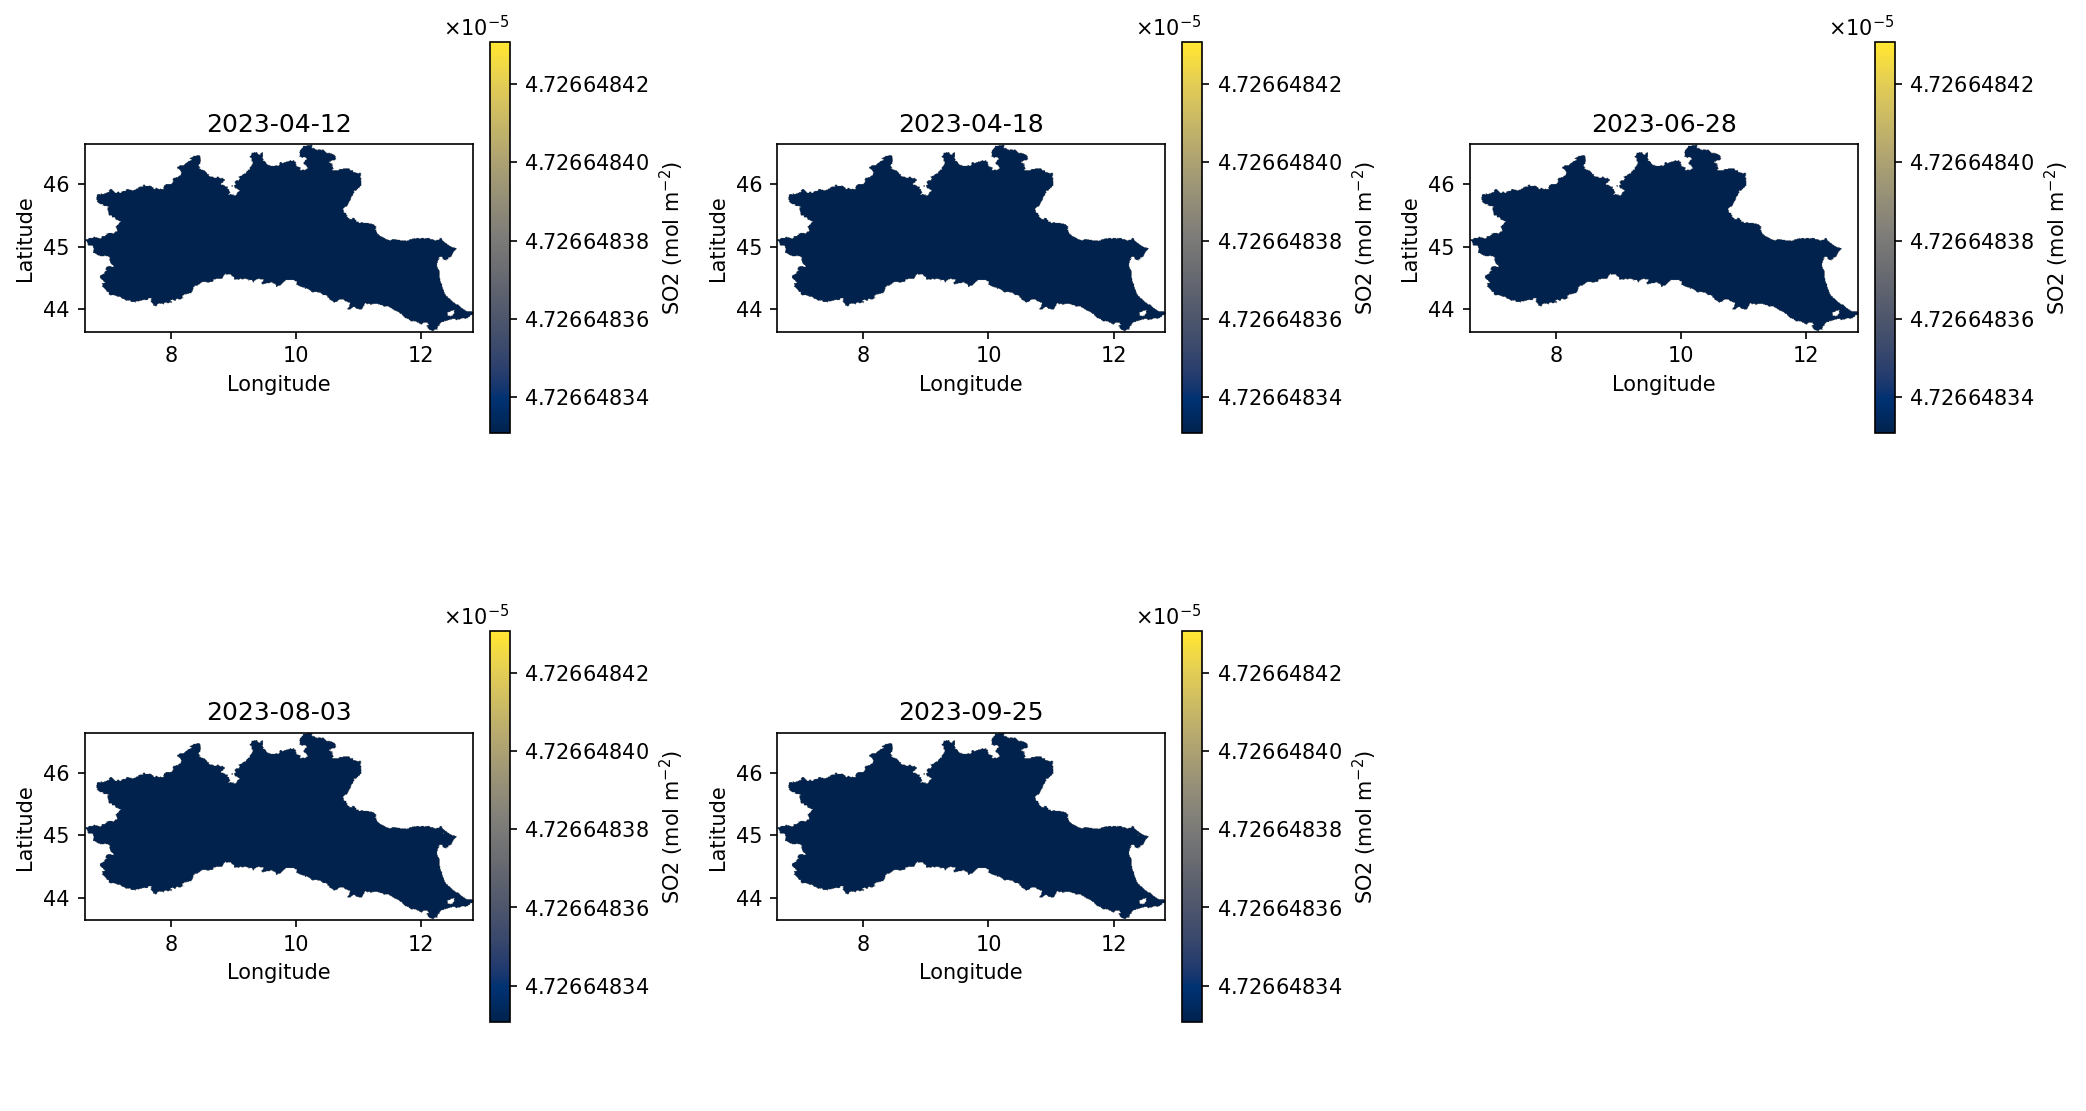

Bands plotted: [43, 49, 120, 156, 209]


In [ ]:
# ========= 随机可视化 SO2 预测（5天，AOI 裁剪+透明，单位=mol/m²，显示真实日期）=========
import os, json, random, re
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import rasterio
from rasterio.mask import mask
from matplotlib.ticker import ScalarFormatter

# 路径
out_tif   = "/content/drive/MyDrive/3DCNN_Pipeline/artifacts/exports/SO2_2023_pred_physical.tif"
meta_json = out_tif.replace(".tif", "_meta.json")
aoi_shp   = "/content/drive/MyDrive/AOI/delimitazione_distretto.shp"

# 可配置
num = 5
title_fmt = "{date}"  # "{date}" 或 "SO2 - {date}"

# 读取 AOI
aoi = gpd.read_file(aoi_shp)

# 读取 TIFF 基本信息
with rasterio.open(out_tif) as ds:
    total = ds.count
    aoi_reproj = aoi.to_crs(ds.crs)
    bands = sorted(random.sample(range(1, total + 1), min(num, total)))
print(f"TIFF bands={total}  随机抽样={bands}")

# 读取 meta.json 的日期列表，并与波段数对齐
def is_valid_ymd(s: str) -> bool:
    return isinstance(s, str) and re.match(r"^20\d{2}-\d{2}-\d{2}$", s) is not None

dates = None
if os.path.exists(meta_json):
    try:
        with open(meta_json, "r", encoding="utf-8") as f:
            meta = json.load(f)
            cand = meta.get("dates", None)
            if isinstance(cand, list) and len(cand) > 0:
                # 对齐长度（以最小长度为准）
                if len(cand) != total:
                    print(f"⚠️ dates长度({len(cand)})与TIFF波段数({total})不一致，按 {min(len(cand), total)} 对齐。")
                dates = cand[:total]
    except Exception as e:
        print("读取 meta_json 失败：", e)

if dates is None:
    print("⚠️ 未在 meta 中获取到有效 dates，将标题回退为 idx_XXXX。")
else:
    # 打印部分日期用于核对
    print("dates 样例:", dates[:5], "...", dates[-5:])

# 单位与缩放（mol/m²）
scale = 1.0
unit_label = "mol m$^{-2}$"

# 画图
ncols, nrows = 3, 2
fig, axes = plt.subplots(nrows, ncols, figsize=(14, 8), dpi=150)
axes = axes.ravel()

for i, b in enumerate(bands):
    with rasterio.open(out_tif) as ds:
        clipped, trans = mask(ds, aoi_reproj.geometry, crop=True, nodata=np.nan, filled=True, indexes=b)
    arr = np.squeeze(clipped).astype(np.float32)

    h, w = arr.shape
    left, top = trans * (0, 0)
    right, bottom = trans * (w, h)
    extent = [left, right, bottom, top]

    valid = np.isfinite(arr)
    ax = axes[i]
    if valid.sum() == 0:
        # 标题：尽量给出日期，否则 idx
        title = f"idx_{b-1:04d} (no valid pixels)"
        if dates and b-1 < len(dates) and is_valid_ymd(dates[b-1]):
            title = f"{dates[b-1]} (no valid pixels)"
        ax.set_title(title); ax.axis("off")
        continue

    # 1–99 分位裁剪
    vmin = float(np.percentile(arr[valid], 1))
    vmax = float(np.percentile(arr[valid], 99))
    if vmax <= vmin: vmax = vmin + 1e-12

    # 标题优先显示真实日期
    title = f"idx_{b-1:04d}"
    if dates and b-1 < len(dates) and is_valid_ymd(dates[b-1]):
        title = title_fmt.format(date=dates[b-1])

    masked_arr = np.ma.masked_where(~valid, arr * scale)
    im = ax.imshow(masked_arr, cmap="cividis", vmin=vmin*scale, vmax=vmax*scale,
                   extent=extent, origin="upper")
    ax.set_title(title)
    ax.set_xlabel("Longitude"); ax.set_ylabel("Latitude")

    # 颜色条（科学计数法，关闭 offset）
    cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    fmt = ScalarFormatter(useMathText=True)
    fmt.set_scientific(True)
    fmt.set_powerlimits((0, 0))   # 始终显示 ×10^n
    fmt.set_useOffset(False)      # 关闭 offset
    cbar.formatter = fmt
    cbar.update_ticks()
    cbar.set_label(f"SO2 ({unit_label})")

# 隐藏多余子图
for j in range(i + 1, nrows * ncols):
    axes[j].axis("off")

plt.tight_layout()
plt.show()
print("Bands plotted:", bands)